Filename: ztf_20180423227975_000758_zr_c14_o_q4_scimrefdiffimgfs.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  4             1 PrimaryHDU     268   (3072, 3080)   float32   


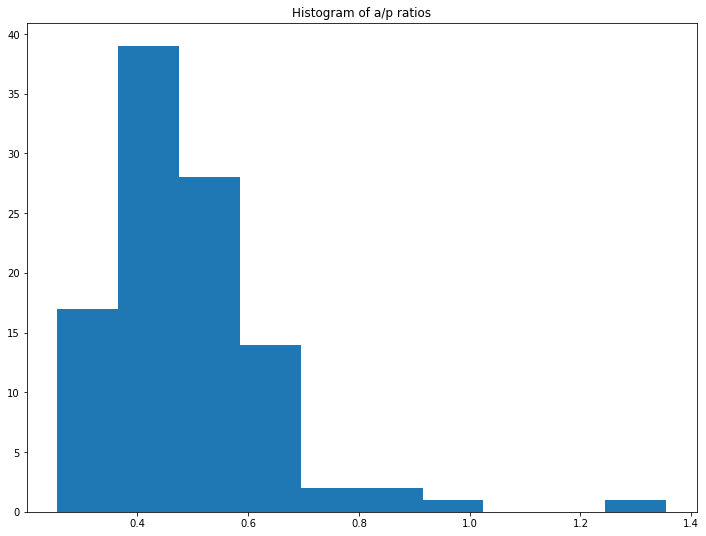

In [6]:
from astride import Streak
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
import csv
import pandas as pd
import math

hdulist = fits.open('ztf_20180423227975_000758_zr_c14_o_q4_scimrefdiffimgfs.fits')
hdulist.info()

imdata = hdulist[0].data
MAGZP = hdulist[0].header['MAGZP']
GAIN = hdulist[0].header['GAIN']
robust_sigma = 0.5*(np.nanpercentile(imdata,84)-np.nanpercentile(imdata,16))
robust_var = robust_sigma**2

streak = Streak('ztf_20180423227975_000758_zr_c14_o_q4_scimrefdiffimgfs.fits',output_path = "C:/Users/Bassel/Documents/Stony Brook University/Junior 2018-2019/SURF/Mnel Awwal",contour_threshold = 2, shape_cut = 0.33 , radius_dev_cut = 0.32)

streak.detect()
streak.write_outputs()
streak.plot_figures()

output = np.loadtxt('streaks.txt')

x_min = []
y_min = []
x_max = []
y_max = []
areas = []
lengths = []
widths = []
means = []
a_p = []
brightness = []
lengths_from_origin=[]
pixel_sumlist = []
black_pixelslist =[]
flux_per_area =[]
surface_mag = []
sigma = []
s_n = []


for row in output:
        x_center = row[1]
        y_center = row[2]
        area = row[3]
        areas.append(area)
        perimeter = row[4]   
        tmp = area/perimeter
        a_p.append(tmp)
        x_min.append(int(x_center-1.8*math.sqrt(area)))
        x_max.append(int(x_center+1.8*math.sqrt(area)))
        y_min.append(int(y_center-1.8*math.sqrt(area)))
        y_max.append(int(y_center+1.8*math.sqrt(area)))
        lengths_from_origin.append(math.sqrt(x_center**2 + y_center**2))
        

NaNs = np.zeros((len(output), 1))

for i in range(0, len(output)):
    data = imdata[y_min[i]:y_max[i],x_min[i]:x_max[i]]
    pixel_sum = 0
    black_pixels = 0
    #insert rotation here if necessary
    for row in data:
        for value in row:
            if np.isnan(value) == False:
                pixel_sum += value
            if np.isnan(value) == True:
                NaNs[i] += 1
            if value < 0:
                black_pixels = black_pixels + 1
            
    
    means.append(np.mean(data))
    pixel_sumlist.append(pixel_sum)
    black_pixelslist.append(black_pixels)
    
    
plt.hist(a_p,bins=10)      
plt.title('Histogram of a/p ratios')
plt.show()

streaks = streak.streaks

for objects in streaks:
    xmin = objects['x_min']
    xmax = objects['x_max']
    x = xmax - xmin
    ymin = objects['y_min']
    ymax = objects['y_max']
    y = ymax-ymin
    
    lengths.append(math.sqrt(x**2+y**2))
    

for objects in streaks:
    brightness_sum = 0
    for xx, yy in zip(objects['x'], objects['y']):
        brightness_sum += imdata[int(yy), int(xx)]
    brightness.append(brightness_sum)
    
    
for aa, ll in zip(areas, lengths):
    widths.append(aa/ll)

for bb, cc in zip(brightness, areas):
    flux_per_area.append(bb/cc)
    
for f in flux_per_area:
    if f > 0:
        surface_mag.append(MAGZP-2.5*math.log10(f))
    if f <= 0:
        surface_mag.append('Domain Error')

for f in flux_per_area:
    if ((f/GAIN) + robust_var) >= 0:
        sigma.append(math.sqrt((f/GAIN)+robust_var))
    else:
        sigma.append('Domain Error')

for fff, sss in zip(flux_per_area, sigma):
    if type(sss) is float:
        s_n.append(fff/sss)
    else:
        s_n.append('Domain Error')

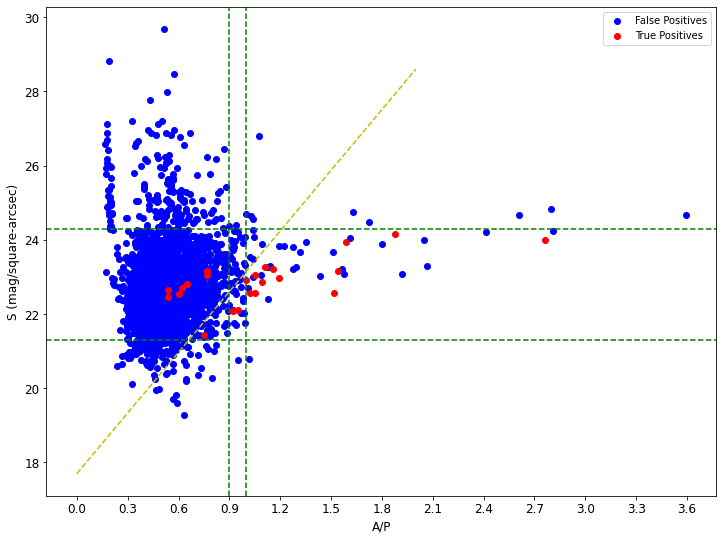

In [7]:
reals_bright_a2p = [2.76, 1.52, 1.11, 1.00, 0.95, 1.02, 1.05, 1.09, 1.19, 1.88, 1.59, 1.16, 0.92, 1.05, 1.54]
reals_bright_smag =[24.00, 22.578, 23.27, 22.93, 22.1 ,22.566, 23.054,22.861, 22.96, 24.169, 23.951, 23.226,22.085, 22.57, 23.17]

reals_faint_a2p = [0.75, 0.77,0.62,0.77,0.65, 0.54,0.60,0.54]
reals_faint_smag = [21.432, 23.169,22.704,23.060, 22.802 , 22.64, 22.55, 22.47]

reals_bright_sn = [0.947, 1.49,3.14]
a2pp = [2.76,1.52,1.11]
reals_faint_sn = [8.3]
a2ppp = [0.75]
falses_sn = [2.628239733126438,
 3.0575865889683076,
 2.9462429861508572,
 3.768336700887381,
 4.087800780960408,
 4.61829308089495,
 3.8113036751359353,
 4.140188199008625,
 1.1102590813414472,
 1.5688502435067904,
 3.1569562569598366,
 3.5897011140453503,
 3.611450735336263,
 2.973368608386844,
 2.508379651673082,
 1.4016138596743641,
 0.5108723394386555,
 1.1790124093641712,
 4.005145340552777,
 4.028187214822656,
 3.8427759900456566,
 0.48753501007803035,
 5.516898478451355,
 3.18877267132453,
 2.7857373013531075,
 5.298901102344957,
 2.111027047225664,
 0.4664587658594996,
 3.672584128937857,
 3.581942928568707,
 2.639467916924806,
 3.367338790919521,
 6.1509162686624865,
 3.1249215344635726,
 3.209072512817338,
 -1.1633009049365448,
 5.908460464385679,
 3.835999167349093,
 2.769056865477168,
 3.03365735195003,
 3.379372489002611,
 2.705823843822818,
 2.555183052320688,
 2.931928559060683,
 6.757031616078386,
 1.6637262828586745,
 2.3532005677049983,
 3.078361334763049,
 5.5758693120151746,
 2.96010019853395,
 4.275917972797453,
 4.08621046716785,
 5.1726443884376545,
 4.527310091929516,
 3.458093428624869,
 4.978356856099021,
 3.500168727101242,
 4.482273279829101,
 3.1702814298341138,
 1.33309463829057,
 2.873591198402877,
 1.1689505648562255,
 3.1231432349570643,
 3.002722610672794,
 1.8509612216660134,
 5.6844602502518455,
 4.171107176678746,
 4.093844101484527,
 2.4217804390470596,
 2.251033930370538,
 3.201548223579096,
 5.871997136639511,
 1.7045296849235616,
 2.2257226285178087,
 2.7614870176348973,
 4.749341696514626,
 4.411350073271318,
 2.2159335539993483,
 2.40483684533039,
 3.286075493531349,
 4.282107455261462,
 3.8679038607533935,
 0.577071284485826,
 2.661246001995715,
 1.1467652232014258,
 4.5783192783254485,
 3.1112119379481693,
 4.942388877606436,
 2.7364777089116887,
 2.953301010777002,
 2.3910031223618886,
 2.820249356295575,
 4.603218336295009,
 2.5158296383163337,
 3.7579466282932437,
 3.5758308766699183,
 4.284931571514445,
 3.330128113667614,
 5.570685693020748,
 4.646147411909278,
 3.3615834531593602,
 3.4998710387965386,
 3.2784380829770163,
 2.4277055972198816,
 2.5558883863968425,
 3.3880842591323588,
 2.750298596301999,
 2.706640344805203,
 3.916211450837329,
 4.202223233454212,
 2.476123548968483,
 2.58666255858984,
 2.2058999704952487,
 3.4519492644102927,
 2.398665975181851,
 3.8882518592504134,
 3.3592770193961097,-2.60061731481098,
 -2.4166733617256693,
 5.6251917883353695,
 4.660026215506077,
 6.930072363430826,
 7.114800733629955,
 2.0105657255945637,
 1.5549238076057494,
 6.400836581250972,
 2.1542490108632464,
 5.590199523531516,
 3.962500551454443,
 3.812419782398231,
 2.2755830998330446,
 9.34158886760347,
 6.737403364474238,
 5.559971969119479,
 7.0203687126949434,
 5.130733493151974,
 3.8735444465283537,
 8.49617303546343,
 6.355971014718864,
 8.972659762141555,
 5.998945141195379,
 4.810701116848547,
 5.0408182910670645,
 4.473737995996627,
 6.021466160456124,
 6.087139062236477,
 4.704607316387866,
 3.5977442698259092,
 6.901869078648694,
 4.507889162732067,
 5.754305183576277,
 6.671082570807029,
 4.9749145744771015,
 6.859494987223322,
 4.701153441345449,
 5.5417765515738395,
 5.566323632587963,
 3.2158020503105327,
 4.838752563557149,
 3.3403481526344834,
 5.8628787862669896,
 5.13457278513701,
 7.412978734217912,
 5.089953529836059,
 6.05627571793291,
 6.267875300356204,
 5.4156629029438905,
 3.9737712850101774,
 5.197564647518291,
 3.1715480875404483,
 5.110789245761807,
 4.551814597695213,
 3.2942478623294127,
 4.482208353902241,
 5.78740689702507,
 6.274770718536456,
 5.25003319543133,
 5.342717800903189,
 7.336852123855329,
 5.791862711588061,
 3.6619076022970027,
 3.5412740655547474,
 4.667998735463512,
 3.048956553881597,
 3.5970162385296325,
 3.9022460786042505,
 2.488620265090953,
 4.885601037157966,
 3.7459469816016644,
 3.5790937570287107,
 3.417771641949628,
 4.97372750409592,
 3.6382259722339363,
 4.010099750337822,
 3.227609038849782,
 3.868126445927719,
 3.4705562114525756,
 3.8500824838375283,
 3.4204916691245675,
 4.050394128987515,
 4.232896235128344,
 4.083090419232576,
 4.972243789032814,
 3.7972673273052524,
 4.830380516298282,
 3.8447111627884833,
 3.7435584891043527,
 3.5305764905104695,
 4.7151987470185395,
 4.965607874963938,
 4.570823155560505,
 4.253920072298065,
 3.4602042093662027,
 4.030198034787864,
 5.039100076043971,
 6.312311725680994,
 8.584122300354686,
 6.065140709430914,
 5.10403502397066,
 4.708552281720378,
 3.789530232706029,
 6.310203156909718,
 5.712085960365262,
 5.890149676514362,
 1.2277727719137552,
 10.753752158847528,
 -4.652027212671052,
 6.706729149124914,
 6.2091465007587985,
 5.206055024247858,11.461361166267967,
 5.083728674964215,
 0.6033418294446318,
 -0.2709710194263948,
 4.384632041499086,
 7.209849581428694,
 11.276166758972051,
 6.5892242140157355,
 9.868669027204026,
 2.934721555355956,
 2.441988140268223,
 7.927876440760223,
 4.216655742890797,
 3.601973506089268,
 -1.0399853454292582,
 -0.20944107812338064,
 -1.3932367401431527,
 5.506078665682314,
 2.738790028969586,
 0.5037849606783711,
 7.711686804837417,
 4.047181613901329,
 10.474193180944297,
 4.805351191673223,
 11.465177427025232,
 2.923138714393866,
 6.09823571381773,
 5.836117060771114,
 5.827995264818861,
 5.202910602324996,
 5.9873360609176265,
 4.255929437358287,
 3.598535179910843,
 5.779141704889932,
 12.998046802511778,
 5.425113245501287,
 3.716419207004577,
 0.7975408473069431,
 7.641358460688998,
 4.423922496668446,
 5.099724713849244,
 6.475301625367444,
 5.235622656177747,
 10.445234621058386,
 -11.731764895113354,
 8.63991741756383,
 0.24860215939942124,
 6.5513494404466455,
 4.876425213063226,
 9.509863451651606,
 10.057275111075757,
 6.68337942273537,
 5.1068130662381535,
 -11.508039165301879,
 2.611142658567037,
 -21.975991475716064,
 2.471435368998139,
 9.01498219086962,
 6.687470491428899,
 7.537602385404621,
 5.4948525296977175,
 6.918671230788672,
 4.825086172957799,
 5.750531365699998,
 4.928963498389712,
 5.7802159648447935,
 5.832345480925666,
 5.319522011866232,
 2.4260475802748056,
 20.42448696769712,
 1.927364889917032,
 5.923692464881774,
 8.400766733166307,
 0.02790501528319449,
 2.045700757816867,
 -3.303533440277126,
 1.1996785621408328,
 23.011269182521985,
 -1.6843142205942816,
 9.280383141221964,
 0.8198103655247765,
 7.979843217218849,
 2.065186883195845,
 3.5365210413805266,
 0.48521117004012526,
 1.492765943285312,
 1.5702622261922454,
 0.008980513732839831,
 10.477530041897127,
 12.210085645574322,
 9.108584035625324,
 4.007997401540375,
 0.3799117248443012,
 10.291936856908412,
 1.97455079556476,
 -0.5769817512947296,
 3.41860799617523,
 4.107546867830384,
 2.9312806848212603,
 6.818100066412616,
 8.909336269414885,
 6.61533184894638,
 8.741517537230894,
 3.5233174475916087,
 20.152578893824213,
 6.474015803578005,
 5.901829234767636,
 7.2755362267886,
 12.495816357429511,
 3.5369711643962196,
 3.2412506670719785,
 7.9505037906418075,
 3.3155522635676413,
 -2.4561784129874185,
 3.308850542617584,
 -6.661460214016018,
 2.371951206559689,
 14.07455704422059,
 5.84727695184012,
 4.424064642642775,
 4.463723339345008,
 7.276578049149173,
 12.98074146503364,
 1.8448896804989834,
 0.5554208713008176,
 5.747623233304609,
 2.0806701997529564,
 4.150269485999161,
 10.316725493128184,
 4.882293579656613,
 -10.396784446641968,
 3.6052639418389276,
 -1.0366408457004874,
 0.8326332693974471,
 7.020329386517587,
 10.050993553527764,
 16.474341203902704,
 1.8561940418582126,
 4.732496883070478,
 7.969937789009951,
 3.2167208726106153,
 5.083620509768269,
 9.742249710229741,
 3.156602072068378,
 4.175778536468311,
 5.859144649843474,
 4.151778889858372,
 1.4937334449717161,
 6.659909074592483,
 4.567714833102695,
 -1.585494034533782,
 2.436268378766897,
 5.3814700337553,
 -2.4768051863452945,
 3.904328622619497,
 11.860909003421803,
 6.562292323477036,
 4.673744794028594,
 2.0628413285408915,
 4.156602104783589,
 6.682486311583279,
 4.436969646129551,
 11.320374315904575,
 2.991777424039873,
 2.592874377558591,
 6.992224005091065,
 6.710595926010269,
 6.62763606891727,
 -5.018971679527263,
 2.964829802253847,
 5.453042789218943,
 -13.616055877765115,
 -5.542672354085515,
 4.78393299567858,
 6.993883953689311,
 11.842419581819412,
 5.539285538271564,
 10.169237484974088,
 4.455976029200366,
 5.771060111399156,
 7.062035583729258,
 8.634817790223558,
 2.172973415011089,
 4.227563922189044,
 3.72833299251891,
 8.584079194987636,
 4.177776600184829,
 7.328729016420644,
 -3.1900643066317897,
 3.9523077266947184,
 -3.6036493323892325,
 5.106303679885814,
 0.26917628098800506,
 12.518559295171977,
 6.2731196934792175,
 4.098452824881106,
 6.078306778803507,
 6.502410645858087,
 6.031676078095045,
 5.039933901195168,
 3.973774383268815,
 2.3450248527892565,
 3.6748888686045262,
 10.310343312021763,
 2.469147920452415,
 -0.21348521366343062,
 6.102890023671793,
 4.381172058654068,
 2.109284518042454,
 7.355962600082652,
 4.351908304005696,
 0.1101829877469701,
 4.563170332011577,
 6.984134678511254,
 5.448746520627702,
 3.049819994733356,
 6.729526796777469,
 5.520617136763117,
 6.340973586103708,
 3.5556136794947806,
 3.7998464983435607,
 7.075824869707965,
 2.326631711145569,
 1.792861590801334,
 6.483136140470351,
 3.7183320019944146,
 6.681679236675244,
 9.975531530001808,
 3.2756872564942885,
 7.31693444899253,
 5.707383278601957,
 3.542554969513948,
 5.409364075570329,
 2.4018008887975806,
 4.523486170531488,
 6.283211852348531,
 4.887002020356999,
 10.518891059247329,
 4.25851458234931,
 4.538433745588032,
 10.522966640650672,
 10.2223386190022,
 9.368104196073478,
 3.6770012815888102,
 6.053431631298832,
 -1.8221607182653705,
 3.2303172687158126,
 11.284787657111343,
 4.892055730276578,
 3.2396911483386823,
 0.3694187941438439,
 5.338738038933831,
 7.0246825458328495,
 11.078028837629393,
 2.567709675036395,
 9.268141187109059,
 6.733888436904579,
 5.190770759805734,
 5.151619961026965,
 5.56036064279419,
 6.31688577177405,
 8.257706619865543,
 10.395844408811177,
 0.2288660789415491,
 6.248069889745012,
 5.183598715628175,
 6.218763848660348,
 6.205125436593657,
 8.052058816217102,
 6.847381875365196,
 5.127517905411964,
 4.773335371753343,
 2.2445243546393594,
 -0.06875594111075582,
 4.922381793479265,
 2.9209681193116754,
 4.583460094919554,
 3.3572880456869987,
 7.7583729234211045,
 3.672062925324294,
 9.45541325656971,
 5.493170375418296,
 6.512263068599629,
 7.9557043306121935,
 9.645092975373947,
 -2.0120904837263485,
 -6.407307089744175,
 10.450819477929059,
 7.550638290447633,
 4.135481765534683,
 2.834877404390978,
 7.119417417975496,
 1.3253773348811868,
 4.82634948687683,
 4.862839583191016,
 4.399816256159379,
 2.4060280371819953,
 3.4749110369535505,
 8.339531110148782,
 -0.6009353074322035,
 1.5608138940539495,
 3.9840447434643504,
 4.3981266418244935,
 2.206775925836391,
 1.9395778228081215,
 4.2233835416867445,
 5.412063907955985,
 9.343611146206467,
 13.933692138297495,
 2.0033496802952713,
 9.500678962460665,
 6.8470235980657925,
 0.5031711758616875,
 3.707602066542181,
 4.944858953364996,
 6.0740040243189135,
 -8.018570943028356,
 4.552442645067008,
 2.4294563981157817,
 6.73056580187808,
 11.78853531036636,
 4.7465467796578,
 5.4282600733814315,
 3.9759599875351395,
 5.231452933362819,
 8.421984577286011,
 7.69929543157325,
 5.603028470508534,
 8.884749194096754,
 8.1996371072319,
 6.283911338997385,
 8.092741605569108,
 3.4523230758398022,
 2.842037053693187,
 -0.7949074868686238,
 -0.41198152926176707,
 5.142851594793987,
 4.473196371379162,
 1.596494842418911,
 6.606319896330104,
 7.278770209601514,
 5.538995213200105,
 -2.6630824146093053,
 5.132436751342171,
 3.266489598440817,
 3.1096662461210216,
 -2.9759787254190115,
 2.0422264357162967,
 -0.03767222073889179,
 7.76872483298936,
 5.167688222864886,
 6.759128633011073,
 1.323901243921527,
 0.7354124338651348,
 -2.2197320966403944,
 3.008764192144919,
 2.0281582493440724,
 1.7750645407068029,
 7.519051793130879,
 6.226118228187864,
 4.197280947920444,
 6.074127935987922,
 11.863640787006881,
 5.590224617384489,
 4.220751339958,
 7.321431533933351,
 5.553195549800049,
 4.425960160539829,
 2.4862218068954114,
 4.038291535405459,
 3.204636959691918,
 13.38205919094604,
 5.228650014088901,
 5.672722165884562,
 3.0129756102692427,
 4.828705414208864,
 4.06347922108153,
 2.136191099493198,
 2.086598847636041,
 0.11062413474928223,
 9.530598185811343,
 7.017855971706176,
 7.161880249756005,
 4.264607650561777,
 4.331827688957655,
 2.055821214157583,
 4.736356134130127,
 2.2481750490551513,
 5.1112928434383065,
 11.349135125116122,
 5.052798085400558,
 8.867650462061441,
 5.8686289492306445,
 4.7761649676401055,
 11.173924126872459,
 2.3604963231405494,
 8.623092727857424,
 2.098400321125761,
 2.1410876728682493,
 7.480337305684416,
 3.1584395305230766,
 4.945086281057826,
 -0.3181853691324811,
 3.0378534000432085,
 9.374729837346662,
 0.9105556757582439,
 7.430917949229444,
 7.93946020133362,
 -3.0127143175538835,
 5.692892572361145,
 5.717409313453559,
 3.4277874414874008,
 5.651006719453829,
 3.915257702981183,
 2.624656626003887,
 2.385290180561101,
 7.214431738500867,
 3.4987311032058304,
 10.381413290122746,
 8.067254704392905,
 9.73148676770242,
 1.1195731908130404,
 4.408811945564252,
 0.7635698624572643,
 4.10362866449453,
 4.6398887468897385,
 6.114010623045161,
 6.8197731326187085,
 0.6594222352675306,
 7.12744490783432,
 6.32695607357767,
 7.3080688330608385,
 4.271199238610251,
 3.330602391113094,
 2.8887408514793558,
 6.030939419682099,
 5.5444126203142625,
 5.1207005920904605,
 5.127751577376015,
 4.921964695459368,
 4.211644597903784,
 3.7941617548409643,
 7.638713966179259,
 7.711668963341939,
 0.9395430164099295,
 3.471201047327774,
 10.71876158499902,
 1.6713871398474067,
 6.771777381550716,
 -2.485230754744277,
 0.8264185042223586,
 -0.046254975031661434,
 4.217759201389352,
 2.801095445829598,
 3.386713709127122,
 1.7535436039657653,
 1.8974857137996413,
 4.1824606705239065,
 -0.1290728131380121,
 4.8320870977786115,
 3.7351611576285566,
 7.207463047393855,
 6.415639380167533,
 2.372205352622244,
 6.062719143125743,
 3.4479957051250256,
 2.657653531621065,
 'Domain Error',
 7.65647421257252,
 10.596667778944772,
 7.608187346424404,
 0.12539937123129705,
 -1.0414954914900674,
 5.22235396840189,
 7.693077365930491,
 3.743123047085367,
 3.9097457697488456,
 4.571015257013341,
 5.1087536588178315,
 2.6647452742942312,
 5.766157601427277,
 6.503341768806853,
 5.831098666105404,
 3.2541407321546747,
 4.60572326751401,
 4.760150725423512,
 6.665066795781719,
 2.7154724882543912,
 7.4792256014208105,
 4.553155265827992,
 0.9956382347812988,
 -6.06282971609137,
 5.7582956170948965,
 5.321694392701755,
 -0.22757723349914472,
 -0.06176109017285941,
 2.7013279243549446,
 4.292949090145713,
 5.9303431623441085,
 -1.5368804919160861,
 3.8937203065035497,
 8.676380962101005,
 -1.2778517631154942,
 3.5433949608324604,
 2.4237869087581014,
 4.043763936737355,
 8.54575961981172,
 3.51182445610143,
 1.547522320257363,
 -0.39509437141217996,
 5.1679204069058935,
 3.95087043180615,
 5.958938158472504,
 -0.16320578587816184,
 -0.7558143568088412,
 4.3821077696494655,
 4.454564388824556,
 5.662438748675803,
 2.7039926446852633,
 2.786719290791229,
 6.723261905640181,
 2.362699612187067,
 -8.235688776245608,
 3.7199509744796764,
 6.487887091145103,
 3.959868786079853,
 3.4422121915663295,
 2.6122354046242124,
 1.5816186519023574,
 5.230958298484166,
 0.3335998975172549,
 3.863002758504749,
 8.345676829528463,
 1.9819302318575773,
 2.8402503826403733,
 -0.5549515740470817,
 0.0952235334678544,
 9.77187711910519,
 5.207572776463588,
 5.966970414882431,
 5.724467293773558,
 3.2920778824245995,
 5.4685327034475115,
 6.229901387928147,
 1.8249986582713367,
 8.32896446099332,
 4.399232424697033,
 -1.0283562014617946,
 4.9628160767138665,
 7.362129523886985,
 7.404018755960533,
 4.641538890111556,
 4.8578315472543325,
 6.636711998992722,
 7.078677618310666,
 0.6745289630239986,
 3.0380504994798385,
 2.441113952393541,
 5.148695671898278,
 6.615295753902486,
 0.21708650262404594,
 2.9163796259960373,
 1.9842213783689748,
 4.378165070277693,
 3.1540993279892438,
 5.116763521298709,
 3.5454243153663465,
 6.299199258197013,
 6.890981976944106,
 4.008112792362724,
 5.673514620750469,
 3.3066409867941373,
 6.226355469449751,
 7.224333127304819,
 3.4629939902548763,
 3.510743773437603,
 6.191643442730819,
 4.283836888433248,
 3.9358477883244607,
 10.157975952042404,
 2.067507096778943,
 -33.88570046607646,
 -2.246349109186278,
 0.996609468189004,
 'Domain Error',
 2.3181724913994715,
 3.1786676365597297,
 5.9400852150292325,
 6.622619564402236,
 3.9380850546445334,
 5.4241409008897845,
 3.4040689504015815,
 3.872048724830127,
 4.5913515424934,
 -1.2749092055302107,
 2.540598047959795,
 5.377122323402904,
 7.221262295775422,
 2.18285304042247,
 8.099901886826501,
 8.443382035408272,
 6.089368952173785,
 4.723363482127065,
 5.461543524830789,
 5.231777063938804,
 3.898208560984667,
 7.733066322850142,
 -1.422586749748046,
 3.911622433032196,
 4.443001117305223,
 2.34490922252074,
 3.5164326342216854,
 6.0166549967485485,
 3.8445790500190156,
 2.405807907558215,
 1.9843932464856104,
 2.644853795484813,
 0.11834690986573562,
 4.520177928194221,
 5.756382080877799,
 -1.899379125079305,
 0.24772896715167558,
 6.62151303954391,
 4.550393886098746,
 -2.715898399430936,
 3.2511384461073556,
 0.5118463583740152,
 7.434547428315753,
 2.8844116736542604,
 3.55538304531953,
 5.922865042054596,
 4.853697678789511,
 2.7236977489029544,
 6.98387374626979,
 1.4277992839475253,
 3.0244120383922697,
 -1.320738566986738,
 3.2785345258054996,
 3.261398264072925,
 -1.987901890735228,
 4.827353020009968,
 3.8428128779820567,
 6.110384440738294,
 14.96067966354793,
 2.312859125920116,
 6.690970523088046,
 2.3153274561153507,
 3.065492732535458,
 6.800036927217086,
 4.703060659658524,
 3.7487356664928377,
 3.604711561144545,
 8.514312557886093,
 5.375813094939576,
 2.258812169616006,
 10.716990710153093,
 7.512781461746401,
 7.027157155748627,
 14.551619974591407,
 5.603269006189059,
 4.2170145575087785,
 4.772413120944914,
 8.762224134634536,
 3.9186671665324386,
 6.531395352460405,
 6.895368462808405,
 4.604473112157168,
 4.08917831416279,
 -3.0291412047954176,
 -1.067631498331742,
 4.3277459175542425,
 1.7333083163900196,
 3.660515507443478,
 -13.91718108222214,4.649299239108145,
 2.5720884330297142,
 5.15733173441364,
 5.512261035285929,
 3.5231177101323636,
 1.7329778163928988,
 3.087682779880641,
 4.624122498845353,
 6.065638872458453,
 3.6974389736987296,
 5.870180751997813,
 2.519811507529191,
 3.7108797156285336,
 5.097930027882696,
 6.471650286694342,
 5.427292356753785,
 3.758688079393732,
 4.6886077746388,
 4.2486851873284,
 5.5463893184101805,
 3.758807883767538,
 3.1619926803607816,
 3.0893951773514354,
 6.050025837638394,
 3.1440292643396885,
 3.5573606444115207,
 2.7286480028036513,
 5.054831714848061,
 4.7675946702978536,
 4.776871830640444,
 4.924188640892962,
 4.103363893114889,
 3.2736523894493086,
 6.475255471295138,
 2.9572526159477035,
 3.6206230193164863,
 4.968093149493692,
 3.574563323072234,
 6.705462056911231,
 0.7859073156487953,
 5.873097332916136,
 4.024708187103871,
 4.395040593765187,
 5.159244282422586,
 5.219241344767071,
 3.594245680095946,
 6.912237996269451,
 4.469967761243185,
 4.318249873291572,
 2.714086008885709,
 6.044015835437533,
 3.302022987226728,
 2.568598193007473,
 4.938119715872674,
 5.400294060929697,
 3.052354378283309,
 3.4169894104276017,
 3.9119349715734133,
 6.084761869095866,
 4.474419818003658,
 2.7831034530680805,
 4.628296871992344,
 3.759590389047562,
 2.986038834732436,
 6.151982858021777,
 3.7601485253038955,
 -7.091659638293099,
 6.102913254195779,
 4.48241439873463,
 4.923467353828325,
 5.299182200042829,
 6.415577645413827,
 5.552903599725451,
 5.770623085876299,
 6.8787606701371455,
 4.646373750853144,
 6.03595346595755,
 4.462008583723207,
 5.845144665536733,
 5.564262143116746,
 4.960113815590157,
 6.635379717667549,
 3.12508585413361,
 4.893476795158047,
 5.141169892942813,
 3.0182099300261815,
 4.145809455440335,
 5.731366246908005,
 3.9633813562754567,
 2.4802253186068524,
 4.019255268599152,
 1.6010368888655058,
 4.944158371153368,
 10.65827687741056,
 8.075680242349513,
 11.725583210702949,
 5.043562681939408,
 5.7846369408012945]





falses_a2p = [
 0.4253731343283582,
 0.6768060836501901,
 0.29256965944272445,
 0.3064935064935065,
 0.4419475655430712,
 0.6310975609756098,
 0.35251798561151076,
 0.7290502793296091,
 0.3434065934065934,
 0.4813559322033898,
 0.6041666666666666,
 0.5933333333333334,
 0.4716494845360825,
 0.3315649867374005,
 0.3987730061349693,
 0.30498533724340177,
 0.41379310344827586,
 0.637223974763407,
 0.26436781609195403,
 0.36,
 0.2346089850249584,
 0.36633663366336633,
 0.4617940199335548,
 0.4707446808510638,
 0.5134228187919463,
 0.35748792270531404,
 0.34124087591240876,
 0.5327510917030568,
 0.6382978723404256,
 0.325,
 0.47784200385356457,
 0.3987538940809969,
 0.31798245614035087,
 0.421875,
 0.29637096774193544,
 0.46540880503144655,
 0.3767258382642998,
 0.4027339642481598,
 0.7107438016528925,
 0.44188596491228066,
 0.6819672131147542,
 0.352112676056338,
 0.3990877993158495,
 0.30409356725146197,
 0.4403470715835141,
 0.40752351097178685,
 0.45161290322580644,
 0.41726618705035967,
 0.5515280739161337,
 0.438655462184874,
 0.7062761506276151,
 0.44311377245508987,
 0.48664688427299696,
 0.7186544342507645,
 0.5202702702702703,
 0.4297520661157025,
 0.3732394366197183,
 0.4557377049180328,
 0.45136186770428016,
 0.311284046692607,
 0.3987538940809969,
 0.6226415094339622,
 0.6239837398373983,
 0.48214285714285715,
 0.6886120996441282,
 0.5898203592814372,
 0.6827586206896552,
 0.9873577749683944,
 0.466403162055336,
 0.6517571884984025,
 0.6946050096339114,
 0.6736242884250474,
 0.48192771084337355,
 0.6448598130841121,
 0.5905172413793104,
 0.7692307692307692,
 0.5974025974025974,
 0.6861538461538462,
 0.625544267053701,
 0.6612903225806451,
 0.6282782212086659,
 0.598233995584989,
 0.49529780564263326,
 0.47058823529411764,
 0.6068601583113457,
 0.4739130434782609,
 0.6054421768707483,
 0.5802816901408451,
 0.5976744186046511,
 0.5229681978798587,
 0.49846153846153846,
 0.5069767441860465,
 0.5306122448979592,
 0.5501730103806228,
 0.5882352941176471,
 0.5203619909502262,
 0.31024096385542166,
 0.5111111111111112,
 0.3387470997679814,
 0.3949843260188088,
 0.40476190476190477,
 0.5957446808510638,
 0.34308510638297873,
 0.3667711598746081,
 0.3811320754716981,
 0.5440613026819923,
 0.5238095238095237,
 0.3768472906403941,
 0.3482758620689655,
 0.3380681818181818,
 0.3705035971223022,
 0.6442953020134228,
 0.5342857142857143,
 0.423728813559322,
 0.5073170731707317,
 0.5809248554913296,
 0.4302600472813239,
 0.46084337349397586,
 0.4114583333333333,
 0.5089020771513352,
 0.5463687150837989,
 0.6702702702702703,
 0.2978723404255319,
 0.35841584158415846,
 0.5327510917030568,
 0.5107913669064749,
 0.4727272727272727,
 0.42727272727272725,
 0.44680851063829785,
 0.47826086956521735,
 0.6145975443383356,
 0.4915254237288135,
 0.6132930513595166,
 0.5066666666666666,
 0.4357541899441341,
 0.46743295019157083,
 0.46090534979423864,
 0.33009708737864074,
 0.4099378881987577,
 0.38285714285714284,
 0.5572519083969466,
 0.4647887323943662,
 0.502906976744186,
 0.6365217391304349,
 0.48367593712212814,
 0.5720081135902637,
 0.51010101010101,
 0.44660194174757284,
 0.8054711246200608,
 0.5514018691588786,
 0.47600000000000003,
 0.3609022556390978,
 0.33569739952718675,
 0.3547297297297297,
 0.2722371967654986,
 0.4806949806949807,
 0.4935424354243542,
 0.528688524590164,
 0.4956949569495695,
 0.4245810055865922,
 0.5737704918032787,
 0.38541666666666663,
 0.40316205533596833,
 0.5972222222222222,
 0.5465686274509804,
 0.4162011173184358,
 0.5700267618198037,
 0.34844868735083534,
 0.49124726477024067,
 0.46200607902735563,
 0.5065420560747664,
 0.5119453924914675,
 0.4421052631578947,
 0.38289962825278817,
 0.3638297872340426,
 0.49146757679180886,
 0.423076923076923,
 0.6406250000000001,
 0.6617100371747212,
 0.8248407643312102,
 0.3159509202453988,
 0.7608695652173914,
 0.599502487562189,
 0.5330188679245284,
 0.575381679389313,
 0.4247038917089679,
 0.556998556998557,
 0.4761904761904762,
 0.405189620758483,
 0.45006321112515807,
 0.41551724137931034,
 0.4991539763113367,
 0.517557251908397,
 0.4919786096256685,
 0.5772727272727273,
 0.6162790697674418,
 0.5856164383561644,
 0.4595375722543352,
 0.51440329218107,
 0.3941605839416058,
 0.5150214592274678,
 0.4327731092436975,
 0.48311688311688317,
 0.5677655677655677,
 0.5396383866481224,
 0.8093093093093093,
 0.6400580551523948,
 0.5486577181208054,
 0.43270024772914945,
 0.43824701195219123,
 0.4533333333333333,
 0.5959885386819485,
 0.46694214876033063,
 0.32380952380952377,
 0.3482758620689655,
 0.415807560137457,
 0.5141700404858299,
 0.5539568345323741,
 0.5272727272727272,
 0.5943775100401607,
 0.8106904231625836,
 0.5361842105263158,
 0.49633699633699635,
 0.44155844155844154,
 0.5897435897435898,
 0.4963924963924964,
 0.5730724971231299,
 0.4541484716157205,
 0.42578125,
 0.7444168734491315,
 0.39841688654353563,
 0.44136460554371004,
 0.5927099841521394,
 0.46794871794871795,
 0.49267399267399264,
 0.4727722772277228,
 0.42995169082125606,
 0.5338645418326694,
 0.5252100840336135,
 0.3759791122715405,
 0.5019157088122604,
 0.8171875,
 0.7886323268206039,
 0.5261958997722096,
 0.49825783972125437,
 0.44601769911504424,
 0.44107744107744107,
 0.5171673819742489,
 0.4763779527559055,
 0.5648604269293924,
 0.5126903553299492,
 0.47027027027027024,
 0.5033333333333333,
 0.47314578005115093,
 0.5026548672566371,
 0.45767195767195773,
 0.43661971830985913,
 0.34328358208955223,
 0.5283018867924528,
 0.4105571847507331,
 0.3623789764868603,
 0.49757281553398053,
 0.5384615384615384,
 0.5540983606557377,
 0.3521594684385382,
 0.4558303886925795,
 0.592948717948718,
 0.3166144200626959,
 0.6336805555555556,
 0.6071428571428572,
 0.36893203883495146,
 0.4618320610687023,
 0.6733333333333333,
 0.6068376068376068,
 0.5761316872427983,
 0.45305514157973176,
 0.4773662551440329,
 0.5474137931034483,
 0.26499032882011603,
 0.5810502283105023,
 0.5738396624472574,
 0.5474452554744526,
 0.5790055248618784,
 0.5331010452961673,
 0.763768115942029,
 0.5826086956521739,
 0.35128205128205126,
 0.6123595505617978,
 0.4830188679245283,
 0.46099290780141844,
 0.37861271676300573,
 0.5165745856353591,
 0.6768292682926829,
 0.4048964218455744,
 0.45734597156398105,
 0.5674547983310152,
 0.5471698113207547,
 0.4519230769230769,
 0.6360153256704981,
 0.8513689700130378,
 0.444007858546169,
 0.47457627118644063,
 0.5347222222222222,
 0.3806881243063263,
 0.6525252525252525,
 0.36906854130052724,
 0.4333333333333333,
 0.4297520661157025,
 0.4262295081967213,
 0.6736842105263158,
 0.39610389610389607,
 0.5798561151079137,
 0.4288256227758007,
 0.546925566343042,
 0.5482456140350876,
 0.38888888888888884,
 0.5916030534351145,
 0.6981566820276498,
 0.6051587301587302,
 0.3873626373626374,
 0.3935643564356436,
 0.47240618101545256,
 0.5712574850299401,
 0.3685897435897436,
 0.35378323108384463,
 0.49589041095890407,
 0.5904977375565611,
 0.4974874371859297,
 0.46017699115044247,
 0.564516129032258,
 0.48036253776435045,
 0.7718253968253969,
 0.5470852017937219,
 0.4816326530612245,
 0.7195767195767196,
 0.5102040816326531,
 0.6215686274509804,
 0.4043321299638989,
 0.5142857142857142,
 0.45492662473794543,
 0.4397759103641456,
 0.42890995260663506,
 0.3573407202216066,
 0.3896457765667575,
 0.5373913043478261,
 0.38759689922480617,
 0.41240875912408764,
 0.4375,
 0.34444444444444444,
 0.5444839857651246,
 0.4295302013422818,
 0.5395569620253164,
 0.6091205211726384,
 0.49791376912378293,
 0.5273311897106109,
 0.772300469483568,
 0.9249217935349322,
 0.6257668711656441,
 0.6492537313432835,
 0.49838187702265374,
 0.5701149425287356,
 0.5365168539325843,
 0.5153664302600474,
 0.5342960288808665,
 0.6320388349514563,
 0.3722627737226277,
 0.6257309941520468,
 0.4143518518518518,
 0.32908163265306123,
 0.4802631578947368,
 0.31989247311827956,
 0.48826291079812206,
 0.5909090909090908,
 0.3807763401109057,
 0.8203125,
 0.32432432432432434,
 0.5036710719530103,
 0.5212765957446809,
 0.4391025641025641,
 0.4686192468619247,
 0.40350877192982454,
 0.5889967637540453,
 0.5596707818930041,
 0.41943734015345263,
 0.47658402203856753,
 0.6139817629179332,
 0.5765124555160142,
 0.4136690647482014,
 0.620347394540943,
 0.625,
 0.5458715596330275,
 0.7299270072992701,
 0.6041666666666666,
 0.46825396825396826,
 0.45183486238532106,
 0.3313782991202346,
 0.3625,
 0.3436619718309859,
 0.35748792270531404,
 0.44274809160305345,
 0.6163141993957704,
 0.7342657342657343,
 0.6415770609318996,
 0.929451287793953,
 0.3992932862190813,
 0.51171875,
 0.5396825396825397,
 0.48104956268221577,
 0.5339622641509434,
 0.688695652173913,
 0.5311059907834101,
 0.4750830564784053,
 0.5432692307692308,
 0.5941422594142259,
 1.3146067415730336,
 0.5226130653266332,
 0.3923076923076923,
 0.5848484848484848,
 0.43010752688172044,
 0.49806949806949813,
 0.5664556962025316,
 0.46953405017921146,
 0.4724770642201835,
 0.5683646112600537,
 0.5451388888888888,
 0.6229508196721312,
 0.43018867924528303,
 0.6654411764705883,
 0.6335282651072125,
 0.48773006134969327,
 0.3464052287581699,
 0.7317880794701987,
 0.47794117647058826,
 0.4304761904761905,
 0.4504132231404959,
 0.7484662576687116,
 0.4661921708185053,
 0.5126903553299492,
 0.39051094890510946,
 0.3357843137254902,
 0.3921568627450981,
 0.7146974063400576,
 0.3876811594202898,
 0.43132530120481927,
 0.5196850393700787,
 1.0825688073394495,
 0.7210401891252955,
 0.3617571059431524,
 0.5458823529411765,
 0.7208480565371024,
 0.3551724137931035,
 0.8089579524680073,
 0.37545126353790614,
 0.28019323671497587,
 0.35161290322580646,
 0.5122950819672132,
 0.45794392523364486,
 0.5399999999999999,
 0.7061611374407583,
 0.7211678832116788,
 0.41365777080062793,
 0.473469387755102,
 0.39320388349514557,
 0.503916449086162,
 0.5944055944055944,
 0.8932748538011696,
 0.5579399141630901,
 0.4469026548672566,
 0.5901060070671378,
 0.45778611632270166,
 0.40703517587939697,
 0.4702886247877759,
 0.298050139275766,
 0.4491803278688524,
 0.5788177339901478,
 0.7245901639344263,
 0.6391625615763546,
 0.40441176470588236,
 0.425,
 0.4958448753462603,
 0.5407577497129736,
 0.44541484716157204,
 0.4854545454545454,
 0.48535564853556484,
 0.4699248120300752,
 0.7130434782608696,
 0.3939393939393939,
 0.35714285714285715,
 0.5215759849906192,
 0.5123152709359606,
 0.41724137931034483,
 0.7508361204013378,
 0.589605734767025,
 0.5777439024390244,
 0.7969849246231155,
 0.4915254237288135,
 0.5144628099173554,
 0.44841269841269843,
 0.5720620842572062,
 0.5161290322580645,
 0.3585526315789474,
 0.6554054054054054,
 0.5759368836291913,
 0.4579831932773109,
 0.51010101010101,
 0.5,
 0.4906303236797274,
 0.7938931297709924,
 0.5090152565880722,
 0.41666666666666663,
 0.5030060120240482,
 0.4756554307116105,
 0.407624633431085,
 0.9260143198090692,
 0.6795811518324608,
 0.601078167115903,
 0.4816112084063047,
 0.6295081967213114,
 0.4723618090452262,
 0.6478679504814305,
 0.6153846153846154,
 0.3752759381898455,
 0.49784791965566716,
 0.5098591549295775,
 0.47610121836925956,
 0.4444444444444444,
 0.44106463878326996,
 0.5532786885245902,
 0.29064039408867,
 0.6363636363636364,
 0.4143518518518518,
 0.5080091533180777,
 0.596989966555184,
 0.7365930599369086,
 0.5645756457564576,
 0.4461538461538461,
 0.6959706959706959,
 0.5789473684210527,
 0.4930167597765363,
 0.47540983606557374,
 0.5550493545937737,
 0.40053763440860213,
 0.5092592592592592,
 0.44685990338164255,
 0.4653061224489796,
 0.4512635379061372,
 0.8271604938271605,
 0.337696335078534,
 0.5857740585774059,
 0.5236486486486486,
 0.4742268041237113,
 0.39090909090909093,
 0.38056680161943324,
 0.5179856115107914,
 0.3765432098765432,
 0.4675615212527964,
 0.37846153846153846,
 0.43674698795180716,
 0.47578347578347574,
 0.4180327868852459,
 0.513157894736842,
 0.5963488843813387,
 0.6015037593984962,
 0.5046439628482973,
 0.4040920716112532,
 0.4467353951890034,
 0.40718562874251496,
 0.76,
 0.34146341463414637,
 0.5107569721115537,
 0.6516516516516517,
 0.774278215223097,
 0.4702970297029703,
 0.6681415929203539,
 0.42105263157894735,
 0.4086021505376344,
 0.5207280080889788,
 0.6964679911699779,
 0.5450236966824644,
 0.38972809667673713,
 0.5051546391752578,
 0.8596112311015118,
 0.4645476772616137,
 0.36775818639798485,
 0.3628571428571428,
 0.37801608579088475,
 0.50853889943074,
 0.38636363636363635,
 0.5458015267175573,
 0.48453608247422675,
 0.46435845213849286,
 0.38082191780821917,
 0.4251012145748988,
 0.4840525328330207,
 0.39115646258503406,
 0.5401869158878504,
 0.4937759336099585,
 0.49335863377609107,
 0.574468085106383,
 0.3827160493827161,
 0.5430894308943089,
 0.8197135636057287,
 0.5675241157556269,
 0.4241379310344828,
 0.5677799607072691,
 0.5796897038081805,
 0.9923954372623575,
 0.4898550724637681,
 0.30288461538461536,
 0.5266393442622951,
 0.47483588621444195,
 0.499009900990099,
 0.4904632152588556,
 0.47630922693266836,
 0.35064935064935066,
 0.5,
 0.3860759493670886,
 0.3888888888888889,
 0.48722316865417375,
 0.526448362720403,
 0.5305164319248826,
 0.37542662116040953,
 0.5644329896907216,
 0.5807860262008734,
 0.6564885496183206,
 0.5537190082644629,
 0.43243243243243246,
 0.663594470046083,
 0.4251012145748988,
 0.4418604651162791,
 0.6411960132890365,
 0.6581560283687943,
 0.4188235294117647,
 0.5023923444976077,
 0.6824324324324323,
 0.5198412698412699,
 0.6092184368737474,
 0.38939670932358317,
 0.608955223880597,
 0.5779411764705882,
 0.5204081632653061,
 0.4969818913480885,
 0.43613707165109034,
 0.4736842105263158,
 0.8249678249678248,
 0.4043321299638989,
 0.5429497568881685,
 0.47628865979381446,
 0.6070559610705596,
 0.4487632508833922,
 0.4421052631578948,
 0.4285714285714286,
 0.7436619718309859,
 0.4939516129032258,
 0.5751708428246014,
 0.4042553191489362,
 0.9222903885480573,
 0.42042042042042044,
 0.5225225225225225,
 0.3465346534653465,
 0.573466476462197,
 0.3787878787878788,
 0.5729166666666667,
 0.8493377483443708,
 0.5205479452054795,
 0.469208211143695,
 0.5458937198067634,
 0.33247422680412375,
 0.4959016393442623,
 0.4931034482758621,
 0.5952380952380952,
 0.5205761316872428,
 0.48085106382978726,
 0.6501240694789082,
 0.49225473321858865,
 0.4085213032581454,
 0.5180467091295117,
 0.40366972477064217,
 0.6604361370716512,
 0.3638968481375358,
 0.6024096385542168,
 0.461038961038961,
 0.3585526315789474,
 0.3415977961432507,
 0.3848167539267015,
 0.4219653179190751,
 0.42801556420233466,
 0.46008119079837617,
 0.5187760778859526,
 0.3409090909090909,
 0.6896243291592129,
 0.41025641025641024,
 0.32065217391304346,
 0.5575221238938053,
 0.5144694533762058,
 0.35487804878048784,
 0.7171581769436998,
 0.46456692913385833,
 0.4320337197049526,
 0.5334821428571429,
 0.49635036496350365,
 0.42913385826771655,
 0.46341463414634143,
 0.5565862708719852,
 0.5746753246753247,
 0.46863468634686345,
 0.7550274223034734,
 0.5475935828877005,
 0.3644314868804665,
 0.5512820512820513,
 0.2976190476190476,
 0.6083995459704882,
 0.43548387096774194,
 0.3829787234042554,
 0.6536585365853659,
 0.4611953612845674,
 0.4909090909090909,
 0.5195681511470985,
 0.8041958041958042,
 0.5983935742971888,
 0.3863216266173752,
 0.5594936708860759,
 0.3462603878116343,
 0.5153374233128835,
 0.5132743362831858,
 0.39999999999999997,
 0.4141689373297002,
 0.3246753246753247,
 0.5235109717868338,
 0.47352024922118374,
 0.436734693877551,
 0.6589473684210526,
 0.5251479289940829,
 0.39958158995815907,
 0.3788300835654596,
 0.34825870646766166,
 0.5111111111111112,
 0.5651302605210421,
 0.5142857142857142,
 0.6115702479338844,
 0.4970059880239522,
 0.4943820224719101,
 0.49586776859504134,
 0.5362997658079625,
 0.4136690647482014,
 0.402332361516035,
 0.6096774193548387,
 0.7014531043593131,
 0.3901234567901235,
 0.4362139917695473,
 0.49275362318840576,
 0.5523012552301255,
 0.5401234567901235,
 0.34894613583138173,
 0.6265508684863524,
 0.4106583072100314,
 0.7391304347826086,
 0.43897637795275596,
 0.5330948121645797,
 0.5050505050505051,
 0.36971830985915494,
 0.4977578475336323,
 0.47003154574132494,
 0.44014084507042256,
 0.5660377358490566,
 0.37003058103975534,
 0.4565656565656566,
 0.4458333333333333,
 0.6815034619188923,
 0.4563106796116505,
 0.40727272727272723,
 0.3816013628620102,
 0.5062761506276151,
 0.6437768240343347,
 0.7825159914712154,
 0.38549618320610685,
 0.6403508771929824,
 0.48134328358208955,
 0.7892095357590966,
 0.8641552511415526,
 0.6414233576642335,
 0.3909574468085106,
 0.522167487684729,
 0.5373563218390804,
 0.5241379310344827,0.5163636363636364,
 0.817658349328215,
 0.47257383966244726,
 0.4007352941176471,
 0.6525323910482921,
 1.2742616033755274,
 0.7142857142857142,
 0.5551724137931034,
 0.46491228070175433,
 0.6766169154228855,
 0.3654708520179372,
 0.8790931989924432,
 0.587181903864279,
 0.5247524752475248,
 0.41025641025641024,
 0.3986175115207374,
 0.6203007518796992,
 0.4867021276595745,
 0.6182432432432432,
 0.3279220779220779,
 0.5643153526970954,
 0.6435986159169551,
 0.6810126582278481,
 0.3204419889502762,
 0.7747989276139411,
 0.6270566727605118,
 0.826844262295082,
 0.39436619718309857,
 0.5668016194331984,
 0.5178997613365155,
 0.4346666666666667,
 0.6395759717314488,
 0.71280276816609,
 0.37134502923976603,
 0.7692307692307692,
 0.6913183279742765,
 0.562390158172232,
 0.5896414342629482,
 0.3070866141732283,
 0.44477611940298506,
 0.32132132132132135,
 0.5676855895196506,
 0.5837004405286343,
 0.5144927536231885,
 0.4305555555555556,
 0.5473684210526316,
 0.2982832618025751,
 0.5047021943573669,
 0.49603174603174605,
 0.7976653696498055,
 0.3453488372093023,
 0.7299465240641712,
 0.8394415357766144,
 0.43454258675078866,
 0.42095238095238097,
 0.7597402597402597,
 0.6823027718550106,
 0.631578947368421,
 0.38872403560830854,
 0.424812030075188,
 0.8083832335329342,
 0.44349680170575695,
 0.6156716417910447,
 0.7474949899799599,
 0.35736677115987464,
 0.5975359342915811,
 0.5539906103286385,
 0.35294117647058826,
 0.5067204301075269,
 0.4473094170403587,
 0.41200000000000003,
 0.3234836702954899,
 0.38575667655786344,
 0.39705882352941174,
 0.3342245989304813,
 0.4111111111111111,
 0.3163841807909604,
 0.5070422535211268,
 0.3601036269430052,
 0.38333333333333336,
 0.4590747330960854,
 0.9393939393939396,
 0.6356275303643725,
 0.4708333333333334,
 0.603448275862069,
 0.7619047619047619,
 0.39169139465875363,
 0.45634920634920634,
 0.515748031496063,
 0.44274809160305345,
 0.5842217484008528,
 0.44022503516174405,
 0.43493150684931503,
 0.4577006507592191,
 0.7019867549668874,
 0.5856697819314641,
 0.4090909090909091,
 0.40816326530612246,0.5930851063829787,
 0.35906040268456374,
 0.327313769751693,
 0.5080906148867314,
 0.7227074235807861,
 0.44237918215613387,
 0.44485981308411215,
 0.4816326530612245,
 0.41970802919708033,
 0.3726937269372693,
 0.6060171919770774,
 0.25531914893617025,
 0.7952127659574467,
 0.561119293078056,
 0.4404040404040404,
 0.4453441295546559,
 0.35014005602240894,
 0.4703947368421053,
 0.6442953020134228,
 0.45380116959064326,
 0.5394736842105263,
 0.43674698795180716,
 0.4989293361884368,
 0.4775641025641026,
 0.8166786484543493,
 0.2914691943127962,
 0.42391304347826086,
 0.5364583333333334,
 0.4555555555555556,
 0.5672727272727273,
 0.32464454976303314,
 0.37402597402597404,
 0.3772241992882562,
 0.5236051502145922,
 0.45338983050847453,
 0.4349030470914127,
 0.5121293800539083,
 0.5019305019305019,
 0.5309090909090909,
 0.5446224256292906,
 0.4885135135135135,
 0.3333333333333333,
 0.47677261613691935,
 0.4201923076923077,
 0.5,
 0.5406162464985994,
 0.6806806806806807,
 0.5150753768844222,
 0.4088541666666667,
 0.48055555555555557,
 0.6385809312638581,
 0.4157303370786517,
 0.6886930983847284,
 0.4553191489361702,
 0.4915254237288135,
 0.4332784184514003,
 0.3941368078175896,
 0.39610389610389607,
 0.2987616099071208,
 0.37,
 0.4436363636363636,
 0.4612676056338028,
 0.6324041811846689,
 0.4170337738619677,
 0.4173228346456693,
 0.4073569482288828,
 0.8867924528301888,
 0.436734693877551,
 0.3109048723897912,
 0.6457142857142858,
 0.4554353426069037,
 0.3596938775510204,
 0.3556701030927836,
 0.5320197044334976,
 0.3159420289855073,
 0.6372315035799523,
 0.4178082191780822,
 0.5164690382081687,
 0.30357142857142855,
 0.5067385444743935,
 0.41796874999999994,
 0.6416107382550336,
 0.5010706638115631,
 0.5023474178403755,
 0.6184397163120567,
 0.453781512605042,
 0.39918533604887985,
 0.45901639344262296,
 0.4264919941775837,
 0.5415986949429038,
 0.36563876651982385,
 0.6594761171032356,
 0.6479289940828402,
 0.5663265306122448,
 0.3884514435695538,
 0.5364120781527532,
 0.6033333333333334,
 0.3405405405405405,
 0.3648068669527897,
 0.34750000000000003,
 0.41679160419790107,
 1.3546511627906976,
 0.29181752353367124,0.5994318181818181,
 0.6209112149532711,
 0.631578947368421,
 0.6989795918367346,
 0.44047619047619047,
 0.4733915806195393,
 0.556657223796034,
 0.4513274336283185,
 0.492442710872745,
 0.5510204081632653,
 0.419672131147541,
 0.5373831775700935,
 0.5426540284360188,
 0.5177514792899409,
 0.5657894736842105,
 0.5021834061135372,
 0.7019133937562941,
 0.5504885993485341,
 0.4866220735785954,
 0.5415800415800416,
 0.658256880733945,
 0.4401709401709402,
 0.5904872389791183,
 0.38957055214723924,
 0.6516556291390729,
 0.5838926174496644,
 0.446927374301676,
 0.5553691275167786,
 0.7217125382262997,
 0.574335782928208,
 0.4279661016949152,
 0.42217898832684825,
 1.7254772876892694,
 0.34831460674157305,
 0.8957564575645756,
 0.6427688504326329,
 0.3536842105263158,
 0.5544675642594858,
 0.4837545126353791,
 0.5501905972045743,
 0.34697855750487333,
 0.6698717948717948,
 0.5879043600562588,
 0.33440514469453375,
 0.46520146520146516,
 0.5190615835777126,
 0.39446366782006925,
 0.42471590909090906,
 0.3864734299516908,
 0.8962962962962963,
 0.7731629392971245,
 1.046875,
 0.5112016293279023,
 0.5920245398773006,
 0.40325865580448067,
 0.28144458281444584,
 0.43854748603351956,
 0.36363636363636365,
 0.32786885245901637,
 0.9962243797195253,
 0.6034985422740524,
 0.4613003095975233,
 0.4150943396226415,
 0.46885245901639344,
 0.48184019370460046,
 0.35638297872340424,
 0.5232660228270413,
 0.6765734265734266,
 0.42160278745644597,
 0.5906040268456376,
 0.572992700729927,
 0.5215252152521526,
 0.44081632653061226,
 0.3959731543624161,
 0.35648148148148145,
 0.5109170305676856,
 0.44493392070484583,
 0.5056947608200456,
 0.48991354466858783,
 0.3801369863013699,
 0.5406976744186047,
 0.4327956989247312,
 0.6346820809248555,
 0.9889273356401385,
 0.4222668004012036,
 0.3981264637002342,
 0.6761006289308176,
 0.4009661835748793,
 0.48556430446194226,
 0.45634920634920634,
 0.8746630727762804,
 0.42641509433962266,
 0.583739837398374,
 0.18360071301247774,
 0.20136186770428016,
 0.17739130434782607,
 0.23605947955390336,
 0.19198664440734559,
 0.1699438202247191,
 0.208029197080292,
 0.17676767676767677,
 0.18090748379493224,
 0.17634854771784234,
 0.18216560509554142,
 0.2072072072072072,
 0.19674225487064834,
 0.1776018099547511,
 0.19075568598679382,
 0.19710669077757687,
 0.19780219780219782,
 0.21306209850107063,
 0.2006802721088435,
 0.18166089965397925,
 0.19047619047619047,
 0.19405099150141644,
 0.17445482866043616,
 0.18061674008810572,
 0.1842410196987254,
 0.17868675995694294,
 0.20101137800252847,
 0.20016891891891891,
 0.20078740157480315,
 0.16587677725118485,
 0.19397363465160075,
 0.18013468013468012,
 0.19891500904159132,
 0.1664841182913472,
 0.20032706459525756,
 0.1796657381615599,
 0.1979320531757755,
 0.19131238447319776,
 0.17545180722891565,
 0.18778359511343803,0.45901639344262296,
 0.6171617161716171,
 0.6356877323420075,
 0.39730639730639733,
 0.5591054313099041,
 0.6426426426426427,
 0.5590909090909091,
 0.7372654155495979,
 0.5610389610389611,
 0.7438692098092643,
 0.8873626373626373,
 0.6330749354005167,
 0.7566265060240963,
 0.4370860927152318,
 0.5073313782991202,
 0.39673913043478265,
 0.4881516587677725,
 0.521531100478469,
 0.5815899581589958,
 0.684981684981685,
 0.4927007299270073,
 0.48489425981873113,
 0.7170731707317073,
 0.8461538461538461,
 0.4775641025641026,
 0.5964391691394658,
 0.7446808510638298,
 0.9432624113475178,
 0.6953125,
 0.7683982683982683,
 0.5278810408921933,
 0.5809935205183585,
 0.6512345679012347,
 0.34579439252336447,
 0.48031496062992124,
 0.6210045662100457,
 0.5588235294117647,
 0.6950000000000001,
 0.4719626168224299,
 0.5510204081632653,
 0.6418439716312058,
 0.7654320987654322,
 0.35154061624649857,
 0.5529953917050692,
 0.5919003115264797,
 0.5991379310344828,
 0.6328124999999999,
 0.4713114754098361,
 0.7725118483412322,
 0.6676646706586827,
 0.5269804822043628,
 0.628099173553719,
 0.5212765957446809,
 0.5951557093425606,
 0.6193771626297577,
 0.541033434650456,
 0.4673202614379085,
 0.8318872017353579,
 0.5521885521885521,
 0.5102040816326531,
 0.6422764227642277,
 0.6290322580645161,0.39633558341369335,
 0.3799392097264438,
 0.5150214592274678,
 0.6072695035460993,
 0.5024875621890547,
 0.42622950819672134,
 0.5363636363636364,
 0.7396963123644251,
 0.5064935064935064,
 0.6077981651376146,
 0.7722832722832722,
 0.5218978102189782,
 0.5,
 0.4160714285714286,
 0.9312865497076023,
 0.4804753820033956,
 0.7758085954807267,
 0.4968354430379746,
 0.4253731343283582,
 0.34523809523809523,
 0.46044303797468356,
 0.559748427672956,
 0.6493902439024392,
 0.6266233766233766,
 0.6385416666666667,
 0.32091097308488614,
 0.521190261496844,
 0.33333333333333337,
 0.7582781456953643,
 0.7770849571317224,
 0.3021148036253776,
 0.5567010309278351,
 0.28971962616822433,
 0.391713747645951,
 0.33617021276595743,
 0.39999999999999997,
 0.4337121212121212,
 0.4699074074074074,
 0.5870445344129555,
 0.703016241299304,
 0.3499222395023328,
 0.337152209492635,
 0.49567723342939474,
 0.43556701030927836,
 0.4485981308411215,
 0.5336538461538461,
 0.3569230769230769,
 0.5688073394495413,
 0.649171270718232,
 0.6648648648648648,
 0.45723684210526316,
 0.5939849624060151,
 0.5574074074074075,
 0.7457044673539518,
 0.46357615894039733,
 0.5190839694656488,
 0.5276639344262295,
 0.658321060382916,
 0.3711111111111111,
 0.536,
 0.45869565217391306,
 0.5081967213114754,
 0.32323232323232326,
 0.32432432432432434,
 0.6163934426229508,
 0.4184675834970531,
 0.460840890354493,
 0.46320868516284674,
 0.5395894428152492,
 0.5362445414847161,
 0.4386149003147954,
 0.7116704805491991,
 0.4392712550607287,
 0.36962025316455693,
 0.6703296703296703,
 0.43657042869641294,
 0.44516129032258067,
 0.3586206896551724,
 0.41894353369763204,
 0.45070422535211274,
 0.45475638051044087,
 0.463963963963964,
 1.611542192046557,
 0.3358662613981763,
 0.5834862385321101,
 0.2151088348271447,
 0.5865758754863813,
 0.391304347826087,
 0.2601484068092536,
 0.21731448763250885,
 0.49893992932862186,
 0.6236559139784946,
 0.8216867469879519,
 0.752112676056338,
 0.4233226837060703,
 0.5214007782101168,
 0.415807560137457,
 0.39325842696629215,
 0.3384955752212389,
 0.29078014184397166,
 0.33789954337899547,
 0.4509090909090909,
 0.3691860465116279,
 0.5204918032786885,
 0.44978165938864634,
 0.4418604651162791,
 0.5212922173274597,
 0.24058577405857742,0.811411992263056,
 0.44113667117726657,
 0.6814814814814815,
 0.6645367412140575,
 0.35038363171355497,
 0.4930875576036866,
 0.5842293906810037,
 0.4032258064516129,
 0.5552631578947369,
 0.690423162583519,
 0.5124378109452736,
 0.5987654320987654,
 0.823529411764706,
 0.5932835820895522,
 0.4773519163763066,
 0.6196721311475409,
 0.5883977900552486,
 0.5278810408921933,
 0.9793814432989691,
 0.8127490039840637,
 0.30017152658662094,
 0.4003436426116838,
 0.4617996604414261,
 0.5669014084507044,
 0.6411214953271027,
 0.2695035460992908,
 0.6484375,
 0.5448028673835126,
 0.6799999999999999,
 0.41269841269841273,
 0.8072289156626505,
 1.0892448512585813,
 0.6793893129770993,
 0.7321428571428571,
 0.4826629680998613,
 0.5470085470085471,
 0.5875486381322957,
 0.554093567251462,
 0.5779927448609431,
 0.7766853932584269,
 0.33666666666666667,
 0.4763779527559055,
 0.680379746835443,
 0.5975274725274725,
 0.6047244094488189,
 0.5642201834862386,
 0.678996036988111,
 0.5762711864406779,
 0.5472636815920398,
 0.5355648535564854,
 0.44720496894409933,
 0.4414414414414415,
 0.3995726495726496,
 0.42857142857142855,
 0.5583266291230894,
 0.42013888888888884,
 0.8298887122416535,
 0.6132208157524613,
 0.6746166950596252,
 0.4319148936170213,
 0.47031963470319643,
 0.5611702127659575,
 0.6083333333333333,
 0.4587155963302752,
 0.6646464646464646,
 0.2733050847457627,
 0.3584905660377358,
 0.3737864077669903,
 0.3105134474327628,
 0.48129675810473815,
 0.7067307692307693,
 0.2548247341473021,
 0.40998217468805703,
 0.5847457627118644,
 0.4954954954954955,
 0.3823529411764706,
 0.4271284271284272,
 0.5637065637065637,
 0.37423312883435583,
 0.523391812865497,
 0.3582089552238806,
 0.880893300248139,
 0.5925925925925926,
 0.5899280575539567,
 0.6097560975609756,
 0.3242105263157895,
 0.5776566757493188,
 0.3699633699633699,
 0.5022222222222222,
 0.6815286624203821,
 0.6750572082379862,
 0.41666666666666663,0.4849785407725322,
 0.6327272727272727,
 0.5119402985074627,
 0.40449438202247195,
 0.43703703703703706,
 0.4423076923076923,
 0.5276705276705277,
 0.4548736462093863,
 0.5690298507462687,
 0.3617021276595745,
 0.6673640167364017,
 0.42168674698795183,
 0.7255434782608696,
 0.762906309751434,
 0.4162520729684909,
 0.47341337907375647,
 0.9038142620232172,
 0.417004048582996,
 0.4148681055155875,
 0.6838124054462936,
 0.39008620689655177,
 0.6848184818481848,
 0.32153392330383485,
 0.3544303797468354,
 0.5232558139534883,
 0.7051282051282051,
 0.8145933014354066,
 0.4482758620689655,
 0.6414141414141413,
 0.36166666666666664,
 0.510144927536232,
 0.40175953079178883,
 0.36912751677852346,
 0.4225721784776903,
 0.4748201438848921,
 0.6622734761120264,
 0.6482122260668973,
 0.565,
 0.28693790149892934,
 0.6721763085399449,
 0.375,
 0.548469387755102,
 0.8227474150664698,
 0.42585551330798477,
 0.49490835030549896,
 0.4813829787234043,
 0.3392857142857143,
 0.4163701067615658,
 0.5910931174089069,
 0.7667161961367014,
 0.33047210300429186,
 0.439873417721519,
 0.3775100401606426,
 0.6887755102040816,
 0.6743801652892562,
 0.5440729483282675,
 0.47428571428571425,
 0.7123015873015873,
 0.4457308248914617,
 0.5541984732824426,
 0.3781818181818182,
 0.44285714285714284,
 0.4715909090909091,
 0.52,
 0.631578947368421,
 0.6219512195121952,
 0.47375328083989504,
 0.3548387096774193,
 0.6101694915254237,
 0.45207253886010357,
 0.3055555555555556,
 0.45652173913043476,
 0.43829787234042555,
 0.6375321336760926,
 0.7425968109339408,
 0.5804597701149425,
 0.36532507739938086,
 0.40066225165562913,
 0.4,
 0.5136842105263157,
 0.5204582651391162,
 0.5151515151515151,
 0.43750000000000006,
 0.4883720930232558,
 0.555886736214605,
 0.5579150579150579,
 0.32614555256064687,
 0.5492227979274611,
 0.5648535564853556,
 0.6841603053435115,
 0.7588832487309645,
 0.38630136986301367,
 0.5407239819004525,
 0.41509433962264153,
 0.4040747028862479,0.4606060606060606,
 0.5460346399270738,
 0.5590551181102362,
 0.9913419913419912,
 0.2204213938411669,
 0.5390625,
 0.6517857142857143,
 0.6237113402061856,
 0.6518518518518519,
 0.4182776801405976,
 0.5535714285714286,
 0.4164222873900293,
 0.7548790007806402,
 0.6288659793814433,
 0.5231481481481481,
 0.4915254237288136,
 0.4834605597964377,
 0.5728643216080402,
 0.4984423676012461,
 0.8165374677002584,
 0.5294117647058824,
 0.9147869674185464,
 0.5653846153846154,
 0.24878048780487802,
 0.7711213517665132,
 0.8905165767154973,
 0.38515901060070673,
 0.33832335329341323,
 0.4806451612903226,
 0.6368778280542986,
 0.4233576642335766,
 0.5810810810810811,
 0.525,
 0.48056537102473496,
 0.36274509803921573,
 0.41333333333333333,
 0.47767857142857145,
 0.6151079136690648,
 0.7295774647887323,
 0.588150289017341,
 0.5921658986175116,
 0.5555555555555556,
 0.6647286821705426,
 0.34261838440111425,
 0.3742690058479532,
 0.6275303643724697,
 0.6108202443280978,
 0.5733333333333334,
 0.2884927066450567,
 0.4748010610079575,
 0.7486033519553074,
 0.49280575539568344,
 0.47920433996383366,
 0.6466431095406361,
 0.45251396648044695,
 0.6124348473566641,
 0.5689655172413793,
 0.47641509433962265,
 0.49642857142857144,
 0.6844106463878327,
 0.7767123287671234,
 0.5385878489326765,
 0.5274509803921569,
 0.3591160220994475,
 0.63003663003663,
 0.47789473684210526,
 0.3895131086142322,
 0.6926910299003323,
 0.6094182825484764,
 0.48868778280542985,
 0.4346153846153846,
 0.35714285714285715,
 0.7762039660056658,
 0.44580152671755724,
 0.7884187082405345,
 0.5462184873949579,
 0.7939560439560439,
 0.30720338983050843,
 0.448559670781893,
 0.5173160173160173,
 0.8219278881530537,
 0.5974025974025974,
 0.4486301369863014,
 0.6506666666666666,
 0.4401544401544402,
 0.6127049180327869,
 0.7652582159624414,
 0.495575221238938,
 0.509009009009009,
 0.8461538461538461,
 0.5733788395904437,
 0.5609065155807366,
 0.9595505617977529,
 0.41823056300268097,
 0.7001972386587771,
 0.5819397993311036,
 0.545816733067729,
 0.7746478873239436,
 0.43614457831325304,
 0.5502183406113538,
 0.46925566343042074,
 0.9375780274656679,
 0.5981873111782477,
 0.4832826747720365,
 0.4487632508833922,
 0.5924528301886792,
 0.5048543689320388,
 0.41244239631336405,
 0.8106904231625836,
 0.575107296137339,
 0.5538194444444444,
 0.7119047619047618,
 0.7230769230769231,
 0.5660919540229885,
 0.6562123039806996,
 0.41638225255972694,
 0.8846761453396524,
 0.36069114470842334,
 0.9911727616645649,
 0.5144694533762058,
 0.8867187499999999,
 0.4989775051124744,
 0.53125,
 0.31547619047619047,
 0.5508771929824561,
 0.4077380952380952,
 0.7631909547738694,
 0.44288793103448276,
 0.32523616734143057,
 0.8101983002832862,
 0.7504621072088725,
 0.7319148936170213,
 0.6273764258555133,
 0.696319018404908,
 0.4846153846153846,
 0.43352601156069365,
 0.5522388059701493,
 0.5965250965250966,0.4253897550111359,
 0.6786516853932584,
 0.6573426573426574,
 0.48344370860927155,
 0.4380165289256198,
 0.5888888888888889,
 0.4092827004219409,
 0.662020905923345,
 0.5210280373831776,
 0.5054151624548736,
 0.41436464088397784,
 0.5692883895131087,
 0.49528301886792453,
 0.4613733905579399,
 0.6363636363636364,
 0.4675925925925926,
 0.5753968253968255,
 0.32721712538226294,
 0.5078740157480316,
 0.4176646706586826,
 0.38612933458294285,
 0.4070175438596491,
 0.5355191256830601,
 0.6727272727272727,
 0.5914634146341463,
 0.3676975945017182,
 0.6057441253263708,
 0.421455938697318,
 0.5984455958549223,
 3.5918949771689497,
 0.7083333333333334,
 0.5703883495145631,
 0.6,
 0.4608695652173913,
 0.39193083573487025,
 0.5148514851485149,
 0.6472727272727273,
 0.3975,
 0.5659574468085107,
 0.8541666666666666,
 0.5238095238095237,
 0.2686832740213523,
 0.6854663774403471,
 2.7961832061068703,
 2.606644518272425,
 0.6066666666666667,
 0.4883227176220807,
 0.4609494640122512,
 0.40909090909090906,
 0.8333333333333334,
 0.8204081632653062,
 0.6546762589928057,
 0.44868035190615835,
 0.4489795918367347,
 0.3678929765886288,
 0.41077441077441074,
 0.384375,
 0.3824451410658307,
 0.5301587301587302,
 0.6589285714285714,
 0.60062893081761,
 0.5251141552511416,
 0.4448979591836735,
 0.43499999999999994,
 1.7697642163661582,
 0.4889867841409692,
 0.4763779527559055,
 0.5142857142857142,
 0.8660049627791564,
 0.6464188576609248,
 0.5698529411764706,
 0.7740963855421686,
 0.41108545034642036,
 0.9325301204819277,
 0.47080291970802923,
 0.6400817995910021,
 0.8280542986425339,
 0.35456110154905335,
 0.4147465437788019,
 0.6072961373390557,
 0.6983240223463688,
 0.6468023255813954,
 0.5566037735849056,
 0.7972972972972973,
 0.5160202360876898,
 1.1248710010319918,
 0.8022151898734178,
 0.523961661341853,
 0.9226594301221167,
 0.9222222222222223,
 0.48917748917748916,
 0.5366726296958855,
 0.483271375464684,
 0.43918918918918914,
 0.4603421461897357,
 0.876736111111111,
 0.45691382765531063,
 0.6454545454545455,
 0.48414023372287146,
 0.3774834437086093,
 0.5240384615384616,
 0.2879120879120879,
 0.5240174672489083,
 0.6124031007751938,
 0.7488262910798121,
 0.5113636363636364,
 0.5924855491329479,
 0.5669781931464174,
 0.4907749077490775,
 0.45890410958904115,
 0.490272373540856,
 0.4701195219123506,
 0.4285714285714286,
 0.7331288343558281,
 0.5377777777777778,
 0.4919354838709677,
 0.5145348837209303,
 0.48672566371681414,
 0.5783582089552238,
 0.5482093663911846,
 0.5720789074355084,
 0.8492343934040046,
 0.930408472012103,
 0.5690789473684211,
 0.844621513944223,
 0.8771929824561404,
 0.6787003610108304,
 0.49056603773584906,
 0.419452887537994,
 0.43678160919540227,
 0.9120370370370371,
 0.618705035971223,
 0.5112781954887218,
 0.5509803921568628,
 0.43188405797101453,
 0.5043290043290043,
 0.6459854014598541,
 0.45864661654135336,
 0.5689277899343544,
 0.5974282888229476,
 0.5555555555555556,
 0.5575539568345323,
 0.5650319829424307,
 0.497584541062802,
 0.5714285714285715,
 0.5164520743919885,
 0.6904024767801858,
 0.5163934426229508,
 0.8679775280898876,
 0.5862068965517241,
 0.6506211180124223,
 0.5898520084566596,
 0.5300171526586621,
 0.5330882352941176,
 0.4627949183303085,
 0.68,0.6314102564102564,
 0.7334254143646408,
 0.522167487684729,
 0.6076923076923078,
 0.8877005347593582,
 0.5238095238095238,
 0.6875934230194319,
 0.897172236503856,
 0.6686046511627908,
 0.39755351681957185,
 0.5158730158730159,
 0.596551724137931,
 0.551440329218107,
 0.5119760479041917,
 0.5656565656565657,
 0.62178517397882,
 0.9583333333333334,
 0.5649717514124294,
 0.6535433070866142,
 1.1281138790035585,
 0.7533512064343164,
 0.45674740484429066,
 0.581986143187067,
 0.8691588785046728,
 0.9818181818181818,
 0.6925207756232686,
 0.7869955156950673,
 0.5854166666666667,
 0.8114035087719298,
 0.7542372881355932,
 0.7852760736196319,
 0.5274261603375527,
 0.5313653136531366,
 0.5768025078369906,
 0.5611510791366906,
 0.9395465994962215,
 0.5189393939393939,
 0.9104204753199268,
 0.4020979020979021,
 0.6126760563380281,
 0.5185185185185186,
 0.903186274509804,
 0.4939271255060729,
 0.6881559220389805,
 0.8370927318295739,
 0.6224066390041494,
 0.39999999999999997,
 0.7044642857142858,
 0.42857142857142855,
 0.8488188976377953,
 0.550561797752809,
 0.6,
 0.5958333333333333,
 0.6930379746835442,
 0.758364312267658,
 0.6495956873315364,
 0.5761316872427983,
 0.7229299363057325,
 0.4901960784313726,
 0.5177664974619289,
 0.5027932960893855,
 0.6220472440944883,
 0.8637602179836511,
 0.6710816777041942,
 0.6404494382022472,
 0.6204379562043796,
 0.6052631578947368,
 0.7563025210084033,
 0.5973451327433628,
 0.6004016064257028,
 0.5277777777777778,
 0.6336996336996337,
 0.4426229508196722,
 0.5523012552301255,
 0.7426035502958581,
 0.624505928853755,0.4774774774774775,
 0.5448275862068965,
 0.6834170854271358,
 0.6805324459234608,
 0.3668831168831169,
 0.6153846153846153,
 0.5121042830540037,
 0.6062992125984252,
 0.3776223776223776,
 0.38532110091743116,
 0.42424242424242425,
 0.6288659793814433,
 0.39024390243902435,
 0.5389830508474577,
 0.583916083916084,
 0.5101580135440181,
 0.5221238938053098,
 0.6106719367588932,
 0.3442622950819672,
 0.5037037037037037,
 0.5139949109414759,
 0.4415094339622641,
 0.4755381604696673,
 0.35531914893617017,
 0.5956790123456791,
 0.4828767123287671,
 0.7580037664783428,
 0.4304207119741101,
 0.5720338983050848,
 0.3562091503267974,
 0.3581267217630854,
 0.3645833333333333,
 0.3887468030690537,
 0.8963414634146342,
 0.37121212121212116,
 0.4512635379061372,
 0.4846743295019157,
 0.5506692160611855,
 0.8132075471698114,
 0.6333333333333334,
 0.6336842105263158,
 0.3864168618266979,
 0.3948170731707317,
 0.4417910447761194,
 0.6993603411513859,
 0.39104477611940297,
 0.38689217758985206,
 0.415506958250497,
 0.3758865248226951,
 0.8262350936967632,
 0.5357686453576864,
 0.48520710059171596,
 0.35738831615120276,
 0.6650943396226415,
 1.0196463654223968,
 0.39466666666666667,
 0.6026490066225165,
 0.3068493150684931,
 0.45957446808510644,
 0.327536231884058,
 0.5145228215767634,
 0.6145833333333333,
 0.7818991097922848,
 0.5127118644067796,
 0.5595567867036011,
 0.5164383561643836,
 0.4798206278026905,
 0.4959677419354839,
 0.3372781065088758,
 0.48571428571428565,
 0.43027210884353745,
 0.7295774647887323,
 0.2494172494172494,
 0.5769230769230769,
 0.5091575091575091,
 0.5729166666666666,
 0.4329004329004329,
 0.42105263157894735,
 0.49411764705882355,
 0.37532133676092544,
 0.4458333333333333,
 0.6216931216931217,
 0.7065217391304348,
 0.4176706827309237,
 0.40878378378378377,
 0.726457399103139,
 0.3085399449035813,
 0.6340659340659341,
 0.5323741007194245,
 0.585195530726257,
 0.575107296137339,
 0.3164556962025316,
 0.35058823529411764,
 0.8044354838709676,
 0.4881516587677725,
 0.601010101010101,
 0.29831932773109243,
 0.6412429378531074,
 0.7005813953488372,
 0.5026455026455027,
 0.562015503875969,
 0.6975476839237057,
 0.38141025641025644,
 0.5199063231850116,
 0.575091575091575,
 0.6401799100449775,
 0.49665924276169265,
 0.504950495049505,
 0.40974212034383956,
 0.5620437956204379,
 0.4584178498985802,
 0.5265151515151516,
 0.3924914675767918,
 0.47297297297297297,
 0.5978260869565217,
 0.4932432432432432,
 0.6415929203539823,
 0.6591511936339522,
 0.5896805896805897,
 0.42203742203742206,
 0.43026706231454004,
 0.4754601226993865,
 0.5563549160671463,
 0.5657015590200445,
 0.5237020316027088,
 0.5542168674698795,
 0.4890625,
 0.45217391304347826,
 0.8327702702702702,
 0.33440514469453375,
 0.648,
 0.4920993227990971,
 0.4495049504950495,
 0.5364238410596026,
 0.4810996563573883,
 0.5678571428571428,
 0.6960486322188449,
 0.623342175066313,
 0.48198198198198194,
 0.4796238244514107,
 0.4846416382252559,
 0.38223938223938225,
 0.5959438377535102,
 0.676959619952494,
 0.8226691042047531,
 0.5406698564593301,
 0.7989276139410189,
 0.4144736842105263,
 0.5110192837465566,
 0.46020761245674746,
 0.3007662835249042,
 0.5941176470588235,
 0.4342857142857143,
 0.4388888888888889,
 0.46153846153846156,
 0.4523227383863081,
 0.4635658914728682,
 0.43153526970954353,
 0.8680688336520077,
 0.562700964630225,
 0.5428571428571428,
 0.5803108808290155,
 0.4829396325459317,
 0.5384615384615385,
 0.549618320610687,
 0.5480427046263345,
 0.44782608695652176,
 0.4771784232365145,
 0.3323170731707317,
 0.32797427652733113,
 0.3731343283582089,
 0.40202702702702703,0.8278931750741839,
 0.806146572104019,
 0.6948775055679287,
 0.7181628392484343,
 0.7888040712468194,
 0.5335892514395394,
 0.6314102564102565,
 0.8189134808853119,
 0.7559322033898306,
 0.731764705882353,
 0.6792452830188679,
 0.5082644628099174,
 0.4280701754385965,
 0.8159203980099501,
 0.5340909090909091,
 0.8709677419354838,
 0.7037773359840954,
 0.9085487077534792,
 0.4570446735395189,
 0.9391771019677997,
 0.9099236641221374,
 0.5009861932938855,
 0.6126984126984127,
 0.9266211604095562,
 0.6355685131195336,
 0.7842565597667639,
 1.0900735294117647,
 0.9483146067415731,
 0.4505928853754941,
 0.8689655172413793,
 0.7911571025399812,
 0.5964912280701754,
 1.0318866253321524,
 0.6169154228855721,
 0.4074074074074074,
 1.1907894736842104,
 0.7531645569620253,
 0.8,
 0.7242424242424242,
 0.5578034682080925,
 0.662878787878788,
 0.7700394218134035,
 0.4813084112149533,
 0.7439320388349514,
 0.5596707818930041,
 0.801007556675063,
 0.8825794032723773,
 0.6802721088435374,
 1.0954907161803713,
 0.7073170731707317,
 0.7677725118483412,
 0.6727941176470589,
 0.8872679045092838,
 0.47278911564625853,
 1.220458553791887,
 0.5219123505976095,
 0.6493506493506493,
 0.6785714285714286,
 0.4304461942257217,
 0.9931153184165232,
 0.8149038461538461,
 0.7328042328042328,
 0.3208092485549133,
 0.8633952254641909,
 0.783876500857633,
 0.5151515151515151,
 0.40959409594095936,
 0.7104377104377105,
 0.8211180124223602,
 0.375,
 0.5398351648351648,
 0.6793002915451896,
 1.0852713178294573,
 1.0299295774647887,
 0.8847457627118644,
 0.6859122401847575,
 0.8774002954209749,
 0.6167883211678832,
 0.6195856873822975,
 1.1390728476821192,
 0.3994778067885118,
 0.8177966101694915,
 0.8631090487238979,
 0.6701754385964913,
 0.7138643067846607,
 0.4462809917355372,
 0.7367021276595744,
 0.4032258064516129,
 0.9162995594713657,
 0.7349246231155779,
 0.4763948497854077,
 0.8354114713216957,
 0.7428571428571429,
 0.808454425363276,
 0.6810506566604128,
 0.5406593406593407,
 0.5974025974025974,
 0.8637873754152824,
 0.5770750988142292,
 0.707740916271722,
 0.5436507936507936,
 0.6314199395770392,
 1.0378548895899053,
 0.7583774250440917,
 0.7476038338658146,
 0.8281519861830743,
 0.4577777777777778,
 0.5831062670299727,
 0.6584051724137931,
 0.7309644670050761,
 0.625514403292181,
 0.649402390438247,
 0.714656290531777,
 0.851602023608769,
 0.5659824046920822,
 1.0371389270976616,
 0.8422459893048128,
 0.4588744588744588,
 0.37282229965156793,
 0.575197889182058,
 0.3569553805774278,
 0.708215297450425,
 0.829145728643216,
 0.5061728395061729,
 0.9628099173553719,
 0.8519924098671726,
 0.9685230024213076,
 0.8622848200312989,0.40559440559440557,
 0.3767313019390581,
 0.8348314606741573,
 0.5241935483870968,
 0.5382932166301969,
 2.048,
 0.4470842332613391,
 0.6411889596602972,
 0.27338129496402874,
 0.5345622119815668,
 0.351288056206089,
 0.44126074498567336,
 0.4836065573770492,
 0.4327485380116959,
 0.38888888888888884,
 0.5583333333333333,
 0.468235294117647,
 0.6876574307304786,
 0.3741496598639456,
 0.49299719887955185,
 0.5219665271966527,
 0.45786516853932585,
 0.46009389671361506,
 0.46244131455399057,
 0.5962732919254657,
 0.3986175115207374,
 0.4355140186915888,
 0.491304347826087,
 0.44687045123726343,
 0.45618556701030927,
 0.6081504702194357,
 0.5435540069686411,
 0.3854166666666667,
 1.2950819672131149,
 0.25088967971530246,
 0.5187499999999999,
 0.48712446351931327,
 0.3507692307692308,
 0.3346693386773547,
 0.6884057971014492,
 0.6318289786223278,
 0.5938775510204082,
 0.34231805929919135,
 0.44016227180527384,
 0.4768683274021352,
 0.4176706827309237,
 0.5296969696969698,
 0.3378016085790885,
 0.5036144578313253,
 0.6325878594249201,
 0.6300129366106081,
 0.4532019704433497,
 0.5867052023121387,
 0.5320388349514563,
 0.40686274509803927,
 0.4143835616438356,
 0.34933605720122574,
 0.40258064516129033,
 0.4491803278688524,
 0.39846743295019155,
 0.3539518900343643,
 0.4928639391056137,
 0.3240556660039762,
 0.5794251134644478,
 0.505982905982906,
 0.526470588235294,
 0.45234899328859063,
 0.5421348314606742,
 0.606425702811245,
 0.36318407960199,
 1.275974025974026,
 0.5647321428571429,
 0.3837638376383764,
 0.48787061994609165,
 0.49242424242424243,
 0.41741741741741745,
 0.4355400696864112,
 0.26429980276134124,
 0.36830835117773014,
 0.462882096069869,
 0.430379746835443,
 0.4033816425120773,
 0.7508650519031141,
 0.3292894280762565,
 0.39263803680981596,
 0.4113060428849903,
 0.40690978886756235,
 0.5220588235294118,
 0.3779816513761468,
 0.8403908794788274,
 0.7848970251716246,
 0.5806010928961748,
 0.6032258064516128,
 0.6135986733001658,
 0.45739910313901344,
 0.40594059405940597,
 0.4116666666666667,
 0.5268987341772151,
 0.3994490358126722,
 0.5050505050505051,
 0.9478021978021979,
 0.3744292237442922,
 0.5674846625766871,
 0.41342756183745577,
 0.5412844036697247,
 0.35913312693498456,
 0.5604395604395604,
 0.6945244956772334,
 0.6694444444444445,
 0.5697478991596638,
 0.8095238095238095,
 0.6457831325301205,
 0.4488188976377953,
 0.38972809667673713,
 0.49501661129568103,
 0.4418238993710692,
 0.35634743875278396,
 0.4169381107491857,
 0.49440715883668906,
 0.6587112171837709,
 0.5559105431309903,
 0.3651551312649165,
 0.49380165289256195,
 0.8205128205128205,
 0.648854961832061,
 0.38345864661654133,
 0.43359374999999994,
 0.5666666666666667,
 0.42,
 0.6468401486988847,
 0.5669064748201439,
 0.6527687296416939,
 0.5774058577405858,
 0.5523809523809523,
 0.5387387387387387,
 0.48546511627906974,
 0.6306818181818181,
 1.5115207373271888,
 0.7047872340425532,
 0.4285714285714286,
 0.46827794561933533,
 0.5339366515837104,
 0.2923497267759563,
 0.5127478753541077,
 0.44680851063829785,
 0.4401294498381877,
 0.5846501128668171,
 2.415598885793872,
 0.37667304015296366,
 0.5653382761816497,
 0.5672043010752688,
 0.49642857142857144,
 0.5696,
 0.315028901734104,
 0.5580808080808081,
 0.30337078651685395,
 0.4249492900608519,
 0.6216216216216216,
 0.4030131826741996,
 0.6426666666666667,
 0.35402298850574715,
 0.29388297872340424,
 0.5065274151436031,
 0.49019607843137253,
 0.5932203389830508,
 0.3805970149253731,
 0.5859375,
 0.488,
 0.39689578713968954,
 0.48535564853556484,
 0.3551236749116608,
 0.2888283378746594,
 0.6270096463022508,
 0.3661087866108787,
 0.5121495327102803,
 0.3354037267080745,
 0.9292389853137515,
 0.5947955390334573,
 0.7924528301886793,
 0.39376770538243633,
 0.5863309352517986,
 0.7014925373134329,
 0.34049079754601225,
 0.5229007633587787,
 0.5333333333333333,
 0.6223880597014926,
 0.4811218985976268,
 0.4482758620689655,
 0.527714502657555,
 0.547945205479452,
 0.32398753894080995,
 0.5164319248826291,
 0.759341355288157,
 0.4728682170542635,
 0.41880341880341876,
 0.8517138599105812,
 0.8820023837902264,
 0.5666666666666667,
 0.6369047619047619,
 0.35570469798657717,
 0.6521739130434783,
 0.4792243767313019,
 0.44571428571428573,
 0.5824915824915825,
 0.5568445475638051,
 0.37538940809968846,
 0.43817787418655096,
 0.766497461928934,
 0.642023346303502,
 0.4783783783783784,
 0.7388059701492536,
 0.5714285714285714,
 0.6579476861167002,
 0.5344827586206897,
 0.42091836734693877,
 0.4304029304029304,
 0.3938679245283019,
 0.5077262693156733,
 0.6086206896551724,
 0.4790697674418605,
 0.6647887323943662,
 0.5145631067961165,
 0.5983606557377049,
 0.49559082892416223,
 0.5258358662613982,
 0.44880546075085326,
 0.5097560975609756,
 0.5897435897435898,
 0.8233995584988962,
 0.41481481481481486,
 0.45301542776998593,
 0.5854922279792746,
 0.4749568221070812,
 0.5970961887477314,
 0.6366322008862629,
 0.36950904392764855,
 0.4246575342465754,
 0.3333333333333333,
 0.7887421820708825,
 0.7216396568160153,
 0.38942307692307687,
 0.642570281124498,
 0.519774011299435,
 0.7964774951076321,
 0.42805755395683454,
 0.5630252100840336,
 0.6443514644351465,
 0.5711835334476844,
 0.36764705882352944,
 0.3811074918566775,
 0.4126984126984127,
 0.4105263157894737,
 0.3807106598984772,
 0.37046004842615016,
 0.6605504587155964,
 1.9183318853171158,
 0.48453608247422675,
 0.27,
 0.41015625,
 0.5299374441465594,
 0.7446504992867333,
 0.5166666666666667,
 0.4262295081967213,
 0.5190311418685122,
 0.5127551020408163,
 0.3515901060070671,
 0.4873096446700508,
 0.511500547645126,
 0.5092348284960423,
 0.5008264462809917,
 0.6461538461538462,
 0.46875000000000006,
 0.3205882352941177,
 0.35815602836879434,
 0.6197530864197531,
 0.41015625,
 0.7155322862129145,
 0.44839449541284404,
 0.4673721340388007,
 0.49346405228758167,
 0.9654731457800512,
 0.4504310344827586,
 0.5782608695652174,
 0.41645244215938304,
 0.4176706827309237,
 0.7981651376146788,
 0.654320987654321,
 0.3841059602649007,
 0.4473684210526316,
 0.4420880913539968,
 0.39894319682959045,
 0.3353115727002967,
 0.5263157894736843,
 0.39,
 0.6570247933884298,
 0.551219512195122,
 0.6783216783216782,
 0.7922330097087378,
 0.5750798722044729,
 0.3938223938223938,
 0.37475345167652857,
 0.4888268156424581,
 0.4708171206225681,
 0.4288354898336414,
 0.5579399141630901,
 0.5493372606774668,
 0.7836644591611479,
 0.46173149309912165,
 0.5451541850220264,
 0.7493472584856398,
 0.7330960854092526,
 0.5766129032258065,
 0.4837092731829574,
 0.3732394366197183,
 0.647847565278758,
 0.6323907455012854,
 0.4113924050632911,
 0.5674217907227616,
 0.6346153846153846,
 0.97724399494311,
 0.3885135135135135,
 0.9060606060606061,
 1.799607072691552,
 0.406570841889117,
 0.3882978723404255,
 0.47867298578199047,
 0.35,
 0.5196629213483146,
 0.3702127659574468,
 0.4676258992805755,
 0.4140845070422535,
 0.49826989619377166,
 0.8126984126984127,
 0.4523809523809524,
 0.5124378109452736,
 0.519916142557652,
 0.578512396694215,
 0.6925373134328358,
 0.5041841004184101,
 0.35158501440922185,
 0.8119122257053292,
 0.5158730158730159,
 2.8106151990349817,
 0.6450276243093922,
 0.7825552825552825,
 0.3423645320197044,
 0.5482456140350876,
 0.44642857142857145,
 0.689119170984456,
 0.5413223140495868,
 0.39473684210526316,
 0.4637964774951076,
 0.6308900523560209,
 0.4647058823529412,
 0.5365853658536586,
 0.5377358490566038,
 0.5406091370558376,
 0.4986713906111603,
 0.36694677871148457,
 0.43167701863354035,
 0.7425742574257426,
 0.5606837606837607,
 0.3884711779448622,
 0.7244897959183673,
 0.45454545454545453,
 0.38388214904679374,
 0.536,
 0.7306590257879656,
 0.5570776255707762,
 0.4903846153846153,
 0.5531914893617021,
 0.4672131147540984,
 0.4340425531914893,
 0.4156862745098039,
 0.6791171477079796,
 0.5771604938271605,
 0.5098039215686274,
 0.41955835962145116,
 0.6205287713841369,
 0.35915492957746475,
 0.4579710144927536,
 0.6234567901234568,
 0.5566801619433198,
 0.5384615384615384,
 0.6757679180887373,
 0.48083623693379796,
 0.54858934169279,
 0.3081395348837209,
 0.5183752417794971,
 0.5,
 0.4987893462469734,
 0.5404040404040403,
 0.375,
 0.6761811023622047,
 0.6028571428571429,
 0.49822064056939497,
 0.5853333333333333,
 0.4271523178807947,
 0.35064935064935066,
 0.45685279187817257,
 0.38317757009345793,
 0.4986376021798365,0.5770720371804803,
 0.4349442379182156,
 0.44080604534005036,
 0.5205047318611987,
 0.6526717557251909,
 0.4398496240601503,
 0.6369168356997972,
 0.4297752808988764,
 0.8304870335230867,
 0.5525114155251142,
 0.5833333333333334,
 0.6836027713625867,
 0.5089820359281437,
 0.5741239892183289,
 0.6234309623430963,
 1.007656967840735,
 0.4507042253521127,
 0.7285714285714285,
 0.5795454545454546,
 0.49049429657794674,
 0.42723880597014924,
 0.46349745331069614,
 0.5725806451612903,
 0.5306122448979592,
 0.350974930362117,
 0.6363636363636364,
 0.5520833333333334,
 0.4954407294832827,
 0.5703703703703704,
 0.7759433962264151,
 0.38461538461538464,
 0.8078512396694215,
 0.6802721088435374,
 0.38260869565217387,
 0.637706342311034,
 0.7358722358722358,
 0.4493827160493827,
 0.3841642228739003,
 0.8741912293314162,
 0.41428571428571426,
 0.3529411764705882,
 0.4153498871331828,
 0.42171717171717166,
 0.4987277353689568,
 0.4296875,
 0.39896373056994816,
 0.42474916387959866,
 0.41550387596899224,
 0.41333333333333333,
 0.5105633802816901,
 0.5702127659574469,
 0.4075342465753425,
 0.5960264900662252,
 0.4,
 0.35174418604651164,
 0.7764550264550265,
 0.291358024691358,
 0.43781094527363185,
 0.7541284403669725,
 0.48792270531400966,
 0.5061124694376528,
 0.5166666666666667,
 0.43448275862068964,
 0.41065292096219924,
 0.7751677852348994,
 0.40358744394618834,
 0.48214285714285715,
 0.5316455696202531,
 0.4931506849315069,
 0.8682550805886476,
 0.5139664804469274,
 0.5309734513274336,
 0.4125874125874126,
 0.6706924315619968,
 0.3525641025641026,
 0.4615384615384616,
 0.5649038461538461,
 0.3404669260700389,
 0.32471264367816094,
 0.31524547803617564,
 0.9140893470790378,
 0.4983050847457627,
 0.7010830324909747,
 0.7613636363636365,
 0.3706070287539936,
 0.5032967032967033,
 0.38490566037735846,
 0.370242214532872,
 0.5605214152700186,
 0.7296703296703297,
 0.34527687296416937,
 0.3888888888888889,
 0.3574660633484163,
 0.3939393939393939,
 0.3235294117647059,
 0.33243967828418236,
 0.5294117647058824,
 0.5226666666666667,
 0.3215962441314554,
 0.73568281938326,
 1.0180831826401446,
 0.5662337662337662,
 0.47333333333333333,
 0.3525835866261398,
 0.482200647249191,
 0.6467532467532467,
 0.2972972972972973,
 0.5481171548117155,
 0.6007462686567164,
 0.5798816568047338,
 0.5228758169934641,
 0.7764976958525347,
 0.448742746615087,
 0.3518518518518519,
 0.8140161725067385,
 0.9344931271477663,
 0.5859030837004405,
 0.4346153846153846,
 0.6276870163370594,
 0.5081081081081081,
 0.594106463878327,
 1.038701622971286,
 0.3573573573573574,
 0.5867895545314901,
 0.3564356435643564,
 0.3577464788732394,
 0.3929824561403509,
 0.4822888283378746,
 0.43413173652694614,
 0.38181818181818183,0.6550308008213551,
 0.32448377581120946,
 0.36465324384787473,
 0.34139784946236557,
 0.591016548463357,
 0.40192926045016075,
 0.405727923627685,
 0.422360248447205,
 0.6329113924050633,
 0.360128617363344,
 0.3794694348327566,
 0.34972677595628415,
 0.5179606025492469,
 0.7454844006568144,
 0.5692963752665245,
 0.5194346289752649,
 0.516260162601626,
 0.7838753387533876,
 0.34951456310679613,
 0.462882096069869,
 0.30425531914893617,
 0.31533477321814257,
 0.5144230769230769,
 0.48,
 0.6178861788617885,
 0.4933993399339934,
 0.6407942238267148,
 0.3503184713375796,
 0.7558139534883721,
 0.6578947368421052,
 0.4076923076923077,
 0.378125,
 0.34324324324324323,
 0.4328657314629259,
 0.30735930735930733,
 0.5,
 0.6916666666666667,
 0.33534743202416917,
 0.5043103448275862,
 0.44064748201438847,
 0.40053763440860213,
 0.42601626016260163,
 0.3214990138067061,
 0.3291925465838509,
 0.8685857321652065,
 0.45454545454545453,
 0.6106870229007634,
 0.6135265700483091,
 0.4385245901639344,
 0.43434343434343436,
 0.4358288770053476,
 0.5306122448979591,
 0.3649122807017544,
 0.4697674418604651,
 0.532986111111111,
 0.509090909090909,
 0.3781818181818182,
 0.34196891191709844,
 0.6730769230769231,
 0.46107784431137727,
 0.8302387267904509,
 0.7854984894259819,
 0.556910569105691,
 0.9228100607111883,
 0.5297450424929179,
 0.3977272727272727,
 0.5601659751037344,
 0.4806201550387597,
 0.5263157894736843,
 0.527027027027027,
 0.43577981651376146,
 0.39375,
 0.7836575875486381,
 0.5062695924764891,
 0.44638403990024933,
 0.5909090909090908,
 0.5040650406504065,
 0.37109375,
 0.4722838137472284,
 0.5959367945823928,
 0.45555555555555555,
 0.3440860215053763,
 0.5371900826446281,
 0.43159922928709055,
 0.4516129032258064,
 0.45136186770428016,
 0.4398907103825137,
 0.5737704918032787,
 0.4830188679245283,
 0.5305291723202171,
 0.6556776556776556,
 0.52734375,
 0.4197530864197531,
 0.5949820788530467,
 0.487603305785124,
 0.4122448979591837,
 0.696969696969697,
 0.5490654205607477,
 0.583804143126177,
 0.6323119777158774,
 0.5452436194895591,
 0.4802919708029197,
 0.6522157996146436,
 0.5429864253393665,
 0.5859938208032955,
 0.569060773480663,
 0.7132530120481928,
 0.5813148788927336,
 0.55,
 0.4346733668341709,
 0.8543046357615895,
 0.5888787602552416,
 0.4807017543859649,
 0.538109756097561,
 0.5036144578313253,
 0.5,
 0.68259385665529,
 0.5458333333333333,
 0.6293929712460063,
 0.5993031358885017,
 0.777262180974478,
 0.45925925925925926,
 0.48945147679324896,
 0.4300518134715026,
 0.34349030470914127,
 0.5836298932384341,
 0.3537117903930131,
 0.4071428571428572,
 0.5181102362204724,
 0.43499999999999994,
 0.4641025641025641,
 0.3406940063091483,
 0.4716981132075472,
 0.5902140672782874,
 0.5226130653266332,
 0.596830985915493,
 0.5023923444976077,
 0.5287009063444108,
 0.3753943217665615,
 0.6134453781512604,
 0.6833333333333332,
 0.6656804733727811,
 0.4774011299435028,
 0.490272373540856,
 0.4112709832134292,
 0.48198198198198194,
 0.35324675324675325,
 0.6196078431372549,
 0.4199288256227758,
 0.45112781954887216,
 0.5375302663438257,
 0.5884831460674157,
 0.5303430079155673,
 0.697986577181208,
 0.48347826086956525,
 0.525691699604743,
 0.6038961038961039,
 0.4734042553191489,
 0.4343065693430657,
 0.5023696682464455,
 0.36182902584493043,
 0.41015625,
 0.5206349206349206,
 0.6614173228346457,
 0.4393939393939394,
 0.5018587360594796,
 0.4585152838427948,
 0.4136690647482014,
 0.31063829787234043,
 0.5131348511383538,
 0.5190217391304348,
 0.6111111111111112,
 0.422680412371134,
 0.4817813765182187,
 0.4827586206896552,
 0.4512195121951219,
 0.5605095541401275,
 0.48366013071895425,
 0.552991452991453,
 0.5315614617940199,
 0.36734693877551017,
 0.6682974559686888,
 0.4249201277955272,
 0.44059405940594065,
 0.485576923076923,
 0.5207373271889402,
 0.4625550660792952,
 0.49619771863117873,
 0.5182724252491694,
 0.5030487804878049,0.5384615384615384,
 0.6741214057507987,
 0.6182495344506518,
 0.46704871060171926,
 0.4714494875549049,
 0.5381818181818182,
 0.38257575757575757,
 0.5889212827988338,
 0.39024390243902446,
 0.6007751937984496,
 0.46975088967971523,
 0.5990338164251208,
 0.5601503759398496,
 0.6680327868852459,
 0.6043956043956044,
 0.6977911646586346,
 0.40718562874251496,
 0.4727272727272727,
 0.34219269102990035,
 0.45792079207920794,
 0.6121951219512195,
 0.5478468899521531,
 0.33274647887323944,
 0.41121495327102797,
 0.408695652173913,
 0.3732970027247956,
 0.5735492577597842,
 0.3406940063091483,
 0.7299465240641712,
 0.5348837209302325,
 0.5362637362637362,
 0.5853658536585366,
 0.38260869565217387,
 0.4528301886792453,
 0.37765957446808507,
 0.508,
 0.38610478359908884,
 0.3214285714285714,
 0.4444444444444445,
 0.6181172291296625,
 0.46818181818181814,
 0.4861111111111111,
 0.6237623762376238,
 0.5177664974619289,
 0.5320197044334976,
 0.40376569037656906,
 0.6293823038397329,
 0.9812734082397003,
 0.6316872427983539,
 0.44485294117647056,
 0.3933333333333333,
 0.7918088737201365,
 0.48226950354609927,
 0.2890625,
 0.5211267605633803,
 0.30724637681159417,
 0.4532374100719424,
 0.4723618090452262,
 0.5399449035812673,
 0.3924050632911392,
 0.27788649706457924,
 0.5279034690799397,
 0.46419753086419757,
 0.5099009900990099,
 0.3343653250773994,
 0.5470852017937219,
 0.48746518105849584,
 0.17445482866043613,
 0.20553359683794467,0.4212860310421286,
 0.4973262032085562,
 0.5599999999999999,
 0.5288888888888889,
 0.6467532467532467,
 0.516245487364621,
 0.5978062157221207,
 0.39999999999999997,
 0.6372549019607844,
 0.6081504702194357,
 0.5948717948717949,
 0.5447154471544716,
 0.5607843137254902,
 0.779874213836478,
 0.5466666666666667,
 0.4433962264150943,
 0.7028714107365793,
 0.54,
 0.5666666666666667,
 0.4330543933054393,
 0.42696629213483145,
 0.5778053316800992,
 0.7866197183098592,
 0.5669642857142857,
 0.4948805460750853,
 0.9658901830282861,
 0.26879271070615035,
 0.325,
 0.9324324324324325,
 0.48156182212581344,
 0.37393162393162394,
 0.3487654320987655,
 0.4878048780487805,
 0.3898305084745763,
 0.5262237762237763,
 0.6379928315412187,
 0.5128205128205129,
 0.6312056737588653,
 0.453781512605042,
 0.39,
 0.5914893617021276,
 0.618925831202046,
 0.7376543209876543,
 0.38802083333333337,
 0.4591194968553459,
 0.733201581027668,
 0.3192982456140351,
 0.38141025641025644,
 0.39857651245551595,
 0.4970059880239522,
 0.3793103448275862,
 0.6939890710382514,
 0.47619047619047616,
 0.5902883156297419,
 0.40199335548172754,
 0.4866043613707165,
 0.3918918918918919,
 0.5205479452054795,
 0.38607594936708856,
 0.4387755102040816,
 0.4343163538873995,
 0.5160427807486632,
 0.5973684210526315,
 0.4927536231884058,
 0.45267489711934156,
 0.38445378151260506,
 0.3128930817610063,
 0.4169611307420495,
 0.6308724832214765,
 0.5648535564853557,
 0.7270114942528736,
 0.5089722675367048,
 0.4506666666666666,
 0.45580110497237564,
 0.4933333333333333,
 0.5714285714285714,
 0.5147679324894514,
 0.6239669421487604,
 0.42907801418439717,
 0.4135593220338983,
 0.4631578947368421,
 0.5854700854700855,
 0.40862944162436554,
 0.6421052631578947,
 0.46810344827586203,
 0.42536327608982827,
 0.36666666666666664,
 0.5124223602484471,
 0.4164305949008499,
 0.7794117647058825,
 0.6507064364207221,
 0.471875,
 0.5153550863723608,
 0.5558194774346793,
 0.391304347826087,
 0.34491978609625673,
 0.6323809523809525,
 0.3746130030959752,
 0.5386949924127465,
 0.5772357723577236,
 0.7305863708399366,
 0.6281588447653429,
 0.7290322580645162,
 0.6271844660194175,
 0.43243243243243246,
 0.5260663507109005,
 0.5357142857142857,
 0.4276923076923077,
 0.5034246575342466,
 0.23623853211009174,
 0.41881443298969073,
 0.6015625,0.36645962732919257,
 0.5555555555555556,
 0.8122529644268774,
 0.6916666666666667,
 0.6775538568450312,
 0.4890829694323144,
 0.4686825053995681,
 0.42903225806451617,
 0.41709844559585496,
 0.3130699088145897,
 0.3610223642172524,
 0.4802867383512545,
 0.5681186283595921,
 0.45542635658914726,
 0.3235294117647059,
 0.5676855895196506,
 0.5019157088122604,
 0.5732484076433121,
 1.0753920386007239,
 0.4484848484848485,
 0.5233957219251337,
 0.37481031866464337,
 0.3583815028901734,
 0.5812182741116751,
 0.393026941362916,
 0.30088495575221236,
 0.3073229291716687,
 0.8642951251646902,
 0.39272727272727276,
 0.31738437001594894,
 0.6754563894523327,
 0.6060606060606061,
 0.29638554216867474,
 0.29411764705882354,
 0.47961165048543686,
 0.581056466302368,
 0.5518248175182481,
 0.36468330134357,
 0.6033333333333334,
 0.31534090909090906,
 0.45367412140575075,
 0.4329501915708812,
 0.7761607761607761,
 0.4810126582278481,
 1.0244648318042815,
 0.45722937168811506,
 0.484593837535014,
 0.3948339483394833,
 0.6517241379310345,
 0.6127659574468085,
 0.48136142625607775,
 0.3650075414781297,
 0.8630289532293987,
 0.44263862332695986,
 0.6279569892473118,
 0.35103244837758113,
 0.6412429378531074,
 0.5602409638554217,
 0.3776223776223776,
 0.42061281337047357,
 0.6067796610169491,
 0.38815789473684215,
 0.3565217391304348,
 0.5400843881856541,
 0.5837912087912088,
 0.5282051282051282,
 0.37468354430379747,
 0.4934497816593887,
 0.3724489795918367,
 0.9360426382411726,
 0.8549618320610688,
 1.6307519640852977,
 0.7180451127819549,
 0.4909090909090909,
 0.40727272727272723,
 0.5527272727272727,
 0.48789571694599626,
 0.5347490347490348,
 0.7572936064556176,
 0.4288702928870293,
 0.5124416796267497,
 0.4498381877022654,
 0.46851385390428213,
 0.42542787286063566,
 0.41493775933609955,
 0.38619402985074625,
 0.343213728549142,
 0.6852122986822841,
 0.37416107382550334,
 0.43243243243243246,
 0.5054545454545455,
 0.7339743589743589,
 0.5420353982300885,
 0.3987138263665595,
 0.5142857142857143,
 0.39919354838709675,
 0.39709443099273606,
 0.4669509594882729,
 0.4533678756476684,
 0.4183381088825215,
 1.0369881109643329,
 0.5344262295081967,
 0.6795865633074936,
 0.5344224037339556,
 0.45051194539249145,
 0.7322314049586777,
 0.4014084507042254,
 0.5625,
 0.3326403326403326,
 0.5191570881226054,
 0.5341463414634146,
 0.4538461538461539,
 0.5734265734265733,
 0.7835051546391752,
 0.38461538461538464,
 0.5855457227138644,
 0.6228373702422145,
 0.7360248447204968,
 0.4685466377440347,0.2231947483588621,
 0.23076923076923078,
 0.3439635535307517,
 0.5951940850277264,
 0.5595238095238095,
 0.4104477611940298,
 0.4263565891472868,
 0.4049586776859504,
 0.5561497326203209,
 0.4632034632034631,
 0.4573991031390134,
 0.4022556390977443,
 0.37777777777777777,
 0.4616977225672878,
 0.39887640449438205,
 0.36456211812627287,
 0.6509146341463415,
 0.5203045685279188,
 0.45811518324607325,
 0.5006119951040391,
 0.32934131736526945,
 0.34527687296416937,
 0.9956108266276519,
 0.4100346020761246,
 0.4816326530612245,
 0.6924812030075188,
 1.5636227544910182,
 0.5563636363636364,
 0.615625,
 0.3695652173913044,
 0.5277777777777778,
 0.5880281690140845,
 0.4469026548672566,
 0.421875,
 0.613013698630137,
 0.5368731563421829,
 0.4230769230769231,
 0.47333333333333333,
 0.5718015665796344,
 1.4369414101290963,
 0.4517766497461929,
 0.6686303387334315,
 0.4408602150537635,
 0.4394250513347022,
 0.4704225352112676,
 0.48341232227488146,
 0.7226061204343535,
 0.3779527559055118,
 0.7287878787878788,
 0.3622828784119107,
 0.5344603381014305,
 0.5736434108527132,
 0.6561264822134387,
 0.6221428571428571,
 1.5782608695652172,
 0.35691318327974275,
 0.5054945054945055,
 0.7298772169167804,
 0.3802816901408451,
 0.545751633986928,
 0.4500978473581213,
 0.7693646649260226,
 2.0663983903420524,
 0.3801452784503632,
 0.5139534883720931,
 0.4435483870967742,
 0.4146868250539957,
 0.4519650655021834,
 0.779126213592233,0.3133964429145152,
 0.13971031985515991,
 0.6783783783783784,
 0.40930232558139534,
 0.6157894736842104,
 0.48184019370460046,
 0.33546325878594246,
 0.5794392523364487,
 0.4645161290322581,
 0.5826771653543308,
 0.13129496402877697,
 0.5540308747855918,
 0.46578947368421053,
 0.37453183520599254,
 0.5719063545150502,
 0.3715083798882682,
 0.5873925501432665,
 0.42013888888888884,
 0.47014925373134325,
 0.6304675716440422,
 0.5139664804469274,
 0.13194090677534384,
 0.45930232558139533,
 0.13130943672275056,
 0.2904884318766067,
 0.6198198198198198,
 0.42338709677419356,
 0.1314116150911403,
 0.46062992125984253,
 0.1270096463022508,
 0.5145348837209303,
 0.33647798742138363,
 0.13194715860236067,
 0.4050632911392405,
 0.4242424242424243,
 0.5188470066518847,
 0.361271676300578,
 0.5166666666666667,
 0.500805152979066,
 0.6436781609195402,
 0.3772241992882562,
 0.5995055624227441,
 0.32471264367816094,
 0.13359920239282155,
 0.37540453074433655,
 0.3685064935064935,
 0.3673469387755102,
 0.12571621166161104,
 0.4939271255060729,
 0.58074222668004,
 0.5899159663865546,
 0.1317365269461078,
 0.4289772727272727,
 0.32222222222222224,
 0.3025,
 0.4549125168236877,
 0.12922535211267605,
 0.9131886477462438,
 0.32602739726027397,
 0.5765853658536586,
 0.41523341523341517,
 0.5326086956521738,
 0.1302408563782337,
 0.4457831325301205,
 0.46586345381526106,
 0.49186991869918695]

false_positives_09 = 0
false_positives_10 = 0
false_positives_un = 0

true_positives = 0
for ff in falses_a2p:
    if ff > 0.90:
        false_positives_09 = false_positives_09+1
    if ff > 1.0:
        false_positives_10 = false_positives_10+1

for tt in falses_a2p:
    if tt < 1.0:
        false_positives_un=false_positives_un+1
        

    




falses_smag = [
 21.115240483230313,
 21.324506504329587,
 20.882124324637147,
 20.85262551781909,
 22.25061719040023,
 22.53195087948955,
 20.971059708382032,
 22.174944442145396,
 21.122192954725737,
 21.504090966182993,
 21.546773554000396,
 22.114837114849507,
 20.545695345011666,
 20.91371403178638,
 21.128232973917076,
 20.86761123288344,
 21.21764211491123,
 21.529194026842557,
 20.65297279838412,
 20.978924229345402,
 20.591313596543486,
 21.043501737121403,
 21.289192478656947,
 21.23729404176664,
 21.369745616226027,
 21.0393191639396,
 21.027208792278863,
 21.31394290834181,
 21.61078821494595,
 20.886694919310195,
 21.36131574277178,
 21.089947000927978,
 20.92479080655483,
 21.25191672906608,
 20.89359615043295,
 21.314757804134217,
 21.13188420241,
 21.12696114361424,
 21.734577510353812,
 21.28273764990245,
 21.692689861720453,
 21.069101493871905,
 21.21681050389853,
 20.806539094580167,
 21.226512976638585,
 21.032884220077857,
 20.99452472877146,
 21.157517066877347,
 21.500949985789156,
 21.20325215985763,
 21.74984694473089,
 21.221971947416527,
 21.350564679959096,
 21.708012292499134,
 21.367648930252887,
 21.083551365321185,
 20.993295988345306,
 21.192080761865157,
 21.172610374409725,
 20.81813242575388,
 21.082693171603207,
 21.591270117007806,
 21.628251451547584,
 21.32261015529228,
 21.793268784681132,
 21.61101163608549,
 21.521033212457418,
 22.01659189357313,
 21.272038649236443,
 21.5662083499137,
 21.616525828271058,
 21.667418974554643,
 21.25218184761259,
 21.59843448520831,
 21.490885000422406,
 21.730538597831412,
 21.530741203697037,
 21.650511201007667,
 21.53590927306159,
 21.666541443759815,
 21.47982540398195,
 21.431049143021102,
 21.470930327791088,
 21.25251330530905,
 21.551174244856288,
 21.2846602755706,
 21.537452298424427,
 21.566912970144717,
 21.63159048345803,
 21.311447646433777,
 21.253996933456573,
 21.345943660317044,
 21.425563279850778,
 21.653807078074983,
 21.485355058577298,
 21.23767290106936,
 20.98662923347608,
 20.641345733923878,
 21.031251172290148,
 21.223442008884135,
 21.313012862200754,
 21.553427969472672,
 20.987002663423304,
 21.09815643821094,
 21.063924698013853,
 22.790087834553923,
 20.385693023321327,
 'Domain Error',
 20.918823978040486,
 21.005043557262695,
 21.20143697675491,21.704384594577093,
 22.708174142119326,
 25.10815233248382,
 'Domain Error',
 22.88217887737646,
 22.288216444042458,
 21.725558840751553,
 22.39777967784988,
 21.896890650948247,
 23.34588627141371,
 23.55489863814393,
 22.17146960376551,
 22.927808680523235,
 23.110656731093563,
 'Domain Error',
 'Domain Error',
 'Domain Error',
 22.613446662961277,
 23.42466551295909,
 25.305860178958966,
 22.20560184070171,
 22.975594002605543,
 21.820788325280823,
 22.77464410462393,
 21.703951297517772,
 23.35040215591043,
 22.491227191695586,
 22.543934819033097,
 22.545602013628542,
 22.680734246942997,
 22.51327177484167,
 22.9169907160883,
 23.111759546126855,
 22.55567512977458,
 21.538930613052468,
 22.631078681838506,
 23.07450253072569,
 24.8014485862656,
 22.216887483951254,
 22.87174055293204,
 22.70445719619423,
 22.418889205839772,
 22.673303620501976,
 21.82434124156465,
 'Domain Error',
 22.06455516161224,
 26.0776125176897,
 22.40476113470823,
 22.757342765929003,
 21.94389445634907,
 21.872768433482623,
 22.380578850235377,
 22.70281352156281,
 'Domain Error',
 23.478935040183785,
 'Domain Error',
 23.541319264492106,
 22.011298794232484,
 22.379836406853247,
 22.2337061353283,
 22.615877213481966,
 22.33852515760466,
 22.769816539285454,
 22.561610274613763,
 22.744702270772034,
 22.55545279770571,
 22.544708764659234,
 22.65443833326605,
 23.56231514080048,
 20.911518784093314,
 23.821725423630173,
 22.52609037656637,
 22.099574247975458,
 28.456408358914842,
 23.754758356930584,
 'Domain Error',
 24.350445409934103,
 20.73566494016493,
 'Domain Error',
 21.974763720899123,
 24.771119689980544,
 22.163387420323883,
 23.744091173640477,
 23.131822149498298,
 25.347002962055477,
 24.107500172433813,
 24.05106096274767,
 29.687724580000577,
 21.82037946424333,
 21.621601765546494,
 21.998308515438268,
 22.98690792711355,
 25.614645787443724,
 21.84329026132918,
 23.79455867138498,
 'Domain Error',
 23.170900171256598,
 22.958362892333923,
 23.34722601589481,
 22.356341186666683,
 22.026101868931274,
 22.392988201085064,
 22.049933131319037,
 23.136136458274542,
 20.930985979171503,
 22.41912936376888,
 22.5305227194259,
 22.277117921492305,
 21.591125036883792,
 23.131675338096592,
 23.23214276651885,
 22.167944749421984,
 23.206109786276368,
 'Domain Error',
 23.20843511427369,
 'Domain Error',
 23.587837228137452,
 21.432429647525517,
 22.541647414299682,
 22.8717029453805,
 22.86125398901013,
 22.276942612187824,
 21.540701069929945,
 23.870792627418524,
 25.198925878262976,
 22.562215061383974,
 23.73568423842932,
 22.94631000815248,
 21.840209922510773,
 22.75592465423868,
 'Domain Error',
 23.10960227737829,
 'Domain Error',
 24.754022519678337,
 22.320750138246996,
 21.873565567868386,
 21.216998591617656,
 23.86394317133957,
 22.79262556802526,
 22.16492439163524,
 23.240861286956992,
 22.708199312643025,
 21.91328156772436,
 23.262498101902843,
 22.939168438429974,
 22.53921927630684,
 22.94588629492008,
 24.10677812774966,
 22.38484611719733,
 22.83425852221575,
 'Domain Error',
 23.557554459553312,
 22.64068290603859,
 'Domain Error',
 23.01734706299844,
 21.65966371627664,
 22.40274031823562,
 22.807313580637853,
 23.745370033887664,
 22.944533304978954,
 22.380740985396326,
 22.86829333276253,
 21.720477905080752,
 23.32388586591008,
 23.48690838614856,
 22.325641292802555,
 22.375647262199287,
 22.390735914945584,
 'Domain Error',
 23.334226557066952,
 22.6249694186089,
 'Domain Error',
 'Domain Error',
 22.779904157011433,
 22.325351926472656,
 21.6617051373303,
 22.606283477470303,
 21.858631266808548,
 22.863288401145038,
 22.557348925607506,
 22.31352413553581,
 22.065293028573834,
 23.686784564675644,
 22.924794638853754,
 23.070799183310594,
 22.072655186616505,
 22.938610774358327,
 22.2681954445617,
 'Domain Error',
 23.003166703643235,
 'Domain Error',
 22.702931570166015,
 25.990887592803258,
 21.58872420324205,
 22.457189440626195,
 22.960943584974572,
 22.495161775123627,
 22.413835903258047,
 22.504413901818214,
 22.718405831417513,
 22.996874233693486,
 23.60074974808594,
 23.087499783677224,
 21.84100239497918,
 23.542368534757166,
 'Domain Error',
 22.49030996318296,
 22.883102249716774,
 23.720305180620723,
 22.263649562840012,
 22.890939127721566,
 26.963747218198854,
 22.83542628829323,
 22.327052321987804,
 22.625907314815635,
 23.301910223235126,
 22.372227575353968,
 22.61030567552897,
 22.444213178439107,
 23.125610321743366,
 23.04880014984878,
 22.311143375857434,
 23.609652269489203,
 23.90285059149771,
 22.41742684888827,
 23.073907196636387,
 22.380887518268516,
 21.88317523407461,
 23.220007855262324,
 22.270168872251123,
 22.57061220826401,
 23.129855594156002,
 22.634536310333065,
 23.57368624321154,
 22.845669647000715,
 22.455251446918528,
 22.754787977845332,
 21.81532073064171,
 22.91628189960272,
 22.841801611341264,
 21.814823175593112,
 21.85197278625978,
 21.96288667881938,
 23.086835365252224,
 22.500089297886564,
 'Domain Error',
 23.236021038393996,
 21.724566693940716,
 22.753569071226302,
 23.232695198204947,
 25.645256613750316,
 22.650155847734666,
 22.319994124602168,
 21.748539984968957,
 23.49798015772608,
 21.976428932117365,
 22.37144090699109,
 22.683502742243157,
 22.692471726110607,
 22.601757572207287,
 22.448805298662123,
 22.12094156047468,
 21.830420305811575,
 26.167800285118975,
 22.462011925145937,
 22.68514112037184,
 22.46767599415245,
 22.4703201507795,
 22.152232554601362,
 22.351129844906776,
 22.69802436926869,
 22.782514847436317,
 23.650236448797997,
 'Domain Error',
 22.74627898418239,
 23.35125031408161,
 22.830220884496924,
 23.191727679765226,
 22.198160178211467,
 23.08838919039269,
 21.95116036760546,
 22.616241803989745,
 22.41200403669648,
 22.167135865240276,
 21.926003052475828,
 'Domain Error',
 'Domain Error',
 21.823655385293694,
 22.231581830741625,
 22.950468766876384,
 23.385383190571755,
 22.303644096285037,
 24.239844915565467,
 22.769508128325143,
 22.760631825638015,
 22.878134620014485,
 23.571695912521793,
 23.15208470965781,
 22.10868103972969,
 'Domain Error',
 24.05779503496935,
 22.993874938204407,
 22.878584000977106,
 23.66937619232378,
 23.814632801784686,
 22.92594886412894,
 22.633942926872177,
 21.966193230925086,
 21.445977363952668,
 23.778284701726786,
 21.945117529484627,
 22.351193487692417,
 25.30719557817002,
 23.07725048223646,
 22.740902333927124,
 22.49601280217578,
 'Domain Error',
 22.838187178352133,
 23.560725235099188,
 22.372040138261784,
 21.66766976749803,
 22.789138061298992,
 22.630388915548956,
 22.996235356283904,
 22.674248413733164,
 22.096432332415834,
 22.207583677068378,
 22.592642279934974,
 22.02956885320075,
 22.12970740002212,
 22.455117228787735,
 22.145987107289116,
 23.159598428053346,
 23.382507203335184,
 'Domain Error',
 'Domain Error',
 22.69448902249282,
 22.858770854935955,
 24.032568928481904,
 22.39464022396978,
 22.276573806272992,
 22.60634593471813,
 'Domain Error',
 22.6968892207257,
 23.22323711294645,
 23.279663434226215,
 'Domain Error',
 23.756670581110416,
 'Domain Error',
 22.196515462369348,
 22.688783139181872,
 22.366897509406655,
 24.241083134569838,
 24.890696792055056,
 'Domain Error',
 23.317412855170236,
 23.76444577421362,
 23.914023814213444,
 22.23673471650674,
 22.46625233022014,
 22.933180080363073,
 22.495988286486902,
 21.65936232529761,
 22.595370954064574,
 22.926676174872036,
 22.269416102017562,
 22.603294527378225,
 22.871201555481754,
 23.534558976510027,
 22.978151895133816,
 23.24517937792164,
 21.500135160236276,
 22.674883898804694,
 22.577888463021296,
 23.31581341364339,
 22.768933178076765,
 22.970918376827875,
 23.706026367116465,
 23.7324811445402,
 26.959400388801633,
 21.94113700677103,
 22.321179882763,
 22.296378381896563,
 22.914612834316376,
 22.896345122414314,
 23.74920599221661,
 22.791666661926264,
 23.648401875961675,
 22.70177581334578,
 21.717181286010508,
 22.715391950121035,
 22.031984835553235,
 22.537281989812836,
 22.781817262593236,
 21.737374586809757,
 23.593313124085277,
 22.06699097417171,
 23.726131158167256,
 23.7034465035997,
 22.243076642570877,
 23.26183103858987,
 22.74084807100564,
 'Domain Error',
 23.306408240315953,
 21.961993502430136,
 24.655394055006486,
 22.2512145552936,
 22.169663998323877,
 'Domain Error',
 22.573649274306813,
 22.568514982833385,
 23.16781272172563,
 22.582467733302163,
 23.01410266115876,
 23.473070998182777,
 23.581492558508767,
 22.287439324199468,
 23.14421083990556,
 21.83220116551501,
 22.149896510030267,
 21.914685459203643,
 24.4270148154647,
 22.875744761007297,
 24.849361449602522,
 22.959474139517155,
 22.81585527859234,
 22.48812097618433,
 22.356042889026725,
 25.010574796922693,
 22.302267579018764,
 22.446883572078907,
 22.271654098267383,
 22.912809706861843,
 23.200903914774607,
 23.363914122526307,
 22.504560582926565,
 22.605180986691224,
 22.699599291008802,
 22.697970420925245,
 22.746378969587944,
 22.92919574562603,
 23.050534627168886,
 22.21731363595805,
 22.205604692190732,
 24.620811916673578,
 23.153315644880937,
 21.791110878323078,
 23.981357114303712,
 22.36462636469956,
 'Domain Error',
 24.762276201296054,
 'Domain Error',
 22.92750345379669,
 23.39904722610944,
 23.181688753746894,
 23.927680946572142,
 23.839262603090585,
 22.93730441329241,
 'Domain Error',
 22.76810834999789,
 23.06868168229904,
 22.28862136692598,
 22.43007799951929,
 23.587716024140533,
 22.498247393606054,
 23.16104318366665,
 23.45887319408833,
 'Domain Error',
 22.214454127103117,
 21.805853746298904,
 22.22224237161432,
 26.82300289819135,
 'Domain Error',
 22.6763124934447,
 22.208579236214412,
 23.066217181384363,
 23.015737870420796,
 22.8334111113995,
 22.702363894668547,
 23.455843778197774,
 22.55836533303156,
 22.413662672342447,
 22.544964716761598,
 23.22758629492585,
 22.824533682986583,
 22.785770320536955,
 22.383907210312113,
 23.43439621659792,
 22.24325918297049,
 22.838003590708823,
 24.556772322208914,
 'Domain Error',
 22.55999695099832,
 22.65395348728073,
 'Domain Error',
 'Domain Error',
 23.44033784978022,
 22.90687834752884,
 22.524745019739967,
 'Domain Error',
 23.020504381725367,
 22.059290270927296,
 'Domain Error',
 23.129582077395415,
 23.563370721804336,
 22.97657673037664,
 22.07824055115288,
 23.139904234871334,
 24.06733575250537,
 'Domain Error',
 22.688729916790756,
 23.003589155073364,
 22.518976129491676,
 'Domain Error',
 'Domain Error',
 22.882852467917996,
 22.86365944549454,
 22.580054998028377,
 23.43921622799987,
 23.404909743416592,
 22.37335831487579,
 23.592257884624182,
 'Domain Error',
 23.07340353579685,
 22.416540830499763,
 23.000946710899008,
 23.16297676527923,
 23.47845979404153,
 24.043018920795497,
 22.674360535950946,
 25.75667732475337,
 23.029692372386048,
 22.10776442858476,
 23.79036688010366,
 23.383224251506363,
 'Domain Error',
 27.122460196919924,
 21.90942391146292,
 22.679672610140823,
 22.517360177306536,
 22.56704061417595,
 23.21427437019418,
 22.621593488108697,
 22.46552057561091,
 23.882944134634993,
 22.110258399286028,
 22.878289881558473,
 'Domain Error',
 22.73662304018512,
 22.262622243059702,
 22.255664247277117,
 22.815437622330563,
 22.76184639983306,
 22.389076969656838,
 22.310651356932443,
 24.98569210087293,
 23.306334018240396,
 23.55530415803764,
 22.693144153056355,
 22.392994813806236,
 26.225398069981477,
 23.353045238607084,
 23.789068492116648,
 22.883905280739057,
 23.263407279749828,
 22.700509701928954,
 23.12892153367226,
 22.45218712853545,
 22.343407053389324,
 22.98687445812057,
 22.57772165511069,
 23.209202749984904,
 22.466206430229875,
 22.28576157696199,
 23.156043070703575,
 23.140259114898875,
 22.47293914351919,
 22.909359908250206,
 23.008013250769334,
 21.860047193563457,
 23.742827508043376,
 'Domain Error',
 'Domain Error',
 24.555695062425524,
 'Domain Error',
 23.61376935979321,
 23.254511710632386,
 22.522776785658934,
 22.39165373223057,
 23.007353386848667,
 22.63129188801883,
 23.17580632794007,
 23.026979529006617,
 22.82820206850028,
 'Domain Error',
 23.510025296045256,
 22.641643568677132,
 22.2862816971152,
 23.681669719437252,
 22.14489074713741,
 22.093270821068966,
 22.4929763244673,
 22.794897819572515,
 22.62311565367176,
 22.674174946141886,
 23.019167575760875,
 22.202189071338672,
 'Domain Error',
 23.015180884105575,
 22.866702920628306,
 23.600805504895472,
 23.13839213152544,
 22.50740806345456,
 23.035236003858483,
 23.571799476577826,
 23.78897115322292,
 23.464360521745284,
 26.885984456231345,
 22.84652733268651,
 22.56039437848758,
 'Domain Error',
 26.081449552077842,
 22.391856265454052,
 22.838715134497548,
 'Domain Error',
 23.228646037172354,
 25.288469289142444,
 22.25061525718744,
 23.365625517990182,
 23.12568517150506,
 22.526257850113787,
 22.762849836321355,
 23.430954641725428,
 22.327097860930913,
 24.157059068985827,
 23.311480693957733,
 'Domain Error',
 23.219009929082254,
 23.225028357280113,
 'Domain Error',
 22.769263190315232,
 23.035768745356847,
 22.488834360797554,
 21.34965224756245,
 23.61636275356998,
 22.379201547383463,
 23.615157278313916,
 23.29604440305848,
 22.359565912726765,
 22.79996342730692,
 23.064482821015172,
 23.109779230179168,
 22.082840550157222,
 22.64193299268002,
 23.64307272598452,
 21.791323690946083,
 22.237759910928414,
 22.319564545092064,
 21.387354832767286,
 22.5925910729207,
 22.92770942095441,
 22.78274229388576,
 22.04697125867641,
 23.01309226341777,
 22.40845386270238,
 22.342632504488382,
 22.82485236439454,
 22.96358099852132,
 'Domain Error',
 'Domain Error',
 22.897446842387954,
 23.940671324866916,
 23.092030193955303,
 'Domain Error',22.10202670807449,
 22.767575177089086,
 21.983860882273675,
 21.907707258324397,
 22.41553367777135,
 23.205519562087726,
 22.563548756131038,
 22.108198294676097,
 21.797774017055566,
 22.361186059622522,
 21.835479154660682,
 22.79044364882295,
 22.357098912180533,
 21.9970902961916,
 21.722978272799057,
 21.92550528100748,
 22.342675774490473,
 22.09245452698265,
 22.2042538104833,
 21.900631638600338,
 22.34263985366567,
 22.53691269710453,
 22.562927989929385,
 21.800743446917892,
 22.543295556309772,
 22.4046560369,
 22.701702550512948,
 22.006780862218225,
 22.07344959790575,
 22.071237184929373,
 22.036643693648188,
 22.243634477388298,
 22.49800794383087,
 21.722334102046965,
 22.611840982538332,
 22.384823272829404,
 22.026524555462302,
 22.399229508029215,
 21.681882271829306,
 24.07447274077691,
 21.83490787303435,
 22.26551156399634,
 22.1658773542143,
 21.983437348472965,
 21.970226199535343,
 22.39305160466509,
 21.646642074555473,
 22.14670164608965,
 22.1858575882113,
 22.707672168749422,
 21.80188840994548,
 22.488327750267754,
 22.76908779994301,
 22.033423573839,
 21.93121582807462,
 22.576430819028406,
 22.449907168471917,
 22.297605868180952,
 21.794146830198013,
 22.145571959984096,
 22.679650213770685,
 22.1071728118596,
 22.342405263022727,
 22.601007453232054,
 21.7814812532436,
 22.34223796568135,
 'Domain Error',
 21.790713859168882,
 22.14354607395294,
 22.036810652880078,
 21.95284591899737,
 21.73304089774813,
 21.89928575889951,
 21.85514243162364,
 21.65228001062859,
 22.102742192822895,
 21.803426055438788,
 22.14872393130425,
 21.84039412181089,
 21.896942605637214,
 22.028357287331616,
 21.6940574291572,
 22.550065038285844,
 22.04377340067323,
 21.987445896382287,
 22.589019361734195,
 22.23199552047248,
 21.862984155604167,
 22.282855789264723,
 22.808070506093067,
 22.267043412204742,
 23.29294737589166,
 22.032030447377974,
 21.135499436629733,
 21.465001723222688,
 21.020235020297026,
 22.00932764514073,
 21.852355311507992,'Domain Error',
 22.18658770969673,
 'Domain Error',
 'Domain Error',
 22.27204988941297,
 22.133605960189612,
 'Domain Error',
 22.52434526954385,
 23.84058877148505,
 21.657302405019408,
 'Domain Error',
 21.58117914622094,
 22.377838810821753,
 23.217042980100715,
 22.882195927413886,
 22.10304659907696,
 22.608343156035417,
 22.49501522183284,
 'Domain Error',
 23.324582332964333,
 22.378811541997276,
 21.788557570912804,
 22.986905790308313,
 21.814194177864564,
 23.49224574845012,
 23.92602028946995,
 24.94413196440738,
 22.79682199396343,
 20.73084993275779,
 23.016017970265647,
 'Domain Error',
 21.676485212808572,
 24.233120076915355,
 25.076239887798415,
 'Domain Error',
 22.53445530772021,
 22.031616484975373,
 23.701558309221475,
 22.419883228568988,
 21.95623200200156,
 'Domain Error',
 22.850871847499725,
 21.943836627858612,
 22.236665608431817,
 'Domain Error',
 21.90325366116446,
 'Domain Error',
 'Domain Error',
 21.228182109027287,
 'Domain Error',
 'Domain Error',
 'Domain Error',
 'Domain Error',
 22.50690669533109,
 'Domain Error',
 21.518332671562774,
 21.947890239422875,
 23.158325912928955,
 'Domain Error',
 22.351758873328418,
 23.46023590794121,
 22.291394281946353,
 25.06550481411054,
 23.952793262620062,
 22.00367314712378,
 21.48066812262674,
 21.719343439816523,
 21.920987564606317,
 22.889760045712777,
 21.525932190510723,
 23.002518779403008,
 'Domain Error',
 23.97946228236793,
 'Domain Error',
 21.72206765908297,
 21.486610987800546,
 21.838084380635607,
 23.624666085182994,
 'Domain Error',
 22.46862094273733,
 22.473749526709923,
 25.279998188846875,
 21.78218033130767,
 23.992078996391413,
 25.08293855393827,
 22.09422095695458,
 22.594951163355283,
 21.705477120581683,
 24.829128897780606,
 22.508579932995833,
 'Domain Error',
 23.113154889801912,
 21.755751744036452,
 21.967858286039544,
 22.5846662778604,
 23.246751301744293,
 22.77658594823218,
 22.70386873303557,
 22.17821899259247,
 22.27782445424974,
 'Domain Error',
 23.931903687486628,
 21.771509049775837,23.0352932522362,
 'Domain Error',
 23.557840821303763,
 'Domain Error',
 23.134670238141027,
 25.11443539372549,
 'Domain Error',
 22.96962729004958,
 23.272774228725147,
 'Domain Error',
 23.771056833788,
 23.19201230062693,
 23.408148665472154,
 23.1602371291409,
 23.208160330191436,
 'Domain Error',
 23.287361199896218,
 'Domain Error',
 22.597872932531402,
 25.319604369536382,
 24.256983256392296,
 23.3039026426116,
 'Domain Error',
 23.815396287257755,
 'Domain Error',
 23.641710825028717,
 23.792702062903263,
 25.455491621291284,
 23.349783626521138,
 'Domain Error',
 23.15971552782433,
 23.664235714044203,
 24.474558702968515,
 22.484143132507942,
 24.359610864560782,
 23.25219776466943,
 23.98616790722968,
 24.992376573624284,
 23.223823316273062,
 23.159182226889435,
 23.910164712869665,
 'Domain Error',
 'Domain Error',
 25.800296712704192,
 23.779820019237896,
 22.323199719984007,
 22.872043716097593,
 21.984392744650513,
 'Domain Error',
 23.148649916278885,
 23.534880389729416,
 24.06924272038561,
 'Domain Error',
 23.825859335663488,
 26.169932415413527,
 23.50029882354037,
 'Domain Error',
 22.950046155873686,
 23.09199768702228,
 24.68986031656837,
 'Domain Error',
 22.993070219048672,
 23.216231328584314,
 22.245214057738973,
 23.365629973147886,
 'Domain Error',
 'Domain Error',
 23.419469504734984,
 22.812276258724733,
 23.734133890134974,
 23.44980796387354,
 'Domain Error',
 22.74694091398097,
 25.501748436394475,
 'Domain Error',
 22.91581738635304,
 22.748041045328673,
 23.536708539806252,
 24.222925199008664,
 23.64071085003995,
 22.68471281243186,
 22.891708364847148,
 'Domain Error',
 23.362726687741844,
 23.069860538981104,
 21.47496205781225,
 23.889541884434472,
 23.086216741812315,
 22.96860520733703,
 'Domain Error',
 23.320178722540835,
 23.193421575215503,
 23.796055816041672,
 24.91082919893202,
 24.376211805962004,
 24.87564580654037,
 23.62387616964503,
 24.74928665376712,
 25.925824900475828,
 24.68840238550517,
 'Domain Error',
 'Domain Error',
 'Domain Error',
 26.429672762067025,
 24.72877641052751,
 25.989807057630216,
 'Domain Error',
 25.33378092274811,
 24.370942678214682,
 25.04989017735874,
 24.270271220579996,
 24.978626793811397,
 25.343683396397783,
 24.66387032983569,
 24.49428064352261,
 25.766390549972304,
 26.891612501505747,
 25.177754566120868,
 26.702584142206256,
 25.66859648095786,
 24.94733446359044,
 25.95473774347661,
 26.57642669851196,
 24.29932638791378,
 27.129199689943714,
 25.446643606188164,
 'Domain Error',
 25.026919539480694,
 26.17991146408379,
 25.149087535288714,
 28.822654200917604,
 26.075206364977085,
 'Domain Error',23.17748609061361,
 'Domain Error',
 22.408258301500947,
 23.13952372646066,
 'Domain Error',
 21.96991468625538,
 23.17739747058897,
 25.080868231745693,
 'Domain Error',
 22.772038945870253,
 'Domain Error',
 21.22661186296736,
 22.81262594580444,
 22.82052607600199,
 22.277509990857684,
 22.814102113623278,
 23.553983127773453,
 23.414548027199366,
 23.36885350689404,
 'Domain Error',
 23.614410141612993,
 23.066214380514484,
 23.352189896730163,
 23.513060269075037,
 23.399129992766724,
 23.061015609251726,
 23.44101575972823,
 23.1131297302879,
 23.298125825471804,
 26.23749349941374,
 22.992478036871255,
 24.67583651666722,
 23.606013971481236,
 23.19776305118267,
 23.031721979142276,
 23.42441451751887,
 23.62100054346791,
 23.161443576615493,
 22.791798669117057,
 22.566346792256507,
 22.433066936189885,
 23.844145610199057,
 24.19601411626652,
 23.1449819120507,
 22.881713175793877,
 22.216289434107487,
 22.644933354720337,
 22.856955094679662,
 24.47281997401323,
 'Domain Error',
 23.85090092026948,
 23.283433294002435,
 23.13199889490068,
 23.223540225666845,
 24.497569712087873,
 26.127897309414,
 22.799398374034727,
 23.472740327247,
 21.736960392193986,
 22.46001688294336,
 23.799605481730715,
 22.510536238416943,25.414680803766174,
 22.652432494465085,
 22.364323434186222,
 22.772828516080708,
 'Domain Error',
 21.902052462145285,
 25.497739478534722,
 'Domain Error',
 22.044102960433452,
 25.172020974878727,
 22.579416224814466,
 21.864008487124572,
 23.074331359496387,
 'Domain Error',
 22.87848562977627,
 'Domain Error',
 22.789495754681912,
 21.99963154365954,
 22.228631876739797,
 22.16648645808244,
 'Domain Error',
 22.965980725730848,
 22.161937639663876,
 21.709950444088342,
 22.248282756315987,
 'Domain Error',
 'Domain Error',
 22.49103384864925,
 24.08255811135651,
 22.63437299166028,
 23.40732918622358,
 26.819847737910596,
 22.6651909441834,
 22.81448839730033,
 'Domain Error',
 23.002352017647887,
 22.246324057113213,
 'Domain Error',
 23.858381686215555,
 23.94121504431375,
 'Domain Error',
 22.275765543248763,
 22.850913419289874,
 22.088386481229115,
 23.911789507140053,
 'Domain Error',
 24.26096825096554,
 23.232663741020417,
 22.454741823904413,
 21.701333180450643,
 21.036653248127184,
 'Domain Error',
 'Domain Error',
 22.92274933599912,
 'Domain Error',
 'Domain Error',
 'Domain Error',
 'Domain Error',
 22.703014093731127,
 'Domain Error',
 20.881745692696335,
 21.465728771892543,
 21.76505647773857,
 27.21527442190954,
 'Domain Error',
 'Domain Error',
 'Domain Error',
 21.627598551353778,
 23.203621008278784,
 24.347637734472574,
 20.981270431160606,
 22.01958206943297,
 'Domain Error',
 21.844278721324244,
 26.867932571487742,
 'Domain Error',
 22.161893398118217,
 22.013793934187262,
 22.50871485733762,
 23.823639483294283,
 22.668597602384555,
 'Domain Error',
 24.054706521069015,
 'Domain Error',
 'Domain Error',
 22.842977142038173,
 23.62525576974763,
 23.1598999094706,
 22.740914446389905,
 22.955447857510453,
 'Domain Error',
 'Domain Error',
 21.749512471510577,
 21.39399435764777,
 'Domain Error',
 22.290306580003186,
 22.310784917549633,
 22.41309219557472,
 22.417385516855276,
 'Domain Error',
 'Domain Error',
 20.8547023142066,
 21.600526372480815,
 21.79593107539507,
 22.155649995391958,
 22.250756808012206,
 'Domain Error',
 22.392085087139353,22.470381887140277,
 21.855590527087173,
 22.63776983424677,
 21.990172981859565,
 22.434188192797777,
 22.67299549323274,
 'Domain Error',
 23.388128227667007,
 22.768784157652323,
 23.551672029823685,
 22.218135071690277,
 'Domain Error',
 21.17146302506487,
 22.456326774049735,
 21.3542423876829,
 22.501515298804506,
 22.82013070103484,
 21.74121881217087,
 'Domain Error',
 22.55982198446858,
 22.657395040676434,
 22.32110987932061,
 21.615764193536943,
 21.508941092502806,
 22.550274825516738,
 22.682311741421533,
 'Domain Error',
 23.307525906690138,
 23.201062510910816,
 22.491672225921892,
 22.472102534943282,
 'Domain Error',
 23.139423244630624,
 21.986629356586313,
 21.325774966496333,
 22.320655758361138,
 22.34770243992665,
 22.482277549450544,
 22.81520064671217,
 22.05576931076382,
 'Domain Error',
 'Domain Error',
 'Domain Error',
 'Domain Error',
 23.424149195610198,
 24.508642727525,
 24.099699123908522,
 22.172974286379795,
 21.41998958494574,
 'Domain Error',
 22.282694353264382,
 21.960828138566725,
 23.00849740463174,
 23.005029754752243,
 21.991341134603918,
 21.91655949832977,
 'Domain Error',
 21.529314340957068,
 'Domain Error',
 20.566486470763596,
 22.45937360143727,
 22.609278431807777,
 25.132822340504237,
 23.366603862066423,
 22.337465927419956,
 22.76829076870064,
 22.694318231401276,
 'Domain Error',
 'Domain Error',
 23.171520391832637,
 22.661116696480747,
 23.13203990989247,
 21.682554714225294,
 'Domain Error',
 21.59270423384683,
 22.22199208544094,
 21.747246252331315,
 21.697101111376988,
 21.505221232082697,
 20.73620560077018,
 22.363549769195448,
 23.287920313885245,
 23.825151777547333,
 21.97910444726714,
 26.764871761703105,
 22.002172330612296,
 22.582325640912643,
 22.100964889845137,
 22.314766433118184,
 22.764680289714107,
 'Domain Error',
 22.905733818115205,23.361014854460286,
 21.339655953777356,
 25.941700335800302,
 22.571551073711703,
 21.9725738842008,
 23.494675005278992,
 'Domain Error',
 22.505230721525322,
 'Domain Error',
 22.10446787011,
 21.585843579000446,
 22.025150505262268,
 'Domain Error',
 'Domain Error',
 22.15451281705218,
 26.298768632947432,
 22.836637361302227,
 21.51567594702441,
 23.087844137512494,
 24.454490272419292,
 23.424179849993106,
 'Domain Error',
 'Domain Error',
 'Domain Error',
 21.01147924414377,
 'Domain Error',
 21.484438167019267,
 21.24631326961182,
 21.738927237038695,
 22.20357424796421,
 'Domain Error',
 22.84910968941609,
 23.21003921309017,
 22.0767972615485,
 22.710856301338108,
 23.31378127591654,
 21.101909421575538,
 'Domain Error',
 'Domain Error',
 'Domain Error',
  'Domain Error',
 24.251196539496537,
 22.174705420147923,
 21.751124337875773,
 23.30878575840293,
 'Domain Error',
 22.38902795863365,
 21.583429301584122,
 'Domain Error',
 22.51751529304381,
 22.839310112018314,
 21.33173005200031,
 'Domain Error',
 'Domain Error',
 22.58935049797891,
 23.44930285334421,
 21.476756755666525,
 20.89874052361015,
 22.45722629637717,
 21.839766998407512,
 21.636258051249257,
 'Domain Error',
 'Domain Error',
 22.4911138367601,
 21.469266194208455,
 'Domain Error',
 22.620559403236822,
 22.039477120672732,
 21.860208490481384,
 22.576548253893137,
 21.429039996102603,
 21.931017887900804,
 20.646896421732645,
 23.769847838515474,
 22.022407450773855,
 23.481924453128745,
 21.864596927258585,
 22.06248630597897,
 22.227881110503137,
 22.276687305073153,
 21.286129633781755,
 21.682441486495794,
 24.201005423891473,
 21.8045922004316,
 'Domain Error',
 23.464456351897017,
 20.12212332714202,
 'Domain Error',
 21.283132679808336,
 22.10042294916664,
 'Domain Error',
 21.650496962708026,
 22.310067871662785,
 21.38157791968807,
 'Domain Error',22.73567281986002,
 'Domain Error',
 23.511702487367053,
 24.07559177630895,
 22.781536176328274,
 22.637921292426828,
 23.14653407775657,
 23.572315444137722,
 23.195712529618916,
 23.83664803073694,
 22.797968011256934,
 24.40629966146921,
 23.593398212006928,
 24.225499892191394,
 22.503562951797914,
 24.30356940201735,
 23.27624202727751,
 'Domain Error',
 24.36664680119764,
 22.39011203559907,
 23.883243811530214,
 23.773604821130863,
 23.141743290231616,
 23.485392443562162,
 'Domain Error',
 22.075386608727825,
 22.490488616514966,
 22.52138630500258,
 25.055617142767854,
 22.008440256751655,
 23.346087980726455,
 22.584607781526778,
 23.92923322548865,
 22.5431906379426,
 26.651891367802325,
 23.41565565356656,
 22.99227680128323,
 23.166592381995837,
 24.10789981072499,
 23.117889785048412,
 'Domain Error',
 23.362309600857827,
 'Domain Error',
 23.894486545742925,
 'Domain Error',
 22.946772685127492,
 24.451619350334955,
 22.622991470429387,
 23.537851526159734,
 24.183689383179967,
 24.660086832340365,
 22.683478184017595,
 'Domain Error',
 22.143798257850243,
 23.459716550323684,
 24.056531029028214,
 22.22184120981158,
 21.80142420399597,
 22.131285791919968,
 'Domain Error',
 23.019295371661123,
 24.797308420523017,
 23.858192443534463,
 23.298963520884644,
 23.963179253146844,
 21.54488315074553,
 22.74629539605016,
 22.5408882964345,
 22.324494902009633,
 21.392716272413985,
 'Domain Error',
 23.542271526261732,
 21.06001971370777,
 23.76137561203855,
 23.928505732678005,
 20.952815617527023,
 24.724760448498984,
 23.382540355759797,
 23.70329158485997,
 'Domain Error',
 23.733228026586303,
 24.157332763525275,
 21.79731302597515,
 24.0677081528007,
 23.504745776699046,
 'Domain Error',
 22.604013848960708,
 21.664343562386428,
 22.589395681411588,
 25.317631135956457,
 23.817086765686213,
 24.186402042337235,
 24.086560214532334,
 23.801673597559667,
 'Domain Error',
 'Domain Error',
 22.5434061688358,
 23.787380708295572,
 21.757123134026653,
 23.241592329305618,
 24.193036846791745,
 22.53552369072025,
 23.365360312161023,
 22.80337706877253,
 22.560841800466324,
 23.63863708504697,
 22.93243728222282,
 24.035264960502577,
 22.19528085954753,
 22.92510675108971,
 21.89886541486408,
 22.93769512799574,
 23.903027297697726,
 23.974889998932916,
 22.542120618338345,
 23.627090337313295,
 21.490706819125954,
 22.14041172935489,
 21.75833219458444,
 21.751942051589552,
 'Domain Error',
 22.521311486673408,
 23.815156425458213,
 22.483663288718283,
 22.435138886307364,
 23.619735131413844,
 'Domain Error',
 22.85327106977939,
 23.524354503501712,
 22.383181969210405,
 23.75993552018383,
 23.96763661018627,
 23.413120341341475,
 24.09336767938111,
 24.273105977015916,
 21.53956925283854,
 23.949432229047275,
 22.400383995062736,22.95132447091388,
 'Domain Error',
 'Domain Error',
 22.668047247808744,
 26.881696500404825,
 'Domain Error',
 'Domain Error',
 22.131272363775786,
 'Domain Error',
 22.77590126489531,
 21.896278769136714,
 'Domain Error',
 21.899816826680976,
 'Domain Error',
 'Domain Error',
 'Domain Error',
 'Domain Error',
 23.62902689652808,
 22.193777914842233,
 22.88363172381476,
 'Domain Error',
 22.425084088706285,
 'Domain Error',
 21.564292285311446,
 25.93170571112088,
 'Domain Error',
 'Domain Error',
 'Domain Error',
 'Domain Error',
 24.680937565302877,
 25.753991988818242,
 22.404323972117705,
 24.560119037263377,
 22.694354062771076,
 'Domain Error',
 23.906911854787616,
 'Domain Error',
 'Domain Error',
 22.875310179593235,
 23.395146086216343,
 'Domain Error',
 22.965056068369755,
 22.677887927136812,
 24.82671624339843,
 24.65588563982868,
 22.261087254282433,
 22.228610025728038,
 'Domain Error',
 21.249071118184993,
 'Domain Error',
 23.734733252368006,
 22.523738340665336,
 22.314950505720915,
 22.858385670390923,
 21.988860222214733,
 'Domain Error',
 24.023913992947595,
 22.379952921944668,
 23.02074640377848,
 24.642355283199606,
 'Domain Error',
 22.335239853721262,
 'Domain Error',
 22.779027370154715,
 'Domain Error',
 23.57232341469799,
 23.10238380588264,
 'Domain Error',
 26.44501539103268,
 'Domain Error',
 23.02174118025942,
 'Domain Error',
 22.88258284512879,
 23.955027089564823,
 23.749775133629917,
 'Domain Error',
 23.845764889501737,
 22.506443715486046,
 'Domain Error',
 'Domain Error',
 22.693139041730475,
 'Domain Error',
 23.21334493338079,
 'Domain Error',
 22.47580085125022,
 23.269453547644872,
 22.408058987602097,
 23.70175804816238,
 22.608624747264535,
 23.735226752218175,
 'Domain Error',
 'Domain Error',
 23.929148285217416,
 23.105429831714897,
 'Domain Error',
 24.189304812481534,
 'Domain Error',
 24.83139083641361,
 23.573253175134898,
 'Domain Error',
 'Domain Error',
 24.575973402742367,
 24.705969524585328,
 'Domain Error',
 'Domain Error',
 23.45656910577796,
 'Domain Error',
 25.771639522138354,
 'Domain Error',
 'Domain Error',
 'Domain Error',
 'Domain Error',
 22.105646793663535,
 23.45709384841324,
 23.247462641265713,
 'Domain Error',
 'Domain Error',
 'Domain Error',
 'Domain Error',
 23.332522931058534,
 24.209991777581653,
 'Domain Error',
 'Domain Error',
 'Domain Error',
 23.882139876965436,
 23.485075101086164,
 23.4641213868166,
 22.787734137845554,
 25.19620864744369,
 22.224466582133836,
 'Domain Error',
 22.644180473453552,
 21.677618597833487,
 22.886294348797684,
 22.596097170454936,
 24.42692134921132,
 23.032241352172377,
 22.937485960938588,
 25.667212625435816,
 'Domain Error',
 'Domain Error',
 22.24806419023743,
 24.266436993704502,
 22.813617623905373,
 'Domain Error',
 23.184904558480568,
 24.481197973078068,
 22.07857333277905,
 22.87571835462467,
 23.019545465078146,
 23.677322119730416,
 22.6066335808611,
 23.988890502622898,
 24.21265151737827,
 'Domain Error',
 25.0529684035075,24.447424540425803,
 23.12577113044079,
 22.79916173700314,
 22.925165763850273,
 23.6072688615993,
 22.903386515058543,
 22.87725515809273,
 22.744021483068344,
 22.81581389813122,
 25.358555759555106,
 23.226690116042487,
 22.98768393117271,
 23.788188959947114,
 22.66979805460337,
 22.752135855565193,
 22.856973736658865,
 22.920855826628646,
 22.73645827784042,
 22.849748053969588,
 22.404859160472633,
 23.167222945523335,
 22.497127807997558,
 22.345681021074505,
 23.01339075070807,
 22.421722570620503,
 23.21010750574033,
 23.420481313259447,
 24.755147116695273,
 20.99402361527685,
 'Domain Error',
 'Domain Error',
 23.08089770422647,
 23.345628029488612,
 23.483380054050723,
 22.683257992618785,
 23.224211403142718,
 23.214064535605434,
 23.991154231748844,
 22.584807750342794,
 23.904564685118206,
 22.647691695413208,
 23.577421526246862,
 'Domain Error',
 22.595257321178806,
 23.648413260759344,
 21.70789488397981,
 'Domain Error',
 24.548086816380106,
 23.710033337145784,
 'Domain Error',
 22.879381805789286,
 22.08430642837603,
 22.115484447846235,
 22.506081875354443,
 'Domain Error',
 23.217554461917302,
 23.823245169656765,
 23.466945736823668,
 23.348728359158855,
 23.23918029143053,
 22.009708209029924,
 22.19586928736195,
 23.468494194648642,
 23.778903963888055,
 'Domain Error',
 23.224104997397195,
 22.71852015280227,
 22.57625611547084,
 23.39561198201839,
 22.62672131375589,
 24.140871482425798,
 21.609221618161946,
 22.950205892465963,
 23.032686617038422,
 22.704267397889364,
 22.4908243170992,23.669934551909794,
 21.535385753307537,
 22.3202009921998,
 23.622915432516745,
 24.640801368950665,
 24.666783788458805,
 23.21294699356532,
 22.475809034815835,
 22.553590418763303,
 22.130908032929486,
 22.87531318555521,
 23.351370774628393,
 22.5544846226508,
 22.9102821642693,
 'Domain Error',
 23.10065795037153,
 22.49810418896689,
 21.84082380532542,
 23.162588829690137,
 23.608605716718394,
 22.058292059599722,
 23.22590913724137,
 23.181375053802505,
 22.59778998738787,
 24.178341912039077,
 22.818127768093852,
 23.999378045460272,
 23.366967822082504,
 23.501572034024683,
 22.269777917403452,
 22.495758904296505,
 23.485475097304782,
 22.189421447492517,
 22.246847388728845,
 23.432497031020716,
 22.117275752919518,
 22.434152059540978,
 21.85683569052504,
 23.90887758539903,
 22.95153167186922,
 26.558556436566803,
 22.83006152175044,
 23.820414464116656,
 22.482241367585694,
 23.512698345709403,
 'Domain Error',
 22.851408839809757,
 22.431275039361083,
 24.179732517371963,
 25.056337820293475,
 23.84566448564581,
 21.84923876242028,
 21.97689408463379,
 22.912328545714296,
 23.52610011549602,
 23.058317472617528,
 22.373124730443134,
 23.063602104270245,
 22.620257496876906,
 22.381200604024052,
 22.151006874685415,
 22.561223017977035,
 24.103257318104454,
 23.32901967728931,
 22.26033754329069,
 'Domain Error',
 22.561595541050487,
 22.879681985521444,
 23.406550629644833,
 22.26699127121262,
 23.739903559940707,
 20.541845218492135,
 22.73149479085628,
 23.160390162548126,
 22.913280170986376,
 23.82408642466157,
 22.467212774261384,
 22.456226653106686,
 23.787615054672198,
 21.846874853024236,
 23.639153010049956,
 23.044880013573426,
 'Domain Error',
 23.369218991113087,
 22.99875770714632,
 21.762299433975773,
 22.904497196364115,
 'Domain Error',
 23.539514453097993,
 'Domain Error',
 23.277691136328404,
 22.439777050808175,
 25.051192931535475,
 22.88040990114853,
 22.52904045836923,
 'Domain Error',
 22.18817063991174,
 23.383369607011165,
 22.99185606903535,
 22.70152795036594,
 'Domain Error',
 23.76094898672822,
 23.10348142834036,
 22.77833189969579,
 23.398294341446558,
 23.638594098087598,
 23.28789914578398,
 23.079028869272047,
 23.088098998785583,
 25.66598168746509,
 22.042011490928928,
 22.96265802380682,
 22.115380558034317,
 'Domain Error',
 21.791479095776616,
 23.530460289437126,
 22.087151847741836,
 'Domain Error',
 'Domain Error',
 22.036875543078036,
 23.434809491049535,
 22.97121824668846,
 22.33957730205098,
 22.997838694676716,
 'Domain Error',
 25.494958660586267,
 22.63393746097899,
 23.348077810407577,
 25.272756260650404,
 21.660064045868467,
 'Domain Error',
 22.414734705196864,
 21.36724005855153,
 21.95816788853225,
 23.722945793699044,
 23.120195404541427,
 24.803665703611195,
 23.37374374856757,
 22.502473508822355,
 22.417215707815494,
 22.642052715523956,
 22.214064240310222,
 24.272440546743663,
 'Domain Error',
 'Domain Error',
 21.3813785633851,
 22.872634286851994,
 22.616989313225712,
 22.894011901050185,
 24.76426241638194,
 22.06357084770079,
 22.04625106154251,
 22.720958381756343,
 23.078621903141396,
 25.096693135310232,
 22.982978916140063,
 22.2038172971829,
 21.324203994115898,
 21.682202691953528,
 23.1486232968142,
 'Domain Error',
 22.651697848494106,
 23.747145913891757,
 22.922709602950178,
 22.511623570803508,
 22.325615671961323,
 23.709651301476402,
 22.62883901259113,
 22.70873642060306,
 21.665158252311322,
 23.365883124497934,
 'Domain Error',24.146185609106208,
 23.106619699215372,
 'Domain Error',
 23.261853376866462,
 23.062876733255422,
 23.15905568125018,
 'Domain Error',
 23.03471091101399,
 23.276296182631885,
 23.46980446260701,
 22.828805065498297,
 22.58410970107054,
 'Domain Error',
 23.154525631072126,
 'Domain Error',
 23.24408138433414,
 'Domain Error',
 23.509934664957086,
 25.073646070956197,
 23.164248680637705,
 23.124815139673657,
 22.841310682127226,
 'Domain Error',
 23.818928971316467,
 23.105846412603956,
 23.621419545315145,
 23.899065778938883,
 24.19847964604257,
 'Domain Error',
 23.6056348826243,
 22.64085862780973,
 'Domain Error',
 'Domain Error',
 'Domain Error',
 'Domain Error',
 23.828626063764883,
 'Domain Error',
 23.204682306597633,
 'Domain Error',
 23.015206583191723,
 23.610573955914827,
 23.45674854856191,
 22.738209737090276,
 24.747371084957624,
 'Domain Error',
 22.973621785880383,
 25.411956491049974,
 23.14750565048503,
 'Domain Error',
 23.419818398401357,
 24.04673089658327,
 22.831629629308548,
 23.333044949185158,
 21.13776442758894,
 23.821803219154642,
 22.367605341915255,
 22.86534749391546,
 22.996805730440318,
 22.036277349700363,
 23.311099217713092,
 23.29876352700366,
 'Domain Error',
 22.70921946781651,
 23.0521684983329,
 23.23140840765457,
 22.7901266458426,
 22.3847845745605,
 21.426576588864314,
 23.350267458658948,
 23.55973479694299,
 22.57049955791979,
 23.053659262404402,
 23.06032414005009,
 24.640959649310343,
 23.5272210459311,
 23.404171029238807,
 23.37223835161815,
 23.844223712747787,
 22.728092506146865,
 23.291265352553644,
 23.404375490007716,
 22.71959125365614,
 23.55306241274347,
 23.527052935137554,
 22.85712158658872,
 22.247848222851623,
 22.81146389830958,
 'Domain Error',
 23.481293828126276,
 23.243494720187456,
 26.210214290476518,
 22.748926467440672,
 23.8300314589302,
 22.93181359436107,
 'Domain Error',
 22.73120259272872,
 23.421861407196815,
 23.428315084458706,
 23.03623726985742,
 24.55694145456947,
 'Domain Error',
 22.991911114179285,
 24.255956990086297,
 23.39529115283177,
 'Domain Error',
 'Domain Error',
 22.37052944047229,
 22.80874821675914,
 24.55436371225803,
 23.462648726325156,
 23.01455331137756,
 22.72446241244959,
 23.908480801543966,
 24.598235382670293,
 22.977234795193983,
 22.995140974670917,
 23.089922022696108,
 'Domain Error',
 'Domain Error',
 23.061730084875375,
 'Domain Error',
 23.127284694216854,
 22.607494364906568,
 22.921567582776667,
 22.957271876712905,
 23.456821156747143,
 23.093061470063915,
 23.085316364201827,22.316708291908263,
 22.327345538145362,
 23.59588295631318,
 22.986464180176508,
 23.11102411697414,
 24.002031098536776,
 21.132036722650135,
 21.491189736992023,
 23.26973495705156,
 20.409060239788055,
 21.201331276856056,
 22.061844691003152,
 21.241429499895094,
 22.691478155752367,
 21.95253145707975,
 21.5285278170486,
 24.149001556095698,
 22.339752504644107,
 21.50962486664706,
 22.80450561131295,
 21.481886816167368,
 22.355070538980847,
 21.580411347050863,
 21.412438806646165,
 21.74015372065295,
 23.2642179664448,
 21.316677669136283,
 22.28631541717736,
 21.867826073881552,
 22.51714092638327,
 22.819317562252696,
 21.88266076850399,
 22.107070108439338,
 23.27140295995133,
 22.43231498206204,
 23.754592285261484,
 22.752934858590365,
 21.245078336968398,
 'Domain Error',
 22.683751509518366,
 22.762721713415193,
 22.129282742943676,
 22.878210521179927,
 21.898703676154113,
 22.00632623019186,
 21.10890201752835,
 22.097961783333925,
 22.899434627505993,
 'Domain Error',
 19.274592147871903,
 23.264433496718596,
 22.658224190632694,
 21.185936908738682,
 21.43738013698346,
 20.689586030373533,
 20.635910374011743,
 21.03871452542753,
 22.71498847638986,
 20.83116526866051,
 21.062727534886097,
 21.573988277961696,
 21.953487329195937,
 21.699850697432396,
 22.02393246146962,
 21.230731069194768,
 21.287312524713233,
 21.876497730533117,
 21.84351540868981,
 21.822683954318855,
 21.158878815338483,
 23.812065374907355,
 'Domain Error',
 21.773448661856712,
 22.70326980843966,
 21.76950032370224,
 22.278844705865584,
 22.655715108610398,
 20.863814223451417,
 21.102872777774905,
 20.246225970265808,
 'Domain Error',
 21.085486458889076,
 22.505337751056494,
 21.492072946810637,
 22.65212155207798,
 21.119121949818854,
 21.841899171596836,
 'Domain Error',
 22.441722809306476,
 23.582047872183512,
 23.056447133319267,
 22.457670110536363,
 21.463732065860494,
 21.753928347728927,
 21.41665399594177,
 22.510315139888352,
 21.283561501709,
 24.641769802924244,
 21.96905309716891,
 20.987903409559376,
 20.749406831393628,
 21.184597203833547,
 'Domain Error',
 22.857811312014903,
 23.400230893263952,
 21.908640732354275,
 21.11878700520576,
 22.5526863989343,
 22.334001184465013,
 21.848866902257814,
 23.003547265609157,
 22.944396154966913,
 'Domain Error',
 21.63776665305674,
 22.107270933604173,
 21.836984698892717,
 23.050551504220508,
 21.722309162792726,
 22.012774867814926,
 22.28512400148902,
 22.043247240062684,
 21.62480284410124,
 22.91046519757495,
 23.417654572546848,
 22.60006524580625,
 22.067490018133665,
 22.2613860972116,
 20.980566333210128,
 22.833709769316744,
 21.98343547139994,
 22.21321827743184,
 23.357339333693442,
 23.627519680990382,
 21.60233780379073,
 21.599926785746618,
 22.192535033735343,
 21.89888743139125,
 23.666646746483064,
 22.725805064900456,
 21.713474670602857,
 21.84395840768169,
 21.61252561971646,
 22.333837576035883,
 21.40043246767283,
 'Domain Error',
 22.25524505029881,
 21.056687585412398,
 24.210334462909994,
 22.70429522438115,
 22.13718364922297,
 22.23253254046224,
 23.10681146329941,
 21.732419880786885,
 21.637699855407288,
 23.638042281319944,
 21.926351044471314,
 20.95950339952902,
 22.315854544582535,
 22.04789733581488,
 'Domain Error',
 22.407271885179394,
 21.323650771217917,
 22.115990593961975,
 21.676536360061007,
 21.306477087490624,
 22.334629497118087,
 19.82144555845821,
 22.776720182252678,
 21.815331901681798,
 22.435506337090885,
 22.001448832215377,
 22.136644016948782,
 22.760317759442003,
 22.25319021020517,
 23.040214818853414,
 21.902755028026522,
 21.745213861367354,
 23.334326074799854,
 22.922148746528563,
 21.86077624044934,
 23.130067177789883,
 'Domain Error',
 21.095362448656495,
 21.317532062424355,
 23.027777890366554,
 22.496309212820762,
 21.869881859852402,
 22.47284981923133,
 'Domain Error',
 21.903614332934982,
 22.591930377923422,
 22.941832915390666,
 21.146537442223334,
 'Domain Error',
 22.396538340431217,
 23.891852045180883,
 21.752251818103787,
 19.70643021985342,
 23.425894792959106,
 21.73559072041007,
 23.07486268990811,
 22.023933745250645,
 22.552020762062284,
 22.50890135640127,
 22.197633376679356,
 21.948564729230792,
 21.35093192283128,
 22.78255687601966,
 20.614423383715952,
 22.833985603359118,
 21.742064441191435,
 21.861363838506815,
 22.748529057828588,
 22.829061529136794,
 21.52299403981022,
 20.726697721877674,
 22.59282351354789,
 21.609824447881852,
 22.239348788887128,
 22.571305410448037,
 23.150610534270022,
 21.831334623041137,
 22.145468814865172,
 21.942253505268237,
 'Domain Error',
 22.432676374916277,
 21.80412671184786,
 19.588791549212004,
 'Domain Error',
 22.52492632169217,
 21.98177772397179,
 23.38670483970556,
 22.31287641961723,
 21.694279845896602,
 22.53338137850445,
 21.837085500539914,
 23.006231410026558,
 22.30065368519157,
 22.598672077996675,
 23.915800949227535,
 22.946687405716606,
 20.240444938330505,
 23.230962636211284,
 22.822529664562122,
 21.779260224543947,
 'Domain Error',
 20.20571978687158,
 21.373885040839117,
 21.653160967815495,
 22.27473005746138,
 22.550356584765677,
 22.493791167274686,
 21.84777219229539,
 21.446798572117917,
 'Domain Error',
 23.079093833397277,
 21.1357152338797,
 'Domain Error',
 23.135031623334612,
 20.95299303996542,
 22.327117935769234,
 21.66258973350534,
 21.0705900766008,
 22.032834111956443,
 22.01208582096787,
 22.269182774295516,
 22.118168529144796,
 21.699000478227063,
 21.505729433023905,
 22.624441490481235,
 22.290193693969044,
 19.941567825557073,
 22.584144692726223,
 21.435844949402814,
 23.52328650374354,
 21.770169093749395,
 22.67300693622498,
 21.02930575622011,
 21.31837810240099,
 21.99687912779904,
 22.730366876963362,
 22.179751647903522,
 22.753265821633246,
 21.657506912917896,
 22.271904317650584,
 20.28832936827647,
 21.778149462487704,
 22.50979469644809,
 21.86029499136916,
 21.256146739812724,
 21.254961187553764,
 22.21995207533375,
 22.001250073845828,
 21.916559096506948,
 21.710108011066488,
 21.828620496116695,
 22.748149401984712,
 21.59919104669587,
 22.49918791665364,
 21.915671524553293,
 22.25829592822455,
 21.940999028671932,
 21.703728912812682,
 22.14812740904248,
 22.052106839225175,
 21.630180316431304,
 21.772515182695226,
 23.413867090327376,
 21.562573192516478,
 23.303311282487783,
 22.19788459133636,
 22.380599393635556,
 21.62383433185247,
 22.720842269781187,
 22.156180481908518,
 22.653960469322374,
 20.66089410044599,
 20.883930005636458,
 'Domain Error',
 23.923254538378814,
 22.01171972639958,
 23.220008822411362,
 23.88729875107347,
 21.754802354317636,
 21.93122733193549,
 22.164953808445286,
 23.314087373971645,
 23.027237278766147,
 22.92865379079828,
 22.57351516200344,
 21.51492058076259,
 22.39700605351933,
 21.970060353458543,
 21.760914459103418,
 22.056263688052415,
 22.757306178806825,
 22.46963857635476,
 22.338624321131576,
 22.44787381479235,
 22.153749530094835,
 24.509584028953213,
 22.25306131112228,
 24.228929698269038,
 23.06019191866529,
 21.40936122372083,
 22.316462696438773,
 24.096855861765675,
 22.84957783801527,
 22.796843261178292,
 22.422520296766734,
 21.13944947198359,
 21.990620408126844,
 20.737368419271146,
 'Domain Error',
 22.72026280271446,
 22.501444209063983,
 21.55356115836825,
 21.784882049000075,
 21.179499717830502,
 22.113912117829287,
 22.85469444540374,
 22.819962522407614,
 21.84192585314946,
 23.566494419882684,
 21.470505092908084,
 21.688570920585825,
 22.71008146278252,
 23.727168036732053,
 'Domain Error',
 22.903053882849218,
 22.47188972254932,
 21.62470182727486,
 20.993193885291277,
 21.86954523147873,
 21.65369854382527,
 23.047574168150376,
 22.222188620491867,
 21.14015918843865,
 22.758117991215578,
 23.548827182609262,
 21.804041382365963,
 22.34299330258289,
 21.84838609191649,
 20.924283353644846,
 23.49866828448236,
 22.550911763190143,
 22.172469204433533,
 22.499071028719868,
 22.487858813791156,
 27.19071151020497,
 22.189335831470974,
 22.406596496231092,
 21.60274745581596,
 22.310603225750047,
 22.662862981619032,
 22.431732030698615,
 22.192462518948595,
 22.84021986348243,
 22.65050029027515,
 'Domain Error',
 23.396968493643936,
 22.914884903991076,22.22346784711719,
 22.368514108569528,
 22.69467556977244,
 23.074370363430077,
 22.71827917082656,
 23.18510661556187,
 22.991459815048387,
 22.569201490196672,
 23.03340687705295,
 22.016987421291272,
 22.334424138328,
 22.840589354251833,
 22.685356209832165,
 21.197556882306994,
 21.924890591121777,
 22.713677374363925,
 22.679805337975676,
 23.072464031065643,
 22.70683657964058,
 22.813815699955704,
 23.494929142511456,
 22.641689564426486,
 22.877407804715393,
 22.538865282724778,
 'Domain Error',
 'Domain Error',
 22.499172708536683,
 22.72761506551777,
 22.15189903263919,
 22.47411900914232,
 22.733968278789646,
 22.929795051943533,
 23.701846353406623,
 22.378706968198887,
 23.30301611966781,
 23.040322166476624,
 22.498172212099057,
 22.89242794568734,
 22.502298743631993,
 22.739127306923827,
 22.424162617206946,
 22.602286718643576,
 22.93196795955503,
 22.21476710705041,
 27.757956498705717,
 22.473024118400804,
 'Domain Error',
 24.319096274582847,
 21.30806548494453,
 22.80883035047126,
 22.524873365125632,
 22.220963119942006,
 22.829113557989796,
 22.72907768877596,
 21.685582548092494,
 22.353206389880715,
 22.654500936183766,
 'Domain Error',
 21.98573826110533,
 22.25497239431762,
 23.008153699861612,
 22.388894485365494,
 22.454850345974013,
 22.168729343421035,
 22.221204950357865,
 22.446762213724927,
 22.06733023349991,
 22.90034805767901,
 23.464530164753363,
 'Domain Error',
 22.218866771973516,
 'Domain Error',
 22.900145313983845,
 23.16402374201201,
 22.43487512563737,
 23.252246983692682,
 23.44781373996696,
 22.84732707112264,
 22.407510491761798,
 22.263507174234398,
 22.789216001706365,
 22.441211163032428,
 22.787025025576504,
 22.44330465775949,
 24.159450072356083,
 22.393090393473162,
 'Domain Error',
 22.839409672574444,
 22.831975108600144,
 22.480442887602983,
 22.31121131142773,
 23.270793590375582,
 22.12748156154041,
 22.681930642089107,
 22.21358909960101,
 22.935934470069316,
 22.239701452184526,
 22.7063482473454,
 'Domain Error',
 22.20865086912295,
 20.779380301659202,
 22.19178136484897,
 23.064407582748636,
 23.379490965393735,
 21.9978594542786,
 22.75767733330593,
 24.594500171677296,
 'Domain Error',
 21.888116091725962,
 'Domain Error',
 24.73394738784533,
 'Domain Error',
 23.379438313074303,
 21.29010103749089,
 23.81065675187334,
 23.340313853611683,
 22.73923825847815,
 22.437295637876087,
 23.032756669824817,
 22.54008898586258,
 'Domain Error',
 24.556859443805045,
 22.230300207563506,
 22.989364872318266,
 'Domain Error',
 25.037121238487188,
 24.592012346207852,
 23.134195699953555,
 23.002779597655383,
 22.226119129055043,'Domain Error',
 23.115249939348637,
 22.200168223877057,
 22.239016249420892,
 22.557539665942077,
 22.3292510044514,
 23.758518444892157,
 'Domain Error',
 22.808484250362287,
 23.839498202098653,
 22.46545042841462,
 26.616594966587996,
 22.400552755403247,
 22.47154637519616,
 23.22970083316163,
 'Domain Error',
 23.123758272437748,
 22.48479766908439,
 22.84323697530765,
 22.298193925488274,
 23.45545378082895,
 'Domain Error',
 22.37816993074798,
 22.869299974039475,
 'Domain Error',
 23.076342855577536,
 22.37791652639409,
 22.68593999717125,
 23.160841142546808,
 23.99792130365267,
 22.855647647539424,
 21.594314404110193,
 22.131058898227366,
 22.942353775478555,
 'Domain Error',
 22.19549971930462,
 24.10975448629595,
 22.163637252036686,
 22.531479687129416,
 'Domain Error',
 22.670210760160018,
 22.018399256807903,
 22.667770669607222,
 22.7237747307016,
 'Domain Error',
 22.026780284020084,
 22.545436348852043,
 21.589724544804746,
 22.72125197526094,
 21.720080568444793,
 22.21422847994526,
 25.528608316312663,
 22.873943751856547,
 23.129547490214,
 22.488269738255326,
 22.462336473726417,
 22.875747994522534,
 22.28880795152191,
 22.701967873679834,
 22.68803532036542,
 22.119061623887966,
 'Domain Error',
 22.359205116367068,
 23.91554439377512,
 21.61847389537072,
 23.666275476793455,
 22.32325191759228,
 22.3436377771843,
 22.60496351953093,
 22.375748841611202,
 22.273600625507893,
 22.083222123354766,
 'Domain Error',
 'Domain Error',
 22.184875194739025,
 22.64560742666186,
 23.88055214683221,
 22.08018406051036,
 22.569906449117035,
 23.031050480115752,
 22.263353195298762,
 22.644348625296654,
 22.376476832622277,
 21.59839972344287,
 22.033367437210423,
 23.49838069633176,
 22.138332690875036,
 22.83519017854747,
 22.30980952893556,
 22.354598005655227,
 22.51492590142608,
 22.311970661660254,
 22.734811936959538,
 22.2011343589637,
 22.183110257100747,
 22.174267121967084,
 22.712694780515484,
 22.40949676849236,
 23.080401726061837,
 22.47135344365713,
 22.421964707978592,
 21.9199513289203,
 23.064253403231227,
 22.398992295067977,
 23.402029069990547,
 22.48692227626908,
 20.355525840625663,
 22.44681127652674,
 20.99053910978336,
 22.467908745763022,
 22.8233118410813,
 22.53915307478654,
 22.213473502321555,
 22.564003665117152,
 22.27811308549874,
 22.254027454064328,
 22.800563625280784,
 26.297738403876394,
 22.58163120331745,
 'Domain Error',
 22.652418248761524,
 22.32601550644762,
 23.131051702244157,
 22.45366385046693,
 23.50101486036171,
 22.34852832739311,
 23.040434957230943,
 22.006434085585386,
 22.4780886041701,
 21.82434950250119,
 22.351468058392193,
 26.537040260298905,
 20.97372224983318,
 22.573659461802233,
 22.767423498410178,
 22.530038743743045,
 23.09220026335742,
 22.39870066126018,
 21.78463658198178,
 22.448795676754035,
 22.649336216248685,
 22.620524412452117,
 'Domain Error',
 25.96389027547406,
 23.931285123984615,
 22.305924498124938,
 21.965195882904045,
 22.477092192961244,
 21.87455996634874,
 22.133319261289827,
 22.420617260752437,
 22.59058984740522,
 22.38046306248778,
 22.589735536489805,
 19.9790010453168,
 22.36242007884311,
 22.64729961965721,
 22.37943266682801,
 22.11220942839836,
 22.456077689411828,
 21.914432699056935,
 22.16428857113292,
 22.298037938809024,
 'Domain Error',
 22.345185653058778,
 20.84097503419172,
 22.181330741846995,
 22.121528737487502,
 22.84074363501901,
 22.686135636696733,
 22.535509026463757,
 22.463894447370727,
 22.20802056877909,
 22.370855846955358,
 22.181648741686146,
 21.51828288409258,
 22.521540586958725,
 22.447689672198607,
 20.961872985671235,
 22.871503013198314,
 22.237309419208202,
 25.230388746121815,
 22.764207477987572,
 22.192113022821985,
 22.21443796991661,
 22.306411398789344,
 22.211007773824765,
 22.425405555634878,
 22.362233284938316,
 'Domain Error',22.74743095961922,
 22.0090236149746,
 'Domain Error',
 22.995331887190716,
 22.637265630505805,
 22.170463998390836,
 22.010967577633213,
 23.116018035607134,
 21.493833144081595,
 'Domain Error',
 'Domain Error',
 'Domain Error',
 22.327333922408492,
 20.91669115882601,
 'Domain Error',
 'Domain Error',
 22.16345286454015,
 'Domain Error',
 23.932840976390594,
 'Domain Error',
 22.504630724742988,
 'Domain Error',
 22.140537309018917,
 'Domain Error',
 24.200204955868976,
 22.556853212605883,
 21.55849985556604,
 22.166912447999913,
 'Domain Error',
 'Domain Error',
 22.384494896834934,
 'Domain Error',
 22.020436509912354,
 'Domain Error',
 'Domain Error',
 'Domain Error',
 21.335359250323567,
 21.785387372882763,
 'Domain Error',
 23.149632281828463,
 23.003747191853794,
 'Domain Error',
 'Domain Error',
 'Domain Error',
 'Domain Error',
 21.716507047202708,
 22.716002415793152,
 22.360426994243376,
 25.0235184926073,
 22.34399370622765,
 21.81127217819698,
 'Domain Error',
 22.319071044929373,
 21.534522434484003,
 21.655203982846523,
 'Domain Error',
 22.385375420016338,
 22.93494089904406,
 'Domain Error',
 'Domain Error',
 'Domain Error',
 20.73394278521668,
 23.09105031026495,
 22.36895700544348,
 'Domain Error',
 23.530013110754147,
 22.158341456322773,
 23.14579679759215,
 22.971244073767192,22.293438675091295,
 22.466585751347345,
 23.41735598370852,
 21.823443911768024,
 24.774816466267847,
 22.202862223240793,
 24.34482709752884,
 23.85326769529417,
 22.498042190401144,
 22.21231267354805,
 21.771137496794502,
 'Domain Error',
 22.237587811893583,
 23.10031304070322,
 23.45430023751512,
 22.784000997625867,
 22.87537531357376,
 21.46677400079771,
 'Domain Error',
 22.17975789458195,
 22.454499435891535,
 'Domain Error',
 25.78583024944218,
 20.46023136126094,
 'Domain Error',
 22.027401893477556,
 22.61604428336954,
 'Domain Error',
 22.632160530944326,
 23.034547799165914,
 22.83104792113169,
 22.538485118921415,
 22.47585190842333,
 22.37602635237037,
 22.107698523826784,
 22.715951608829254,
 23.061550782499033,
 23.306026514365648,
 22.461454282393575,
 23.91339991573972,
 22.546911031929326,
 23.789028180540157,
 22.82889250073889,
 23.436710960196148,
 23.49614780811388,
 23.550188180571208,
 22.857113210642265,
 22.758570709661008,
 22.17380640614929,
 22.274349117246544,
 22.271180517652343,
 'Domain Error',
 23.104175172852425,
 22.817390782185786,
 22.167200929473424,
 22.908549127543246,
 22.11252134166844,
 'Domain Error',
 21.97433286059244,
 22.928126660774183,
 23.79544860819098,
 23.332893912870986,
 'Domain Error',
 23.33618971220745,
 21.96888125858409,
 22.757397092054596,
 21.207147973593585,
 24.00190617683716,
 22.824298696321648,
 'Domain Error',
 'Domain Error',
 'Domain Error',
 21.816600417739373,
 23.16104377296788,
 22.158890386555438,
 22.723121697750123,
 22.16106033851345,
 23.010890941337454,
 22.599016841088613,
 23.960300292842525,
 22.492067693723165,
 21.347672441777156,
 21.922473814301572,
 24.107479196290505,
 22.732605862851823,
 22.95973559144635,
 22.447753373198868,
 23.655448361370528,
 22.815542158031246,
 'Domain Error',
 23.308728075774745,
 23.141488218967286,
 'Domain Error',
 21.97192096455659,
 21.59345697930229,
 22.31240263693509,
 'Domain Error',
 22.034035248746456,
 22.910940695913986,
 22.881397831822206,
 21.957800371039976,
 22.613185401582808,
 23.297357713209568,
 24.156628410372495,
 21.68291543978563,
 22.510949518478565,
 22.2985448588514,
 22.710979604651335,
 22.17725629723985,
 23.80798146916427,
 'Domain Error',
 25.290908954905944,23.0201948074468,
 21.19244223264768,
 'Domain Error',
 'Domain Error',
 22.254082094293324,
 22.224348469527783,
 22.295552512482658,
 21.597337215287986,
 22.662863146757687,
 21.91582178124056,
 22.256621202441035,
 22.23902308478264,
 22.73281591346447,
 21.743458446039174,
 22.779233829705294,
 20.653052593059165,
 21.25844755169953,
 21.261878415315167,
 26.806359900561034,
 21.269645486688372,
 23.035298873729044,
 23.3095986392136,
 21.86697429728808,
 22.90292185328689,
 22.613060069435637,
 24.250896795121406,
 22.161828851642927,
 24.313089417734165,
 21.55197892279167,
 21.875061776781237,
 22.81900864913431,
 22.246894217217623,
 'Domain Error',
 22.18247687335621,
 23.591041495205673,
 22.7356624394487,
 25.029208103578448,
 22.45701329586589,
 22.73448144471488,
 22.693711661179833,
 20.365962157832147,
 23.63276385294565,
 'Domain Error',
 21.96216870257404,
 'Domain Error',
 22.104037433151348,
 21.13093659645234,
 23.684477179881338,
 'Domain Error',
 23.769052874607826,
 21.39716405981764,
 21.819152633633525,
 22.429884944195532,
 'Domain Error',
 22.991541585898716,
 23.8056786701993,
 22.52408697541121,
 22.41649373261713,
 22.375231704588376,
 22.23031538464933,
 22.022037271284987,
 21.856100708494793,
 22.681617400038505,
 22.77308888817876,
 21.900847608451457,
 24.315386706104867,
 23.349514074546946,
 23.7516211410786,
 22.43051308438004,
 24.40584837096289,
 22.395564928067678,
 24.741515152877678,
 21.438361043716352,
 22.547140069932276,
 21.60630296143973,
 23.120127856314408,
 21.929985421540085,
 25.599197205940854,
 'Domain Error',
 22.72618240197933,
 21.424965040900325,
 22.38135339826406,
 24.01047440961605,
 23.190353853680126,
 21.74975556616976,
 22.740265810655476,
 'Domain Error',
 23.43316464642394,
 22.893675112532126,
 23.14893481208884,
 'Domain Error',
 22.97495995121909,
 22.374968742944844,
 23.322507823892874,
 22.135698816473393,
 23.574008308827505,
 22.158310372143376,
 22.97799331099502,
 'Domain Error',
 22.57310594421857,
 23.48780835617218,
 25.090133682680186,
 22.456148514432236,
 27.974772786780346,
 23.023488177657896,
 23.159807815630835,
 22.17293130253906,
 23.213301789949696,
 'Domain Error',
 22.157936087604003,
 22.905392754750746,
 22.084983769872014,
 22.8091376612563,
 22.93116103646565,
 22.560166243049146,
 21.835883421378867,
 24.037561496575808,
 22.051078971486703,
 22.583908903899104,'Domain Error',
 'Domain Error',
 22.355869920480323,
 'Domain Error',
 21.938724348249686,
 21.899883824103824,
 22.698696963058218,
 22.46386528280978,
 22.109992691199224,
 22.156066976984953,
 21.66303077352401,
 21.40188044382389,
 21.463935461063258,
 22.029804026734354,
 21.68668045832896,
 'Domain Error',
 'Domain Error',
 22.524055829715202,
 22.131861248786432,
 22.510424055721977,
 'Domain Error',
 22.672343961883396,
 'Domain Error',
 21.82274229798892,
 21.325520284636692,
 22.176724250200543,
 23.222637980843146,
 21.852245590479992,
 21.125288722955556,
 22.496511422773118,
 21.90925098879166,
 22.127056805337347,
 22.011520264597998,
 21.7738502339965,
 21.908495843623772,
 22.540931887048092,
 21.87067385967716,
 23.11308958991107,
 22.3088480412648,
 23.036976790958924,
 22.14745031681469,
 'Domain Error',
 21.543136466286775,
 'Domain Error',
 'Domain Error',
 21.525627037256402,
 21.881584999180635,
 20.75036789579111,
 22.403376280181305,
 21.070114913660433,
 22.026916530095445,
 22.128402213441017,
 21.098269506583918,
 22.58906365250415,
 23.076313644909455,
 21.567165842659275,
 21.43213457526565,
 22.958632619293926,
 23.280377699115846,
 21.863900308859805,
 22.74640623817652,
 21.57730832328634,
 23.3006012732679,
 21.535876025604182,
 21.499732705901405,
 21.679707052081326,
 21.139534221116314,
 22.572034867506297,
 'Domain Error','Domain Error',
 'Domain Error',
 23.448401435680275,
 21.748431589152165,
 21.350227823597955,
 22.010281225286835,
 22.820599399403047,
 21.966781819928592,
 21.761445869509835,
 21.43132837487842,
 'Domain Error',
 21.70816352210138,
 21.996456513906452,
 'Domain Error',
 21.97035976802077,
 22.028449647321462,
 22.059821380588957,
 21.589989843388615,
 21.824328399022086,
 22.009947800117416,
 21.88337071361601,
 'Domain Error',
 22.038722462542022,
 'Domain Error',
 'Domain Error',
 21.684687589466492,
 22.451469725850156,
 'Domain Error',
 21.588909116368868,
 'Domain Error',
 'Domain Error',
 21.49936403532636,
 'Domain Error',
 23.84100575664939,
 21.577490600907268,
 'Domain Error',
 'Domain Error',
 22.456999541491516,
 22.077213196652487,
 22.685234163279304,
 21.39517174450815,
 23.404850759192865,
 24.124952479617615,
 'Domain Error',
 22.791128193850692,
 'Domain Error',
 21.428011631388735,
 'Domain Error',
 'Domain Error',
 23.29300480923121,
 'Domain Error',
 'Domain Error',
 22.378119383149524,
 22.82487669665274,
 21.325167933551718,
 21.188402161426954,
 'Domain Error',
 'Domain Error',
 'Domain Error',
 21.952188764580654,
 26.111822435192884,
 23.801126943029637,
 'Domain Error',
 22.668685825048442,
 21.93845750863919,
 22.310235525838834]

amor = [
 21.115240483230313,
 21.324506504329587,
 20.882124324637147,
 20.85262551781909,
 22.25061719040023,
 22.53195087948955,
 20.971059708382032,
 22.174944442145396,
 21.122192954725737,
 21.504090966182993,
 21.546773554000396,
 22.114837114849507,
 20.545695345011666,
 20.91371403178638,
 21.128232973917076,
 20.86761123288344,
 21.21764211491123,
 21.529194026842557,
 20.65297279838412,
 20.978924229345402,
 20.591313596543486,
 21.043501737121403,
 21.289192478656947,
 21.23729404176664,
 21.369745616226027,
 21.0393191639396,
 21.027208792278863,
 21.31394290834181,
 21.61078821494595,
 20.886694919310195,
 21.36131574277178,
 21.089947000927978,
 20.92479080655483,
 21.25191672906608,
 20.89359615043295,
 21.314757804134217,
 21.13188420241,
 21.12696114361424,
 21.734577510353812,
 21.28273764990245,
 21.692689861720453,
 21.069101493871905,
 21.21681050389853,
 20.806539094580167,
 21.226512976638585,
 21.032884220077857,
 20.99452472877146,
 21.157517066877347,
 21.500949985789156,
 21.20325215985763,
 21.74984694473089,
 21.221971947416527,
 21.350564679959096,
 21.708012292499134,
 21.367648930252887,
 21.083551365321185,
 20.993295988345306,
 21.192080761865157,
 21.172610374409725,
 20.81813242575388,
 21.082693171603207,
 21.591270117007806,
 21.628251451547584,
 21.32261015529228,
 21.793268784681132,
 21.61101163608549,
 21.521033212457418,
 22.01659189357313,
 21.272038649236443,
 21.5662083499137,
 21.616525828271058,
 21.667418974554643,
 21.25218184761259,
 21.59843448520831,
 21.490885000422406,
 21.730538597831412,
 21.530741203697037,
 21.650511201007667,
 21.53590927306159,
 21.666541443759815,
 21.47982540398195,
 21.431049143021102,
 21.470930327791088,
 21.25251330530905,
 21.551174244856288,
 21.2846602755706,
 21.537452298424427,
 21.566912970144717,
 21.63159048345803,
 21.311447646433777,
 21.253996933456573,
 21.345943660317044,
 21.425563279850778,
 21.653807078074983,
 21.485355058577298,
 21.23767290106936,
 20.98662923347608,
 20.641345733923878,
 21.031251172290148,
 21.223442008884135,
 21.313012862200754,
 21.553427969472672,
 20.987002663423304,
 21.09815643821094,
 21.063924698013853,
 22.790087834553923,
 20.385693023321327]

ahar = [
 0.4253731343283582,
 0.6768060836501901,
 0.29256965944272445,
 0.3064935064935065,
 0.4419475655430712,
 0.6310975609756098,
 0.35251798561151076,
 0.7290502793296091,
 0.3434065934065934,
 0.4813559322033898,
 0.6041666666666666,
 0.5933333333333334,
 0.4716494845360825,
 0.3315649867374005,
 0.3987730061349693,
 0.30498533724340177,
 0.41379310344827586,
 0.637223974763407,
 0.26436781609195403,
 0.36,
 0.2346089850249584,
 0.36633663366336633,
 0.4617940199335548,
 0.4707446808510638,
 0.5134228187919463,
 0.35748792270531404,
 0.34124087591240876,
 0.5327510917030568,
 0.6382978723404256,
 0.325,
 0.47784200385356457,
 0.3987538940809969,
 0.31798245614035087,
 0.421875,
 0.29637096774193544,
 0.46540880503144655,
 0.3767258382642998,
 0.4027339642481598,
 0.7107438016528925,
 0.44188596491228066,
 0.6819672131147542,
 0.352112676056338,
 0.3990877993158495,
 0.30409356725146197,
 0.4403470715835141,
 0.40752351097178685,
 0.45161290322580644,
 0.41726618705035967,
 0.5515280739161337,
 0.438655462184874,
 0.7062761506276151,
 0.44311377245508987,
 0.48664688427299696,
 0.7186544342507645,
 0.5202702702702703,
 0.4297520661157025,
 0.3732394366197183,
 0.4557377049180328,
 0.45136186770428016,
 0.311284046692607,
 0.3987538940809969,
 0.6226415094339622,
 0.6239837398373983,
 0.48214285714285715,
 0.6886120996441282,
 0.5898203592814372,
 0.6827586206896552,
 0.9873577749683944,
 0.466403162055336,
 0.6517571884984025,
 0.6946050096339114,
 0.6736242884250474,
 0.48192771084337355,
 0.6448598130841121,
 0.5905172413793104,
 0.7692307692307692,
 0.5974025974025974,
 0.6861538461538462,
 0.625544267053701,
 0.6612903225806451,
 0.6282782212086659,
 0.598233995584989,
 0.49529780564263326,
 0.47058823529411764,
 0.6068601583113457,
 0.4739130434782609,
 0.6054421768707483,
 0.5802816901408451,
 0.5976744186046511,
 0.5229681978798587,
 0.49846153846153846,
 0.5069767441860465,
 0.5306122448979592,
 0.5501730103806228,
 0.5882352941176471,
 0.5203619909502262,
 0.31024096385542166,
 0.5111111111111112,
 0.3387470997679814,
 0.3949843260188088,
 0.40476190476190477,
 0.5957446808510638,
 0.34308510638297873,
 0.3667711598746081,
 0.3811320754716981,
 0.5440613026819923,
 0.5238095238095237]


new_false_a2p = []
new_false_smag = []
new_falses_sn = []
new_falses_a2p_2 = []

for i in range(len(falses_smag)):
    if (type(falses_smag[i]) is float):
        new_false_smag.append(falses_smag[i])
        new_false_a2p.append(falses_a2p[i])
        
for ii in range(len(falses_sn)):
    if (type(falses_sn[ii]) is float):
        new_falses_sn.append(falses_sn[ii])
        new_falses_a2p_2.append(falses_a2p[ii])
        
range_xx = np.arange(0,4,0.3)

plt.scatter(new_false_a2p, new_false_smag, color = 'blue',label = 'False Positives',)
plt.scatter(reals_bright_a2p,reals_bright_smag, color = 'red', label = 'True Positives')
plt.scatter(reals_faint_a2p,reals_faint_smag, color = 'red')
#plt.scatter(new_falses_a2p_2,new_falses_sn, color = 'blue')
#plt.scatter(a2pp,reals_bright_sn, color = 'red')
#plt.scatter(a2ppp,reals_faint_sn, color = 'red')

plt.xlabel('A/P', fontsize = 12)
plt.ylabel('S (mag/square-arcsec)', fontsize = 12)
#plt.ylabel('S/N')
#plt.title('Surface Brightness Magnitude vs A/P')
plt.legend(loc = 'upper right')
plt.xticks(ticks = range_xx, fontsize = 12)
plt.yticks(fontsize = 12)
plt.axhline(y=24.3, color='g', linestyle='--')
plt.axhline(y=21.3, color='g', linestyle='--')
plt.axvline(x = 0.9, color = 'g', linestyle = '--')
plt.axvline(x = 1.0, color = 'g', linestyle = '--')
x = np.linspace(0,2,100)

y = 5.45*x+17.7

plt.plot(x,y,'--y')

plt.show()


